In [155]:
# import Thesis_Func as Func
import numpy as np
from numpy.testing import assert_allclose
import scipy
import math
import matplotlib.pyplot as plt
# from shapely.geometry import Polygon, LineString
# import descartes

import pickle
import h5py
import copy
import time
import datetime
import os


import librosa
import soundfile as sf
import wave

from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from natsort import natsorted

# import keras
from keras.models import load_model ,Model
from keras import optimizers
# from keras.layers import Lambda, Input, Dense, Dropout
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras.datasets import mnist
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda
# from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
# from tensorflow.python.keras.utils.data_utils import Sequence
from keras.models import Sequential
from keras.layers import Dense

In [123]:
# In[] initialization
system_Name = 'labtop'
if system_Name == 'labtop':
    timit_addr = 'E:\\Arshad\\Database\\TIMIT'
    label_directory = 'E:\\Arshad\\Database\\my database\\timit_label'
    name_directory = 'E:\\Arshad\\Database\\my database\\timit_name'
    MRCG_directory = 'E:\\Arshad\\Database\\my database\\timit_MRCG'
    vad_model_save_addr = 'E:\\Arshad\\Thesis\\model\\VAD\\'
    enhance_model_save_addr = 'E:\\Arshad\\Thesis\\model\\Enhance\\'
    
    
    train_label_addr = 'E:\\Arshad\\Database\\my database\\timit_label\\silence_add_train_label.h5'
    test_label_addr = 'E:\\Arshad\\Database\\my database\\timit_label\\silence_add_test_label.h5'
    

    train_silence_add_clean_addr = 'E:\\Arshad\\Database\\my database\\timit_MRCG\\train\\train_silence_add_clean.h5'
    test_silence_add_clean_addr = 'E:\\Arshad\\Database\\my database\\timit_MRCG\\test\\test_silence_add_clean.h5'
        
        
    train_data_addr = 'E:\\Arshad\\Database\\my database\\timit_MRCG\\train\\train_silence_add_factory1_SNR 0.h5'
    train_data_addr2 = 'E:\\Arshad\\Database\\my database\\timit_MRCG\\train\\train_silence_add_babble_SNR 0.h5'
    
    
    test_data_addr = 'E:\\Arshad\\Database\\my database\\timit_MRCG\\test\\test_silence_add_factory1_SNR 0.h5'
    test_data_addr2 = 'E:\\Arshad\\Database\\my database\\timit_MRCG\\test\\test_silence_add_babble_SNR 0.h5'
    
    
    train_predict_label_addr = 'E:\\Arshad\\Database\\my database\\predict_label\\4_batch256_train_silence_add_factory1_SNR 0.h5'
    train_predict_label_addr2 = 'E:\\Arshad\\Database\\my database\\predict_label\\4_batch256_train_silence_add_babble_SNR 0.h5'
    predict_label_addr = 'E:\\Arshad\\Database\\my database\\predict_label\\'
    
    test_predict_label_addr = 'E:\\Arshad\\Database\\my database\\predict_label\\4_batch256_test_silence_add_factory1_SNR 0.h5'
    test_predict_label_addr2 = 'E:\\Arshad\\Database\\my database\\predict_label\\4_batch256_test_silence_add_babble_SNR 0.h5'
    
elif system_Name == 'pc':
    timit_addr = 'E:\\iman\\Arshad\\Database\\TIMIT'
    label_directory = 'E:\\iman\\Arshad\\Database\\my database\\timit_label'
    name_directory = 'E:\\iman\\Arshad\\Database\\my database\\timit_name'
    MRCG_directory = 'E:\\iman\\Arshad\\Database\\my database\\timit_MRCG'

    train_data_addr = 'E:\\iman\\Arshad\\Database\\my database\\timit_MRCG\\train\\train_data_M5.h5'
    train_label_addr = 'E:\\iman\\Arshad\\Database\\my database\\timit_label\\train_label_2x.h5'
    model_save_addr = 'E:\\iman\\Arshad\\Thesis\\model\\VAD\\'

elif system_Name == 'gpu1':
    train_silence_add_clean_addr = '/home/aut_speech/iman/Arshad/Database/my database/timit_MRCG/train/train_silence_add_clean.h5'
    vad_model_save_addr = '/home/aut_speech/iman/Arshad/Thesis/model/VAD/'
    enhance_model_save_addr = '/home/aut_speech/iman/Arshad/Thesis/model/enhance/'
    
    
    train_data_addr = '/home/aut_speech/iman/Arshad/Database/my database/timit_MRCG/train/train_silence_add_factory1_SNR 0.h5'
    train_data_addr2 = '/home/aut_speech/iman/Arshad/Database/my database/timit_MRCG/train/train_silence_add_babble_SNR 0.h5'
    train_label_addr = '/home/aut_speech/iman/Arshad/Database/my database/timit_label/silence_add_train_label.h5'
    
elif system_Name == 'gpu2':
    need_to_be_set = 1

In [203]:
def dg_jae(Requirements,all_noisy_train_data_addr, clean_train_data_addr, train_label_addr, batch_size, mini_batch_size, train_data_len, window_size):
#     all_noisy_train_data_addr='all_noisy_train_data_addr'
#     clean_train_data_addr='clean_train_data_addr'
#     train_label_addr='train_label_addr'
#     batch_size='batch_size'
#     mini_batch_size='mini_batch_size'
#     train_data_len='train_data_len'
#     window_size='window_size'
    global I
    h5f = {}
    for i in range(len(all_noisy_train_data_addr)):
        h5f[i] = h5py.File(all_noisy_train_data_addr[i],'r')
#         print(h5f[i]['train_data'].shape)
    h5f_clean_train_data = h5py.File(clean_train_data_addr,'r')
    h5f_train_label = h5py.File(train_label_addr,'r')
    
    indx = np.arange(0, train_data_len, mini_batch_size)
    file_Nu = list(range(len(all_noisy_train_data_addr)))
    all_data_mini_batch_flag = np.asarray([[n, i] for n in file_Nu for i in indx])
    if 'train' in Requirements:
        all_data_mini_batch_flag = shuffle(all_data_mini_batch_flag, random_state=0)
#     print(all_data_mini_batch_flag[:10])
#     print(all_data_mini_batch_flag.shape)
    
    first_mini_batch_noisy = 'True'
    first_mini_batch_clean = 'True'
    first_mini_batch_label = 'True'
    while True:             
        for I in all_data_mini_batch_flag:
#             print(I)
            if 'noisy' in Requirements:
                if train_data_len < mini_batch_size + window_size + I[1]:        
                    temp = h5f[I[0]]['train_data'][:,I[1]-window_size:]
                    temp = np.concatenate((temp,np.repeat(np.reshape(temp[:,0:1],(96,1)),[window_size],axis=1)), axis=1)
                elif I[1] < window_size:
                    temp = h5f[I[0]]['train_data'][:,I[1]:I[1]+mini_batch_size+window_size] 
                    temp = np.concatenate((np.repeat(np.reshape(temp[:,0:1],(96,1)),[window_size],axis=1),temp), axis=1)
                else:                               
                    temp = h5f[I[0]]['train_data'][:,I[1]-window_size:I[1]+mini_batch_size+window_size]
                
                if first_mini_batch_noisy == 'True':
                    first_mini_batch_noisy = 'False'
                    r = np.reshape(temp[:,:window_size*2+1], (96*(window_size*2+1),1))
                    in_data = (r-np.min(r))/(np.max(r)-np.min(r)+0.00001)
                    for i in range(1,temp.shape[1]-2*window_size):
                        r = np.reshape(temp[:,i:i+window_size*2+1].T,(96*(window_size*2+1),1))
                        in_data = np.concatenate((in_data,(r-np.min(r))/(np.max(r)-np.min(r)+0.00001)),axis = 1)   
                else:
                    for i in range(0,temp.shape[1]-2*window_size):
                        r = np.reshape(temp[:,i:i+window_size*2+1].T,(96*(window_size*2+1),1))
                        in_data = np.concatenate((in_data,(r-np.min(r))/(np.max(r)-np.min(r)+0.00001)),axis = 1)
            
            if 'clean' in Requirements or 'clean_target' in Requirements:
                if train_data_len < mini_batch_size + window_size + I[1]: 
                    temp2 = h5f_clean_train_data['train_data'][:,I[1]-window_size:]
                    temp2 = np.concatenate((temp2,np.repeat(np.reshape(temp2[:,0:1],(96,1)),[window_size],axis=1)), axis=1)
                elif I[1] < window_size:
                    temp2 = h5f_clean_train_data['train_data'][:,I[1]:I[1]+mini_batch_size+window_size] 
                    temp2 = np.concatenate((np.repeat(np.reshape(temp2[:,0:1],(96,1)),[window_size],axis=1),temp2), axis=1)
                else:                               
                    temp2 = h5f_clean_train_data['train_data'][:,I[1]-window_size:I[1]+mini_batch_size+window_size]
                if first_mini_batch_clean == 'True':
                    first_mini_batch_clean = 'False'
                    s = np.reshape(temp2[:,:window_size*2+1], (96*(window_size*2+1),1))
                    out_data = (s-np.min(s))/(np.max(s)-np.min(s)+0.00001)
                    for i in range(1,temp2.shape[1]-2*window_size):
                        s = np.reshape(temp2[:,i:i+window_size*2+1].T,(96*(window_size*2+1),1))
                        out_data = np.concatenate((out_data,(s-np.min(s))/(np.max(s)-np.min(s)+0.00001)),axis = 1)
                else:
                    for i in range(0,temp2.shape[1]-2*window_size):
                        s = np.reshape(temp2[:,i:i+window_size*2+1].T,(96*(window_size*2+1),1))
                        out_data = np.concatenate((out_data,(s-np.min(s))/(np.max(s)-np.min(s)+0.00001)),axis = 1)
            
            
            if 'label' in Requirements:
                if train_data_len < mini_batch_size + I[1]: 
                    temp3 = h5f_train_label['train_label'][:,I[1]:]
                else:                               
                    temp3 = h5f_train_label['train_label'][:,I[1]:I[1]+mini_batch_size]
                if first_mini_batch_label == 'True':
                    first_mini_batch_label = 'False'
                    y_int = temp3
                else:
                    y_int = np.concatenate((y_int,temp3), axis = 1)
                    
            if (batch_size - in_data.shape[1]) < mini_batch_size:
                if 'noisy' in Requirements:
                    in_data_scale = in_data.T
                if 'clean' in Requirements or 'clean_target' in Requirements:
                    out_data_scale = out_data.T
                if 'label' in Requirements:
                    train_label_batch = to_categorical(y_int.T)
                    
                first_mini_batch_noisy = 'True'
                first_mini_batch_clean = 'True'
                first_mini_batch_label = 'True'
#                 preprocessing.normalize(train_data_batch,norm='l2',)
#                 in_data_scale = preprocessing.scale(in_data.T)
#                 out_data_scale = preprocessing.scale(out_data.T)                    
#                 print(in_data_scale)
#                 print(out_data_scale)
#                 print(np.argwhere(np.isnan(in_data_scale)))
#                 print(np.argwhere(np.isnan(out_data_scale)))
                if ('label' in Requirements and train_label_batch.shape[1]==2) or 'label' not in Requirements:
                    out = []
                    if 'noisy' in Requirements:
                        out.append(in_data_scale)
                    if 'clean' in Requirements:
                        out.append(out_data_scale)
                    if 'clean_target' in Requirements:
                        out.append(out_data_scale[:,96*window_size:96*(window_size+1)])
                    if 'label' in Requirements:
                        out.append(train_label_batch)
                    yield out
                else:
                    print('data_fail  ','index == ' , I)
                

In [206]:
all_noisy_train_data_addr = [train_data_addr]
clean_train_data_addr = train_silence_add_clean_addr
train_label_addr = train_label_addr
train_data_len = 1879087 * len(all_noisy_train_data_addr)
# train_data_len = 1417087*2
mini_batch_size = 128
batch_size = 512
steps_per_epoch = int((train_data_len/batch_size))
window_size = 10
epochs_Nu = 50
data_dg_joint=dg_jae(['train','noisy','label'],all_noisy_train_data_addr, clean_train_data_addr, train_label_addr, 
                     batch_size, mini_batch_size, train_data_len, window_size)
for i in range(1):
    q,e= next(data_dg_joint)
    print('q shape' , q.shape)
    print(e.shape)
#     print(e.shape)
#     print(w.shape)
#     print(q)
#     print(w)
#     plt.matshow(q.T);
#     plt.colorbar()
#     plt.show()
#     plt.matshow(w.T);
#     plt.colorbar()
#     plt.show()
#     plt.matshow(e.T);
#     plt.colorbar()
#     plt.show()

q shape (512, 2016)
(512, 2)


In [207]:
#DNN enhancement separate training
all_noisy_train_data_addr = [train_data_addr]
clean_train_data_addr = train_silence_add_clean_addr
train_label_addr = train_label_addr
train_data_len = 1879087 * len(all_noisy_train_data_addr)
# train_data_len = 1417087*2
mini_batch_size = 128
batch_size = 128
steps_per_epoch = int((train_data_len/batch_size))
window_size = 10
epochs_Nu = 10
h = [512, 512]


X_dim = 96*(window_size*2+1)
y_dim = 96
model = Sequential()
model.add(Dense(h[0], input_dim=X_dim, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(h[1], kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(y_dim, kernel_initializer='normal', activation='sigmoid'))

opt = optimizers.adam(lr=0.00001)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

tic = time.clock()
model.fit_generator(generator=dg_jae(['train','noisy','clean_target'],all_noisy_train_data_addr, clean_train_data_addr, train_label_addr, batch_size, mini_batch_size, train_data_len, window_size),
                          steps_per_epoch=steps_per_epoch,
                          epochs=epochs_Nu,
                          verbose=1)
toc = time.clock()
print('time = ', str(datetime.timedelta(seconds=toc-tic)))

model.save(enhance_model_save_addr + '55_MRCG96_win10_batch256_mini128_e50_512sig_512sig_sig.h5')

print ('done!')

W0719 15:26:44.611736  7944 deprecation_wrapper.py:119] From c:\users\iman\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 15:26:45.582132  7944 deprecation_wrapper.py:119] From c:\users\iman\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 15:26:45.897939  7944 deprecation_wrapper.py:119] From c:\users\iman\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0719 15:26:46.188755  7944 deprecation_wrapper.py:119] From c:\users\iman\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat

Epoch 1/10
   16/14680 [..............................] - ETA: 5:00:31 - loss: 0.0322 - acc: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
all_test_data_addr = [train_data_addr] # NEED TO REWRITE
# all_noisy_train_data_addr = [train_data_addr]
# test_data_len = 685845 * len(all_test_data_addr)
test_data_len = 1879087 * len(all_test_data_addr)
# test_data_len = ???
batch_size = 256
steps = int((test_data_len/batch_size)-1)
window_size = 10

model = load_model(model_save_addr + '4_MRCG96_win10_batch256_mini128_e200_512sigmoid_512sigmoid.h5')

tic = time.clock()
ynew = model.predict_generator(dg_jae(all_noisy_train_data_addr, clean_train_data_addr, train_label_addr, batch_size, mini_batch_size, train_data_len, window_size),steps)
print(ynew.shape)

toc = time.clock()
print('time = ', str(datetime.timedelta(seconds=toc-tic)))

with h5py.File(predict_label_addr +'4_batch'+str(batch_size)+'_'+all_test_data_addr[0].split('\\')[-1].split('.')[0]+'.h5', 'w') as h5f:
    h5f.create_dataset('label', data=ynew)
    h5f.close()

print ('done!')

In [30]:
#Auto encoder enhancement separate training
all_noisy_train_data_addr = [train_data_addr]
clean_train_data_addr = train_silence_add_clean_addr
train_label_addr = train_label_addr
train_data_len = 1879087 * len(all_noisy_train_data_addr)
# train_data_len = 1417087*2
mini_batch_size = 128
batch_size = 128
steps_per_epoch = int((train_data_len/batch_size))
window_size = 10
epochs_Nu = 10
h = [512, 512]

X_dim = 96*(window_size*2+1)
y_dim = 96

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# network parameters
input_shape = (X_dim, )
output_shape = X_dim
intermediate_dim = 512
latent_dim = 64

# VAE model = encoder + decoder
# build encoder model
inputs = tf.keras.layers.Input(shape=input_shape, name='encoder_input')
x = tf.keras.layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = tf.keras.layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = tf.keras.layers.Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
z = tf.keras.layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = tf.keras.models.Model(inputs, [z_mean, z_log_var, z], name='encoder')
# encoder.summary()
# tf.keras.utils.plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

# build decoder model
latent_inputs = tf.keras.layers.Input(shape=(latent_dim,), name='z_sampling')
x = tf.keras.layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = tf.keras.layers.Dense(output_shape, activation='sigmoid')(x)

# instantiate decoder model
decoder = tf.keras.models.Model(latent_inputs, outputs, name='decoder')
# decoder.summary()

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
# true_output = tf.keras.layers.Input(shape=output_shape, name='true_output')
vae = tf.keras.models.Model(inputs, outputs, name='vae_mlp')

models = (encoder, decoder)
# data = (x_test, y_test)




reconstruction_loss = tf.keras.losses.mse(inputs, outputs)

# reconstruction_loss = tf.keras.losses.binary_crossentropy(inputs, outputs)

# reconstruction_loss *= input_shape

kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
# opt = optimizers.adam(lr=0.00001)
vae.compile(optimizer='adam', metrics=['accuracy'])
# vae.summary()



tic = time.clock()
vae.fit_generator(generator=dg_jae(['noisy','clean'],all_noisy_train_data_addr, clean_train_data_addr, train_label_addr, batch_size, mini_batch_size, train_data_len, window_size),
                          steps_per_epoch=steps_per_epoch,
                          epochs=epochs_Nu,
                          verbose=1)
toc = time.clock()
print('time = ', str(datetime.timedelta(seconds=toc-tic)))

vae.save(enhance_model_save_addr + '55_MRCG96_win10_batch128_mini128_e50_512sig_512sig_sig.h5')

print ('done!')

W0717 16:41:00.886944  8392 training_utils.py:1101] Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.


Epoch 1/10


ValueError: Output of generator should be a tuple `(x, y, sample_weight)` or `(x, y)`. Found: [array([[0.7538522 , 0.74719505, 0.75829417, ..., 0.6194392 , 0.61854727,
        0.61719367],
       [0.74719505, 0.84315685, 0.84289994, ..., 0.61595412, 0.61595412,
        0.61595412],
       [0.75829417, 0.8458044 , 0.85107519, ..., 0.61557532, 0.61557532,
        0.61557532],
       ...,
       [0.60862391, 0.67869013, 0.69121866, ..., 0.37482666, 0.37482666,
        0.37482666],
       [0.61729137, 0.69065343, 0.70625734, ..., 0.40065116, 0.40065116,
        0.40065116],
       [0.61868178, 0.69330231, 0.70800897, ..., 0.41375352, 0.41375352,
        0.41375352]]), array([[0.64170196, 0.64468494, 0.64567785, ..., 0.63860712, 0.63980698,
        0.64194542],
       [0.64468494, 0.72551845, 0.74917899, ..., 0.64408613, 0.64408613,
        0.64408613],
       [0.64567785, 0.71928315, 0.74560663, ..., 0.64515613, 0.64515613,
        0.64515613],
       ...,
       [0.53349712, 0.59846053, 0.60972573, ..., 0.48778199, 0.48778199,
        0.48778199],
       [0.52895562, 0.60077039, 0.60385357, ..., 0.49930872, 0.49930872,
        0.49930872],
       [0.50851802, 0.60621678, 0.61187989, ..., 0.50351829, 0.50351829,
        0.50351829]])]

In [28]:
all_noisy_train_data_addr = [train_data_addr]
clean_train_data_addr = train_silence_add_clean_addr
train_label_addr = train_label_addr
train_data_len = 1879087 * len(all_noisy_train_data_addr)
# train_data_len = 1417087*2
mini_batch_size = 128
batch_size = 128
steps_per_epoch = int((train_data_len/batch_size))
window_size = 10
epochs_Nu = 50
# q = next(dg_train_ae())
# print(q)
# print(type(q))


# Training Parameters
learning_rate = 0.0001
num_steps = 30000
display_step = 10
examples_to_show = 10

# Network Parameters
num_hidden_1 = 512 # 1st layer num features
num_hidden_2 = 512 # 2nd layer num features 
num_hidden_3 = 64 # 3nd layer num features (the latent dim)
num_input = 96*(window_size*2+1) # MNIST data input (img shape: 28*28)

num_hidden_1_vad = 96*(window_size*2+1)
num_hidden_2_vad = 96*(window_size*2+1)
labels_dim = 2

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
true_clean_X = tf.placeholder("float", [None, num_input])

# true_clean_X = clean_X
# output = tf.placeholder("float", [None, labels_dim], name='labels')

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'encoder_h_logvar': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    'encoder_h_mean': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_2])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h_logvar': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    'decoder_h_mean': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    'decoder_h_output': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    
    'vad_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1_vad])),
    'vad_h2': tf.Variable(tf.random_normal([num_hidden_1_vad, num_hidden_2_vad])),
    'vad_hout': tf.Variable(tf.random_normal([num_hidden_2_vad, 2]))
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'encoder_b_logvar': tf.Variable(tf.random_normal([num_hidden_3])),
    'encoder_b_mean': tf.Variable(tf.random_normal([num_hidden_3])),
    
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b2': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b_logvar': tf.Variable(tf.random_normal([num_input])),
    'decoder_b_mean': tf.Variable(tf.random_normal([num_input])),
    'decoder_b_output': tf.Variable(tf.random_normal([num_input])),
    
    'vad_b1': tf.Variable(tf.random_normal([num_hidden_1_vad])),
    'vad_b2': tf.Variable(tf.random_normal([num_hidden_2_vad])),
    'vad_bout': tf.Variable(tf.random_normal([labels_dim]))
}
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


# Building the encoder
def encoder(X):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    
    layer_z_logvar = tf.maximum(tf.add(tf.matmul(layer_2, weights['encoder_h_logvar']),
                                   biases['encoder_b_logvar']),10e-9)
    layer_z_mean = tf.add(tf.matmul(layer_2, weights['encoder_h_mean']),
                                   biases['encoder_b_mean'])
    z = Lambda(sampling, output_shape=(num_hidden_3,), name='z')([layer_z_mean, layer_z_logvar])
    return z, layer_z_logvar, layer_z_mean
    

# Building the decoder
def decoder(z):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.relu(tf.add(tf.matmul(z, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    
    layer_x_logvar = tf.maximum(tf.add(tf.matmul(layer_2, weights['decoder_h_logvar']),
                                   biases['decoder_b_logvar']),10e-9)
    layer_x_mean = tf.add(tf.matmul(layer_2, weights['decoder_h_mean']),
                                   biases['decoder_b_mean'])
    denoise_X = Lambda(sampling, output_shape=(num_input,), name='result_x')([layer_x_mean, layer_x_logvar])
#     denoise_X = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['decoder_h_output']), biases['decoder_b_output']))
    return denoise_X, layer_x_logvar ,layer_x_mean

def vad(MRCG,output):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(MRCG, weights['vad_h1']),
                                   biases['vad_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['vad_h2']),
                                   biases['vad_b2']))
    output = tf.nn.softmax(tf.add(tf.matmul(layer_2, weights['vad_hout']),
                                   biases['vad_bout']))
    return output

# Construct model
z, z_logvar, z_mean = encoder(X)
pred_clean_X, x_logvar ,x_mean = decoder(z)
# pred_clean_X = decoder(z)
# pred_label = vad(denoise_X, output)

# Prediction
# y_pred = result_x
# Targets (Labels) are the input data.
# y_true = X

# Define loss and optimizer, minimize the squared error

# calculate binary cross entropy
def binary_cross_entropy(actual, predicted):
    sum_score = 0.0
    for i in range(len(actual)):
        sum_score += actual[i] * log(1e-15 + predicted[i])
    mean_sum_score = 1.0 / len(actual) * sum_score
    return -mean_sum_score

def categorical_cross_entropy(actual, predicted):
    sum_score = 0.0
    for i in range(len(actual)):
        for j in range(len(actual[i])):
            sum_score += actual[i][j] * log(1e-15 + predicted[i][j])
    mean_sum_score = 1.0 / len(actual) * sum_score
    return -mean_sum_score

# loss_VAD = tf.keras.losses.categorical_crossentropy(output,pred_label)    
loss_SE =  tf.reduce_mean(K.sum(1 + z_logvar - K.square(z_mean) - K.exp(z_logvar))- K.sum(0.5*x_logvar + K.square(pred_clean_X-x_mean)/(2*K.exp(x_logvar))))
loss_SE2 = tf.reduce_mean(tf.pow(true_clean_X - pred_clean_X, 2))

# final_loss = tf.reduce_mean(loss1+loss2)
optimizer_SE = tf.train.RMSPropOptimizer(learning_rate).minimize(loss_SE)
optimizer_SE2 = tf.train.RMSPropOptimizer(learning_rate).minimize(loss_SE2)
# optimizer_VAD = tf.train.RMSPropOptimizer(learning_rate).minimize(loss_VAD)
# final_train_op = tf.group([optimizer_SE, optimizer_VAD])



# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()




dataset = tf.data.Dataset.from_tensor_slices([X,true_clean_X])
iter = dataset.make_initializable_iterator()
el = iter.get_next()
# print(dataset.output_types)
# print(dataset.output_shapes)
data_dg_joint=dg_train_jae(all_noisy_train_data_addr, clean_train_data_addr, train_label_addr, batch_size, mini_batch_size, train_data_len, window_size)


# saver = tf.train.Saver()
saver = tf.train.Saver(max_to_keep=4, keep_checkpoint_every_n_hours=2)

with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init)
    
    for i in range(1,epochs_Nu+1):
        tic = time.clock()
        for j in range(1,steps_per_epoch+1):
            in_data,clean_data,labels = next(data_dg_joint)
    #         print(in_data,'------')
    #         print(denoise_data,'------')
            a,b,c = sess.run([optimizer_SE,loss_SE,loss_SE2], feed_dict={ X: in_data, true_clean_X: clean_data })
            
    #         print(sess.run(el).shape)
            if j % display_step == 0 or j == 1:
                print('Step %i: Minibatch_NU: %i/%i Minibatch Loss: %f  %f' % (i, j, steps_per_epoch, b,c))
        toc = time.clock()
        print('time = ', str(datetime.timedelta(seconds=toc-tic)))
#         saver.save(sess, 'my_test_model')
        saver.save(sess, enhance_model_save_addr+'model_ae_'+str(i)+'.ckpt')

Step 1: Minibatch_NU: 1/14680 Minibatch Loss: nan  nan
Step 1: Minibatch_NU: 10/14680 Minibatch Loss: nan  nan
Step 1: Minibatch_NU: 20/14680 Minibatch Loss: nan  nan
Step 1: Minibatch_NU: 30/14680 Minibatch Loss: nan  nan
Step 1: Minibatch_NU: 40/14680 Minibatch Loss: nan  nan
Step 1: Minibatch_NU: 50/14680 Minibatch Loss: nan  nan
Step 1: Minibatch_NU: 60/14680 Minibatch Loss: nan  nan
Step 1: Minibatch_NU: 70/14680 Minibatch Loss: nan  nan


KeyboardInterrupt: 

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

# VAE model = encoder + decoder
# build encoder model
inputs = tf.keras.layers.Input(shape=input_shape, name='encoder_input')
x = tf.keras.layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = tf.keras.layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = tf.keras.layers.Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
z = tf.keras.layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = tf.keras.models.Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
# tf.keras.utils.plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

# build decoder model
latent_inputs = tf.keras.layers.Input(shape=(latent_dim,), name='z_sampling')
x = tf.keras.layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = tf.keras.layers.Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = tf.keras.models.Model(latent_inputs, outputs, name='decoder')
decoder.summary()
# tf.keras.utils.plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = tf.keras.models.Model(inputs, outputs, name='vae_mlp')

models = (encoder, decoder)
data = (x_test, y_test)
# reconstruction_loss = tf.keras.losses.mse(inputs, outputs)
reconstruction_loss = tf.keras.losses.binary_crossentropy(inputs, outputs)

reconstruction_loss *= original_dim

kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()
# tf.keras.utils.plot_model(vae, to_file='vae_mlp.png', show_shapes=True)

W0709 18:11:10.742700    92 deprecation.py:506] From c:\users\iman\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense[0][0]                      
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense[0][0]                      
____________________________________________________________________________________________

W0709 18:11:11.686905    92 training_utils.py:1101] Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.


Model: "vae_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 784)]        0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 403972      encoder_input[0][0]              
__________________________________________________________________________________________________
decoder (Model)                 (None, 784)          403728      encoder[1][2]                    
__________________________________________________________________________________________________
tf_op_layer_decoder/dense_2/Mat [(None, 784)]        0           dense_1[1][0]                    
____________________________________________________________________________________________

In [4]:
all_noisy_train_data_addr = [train_data_addr]
clean_train_data_addr = train_silence_add_clean_addr
train_label_addr = train_label_addr
train_data_len = 1879087 * len(all_noisy_train_data_addr)
# train_data_len = 1417087*2
mini_batch_size = 128
batch_size = 128
steps_per_epoch = int((train_data_len/batch_size))
window_size = 10
epochs_Nu = 50
# q = next(dg_train_ae())
# print(q)
# print(type(q))


# Training Parameters
learning_rate = 0.0001
num_steps = 30000
display_step = 100
examples_to_show = 10

# Network Parameters
num_hidden_1 = 512 # 1st layer num features
num_hidden_2 = 512 # 2nd layer num features 
num_hidden_3 = 64 # 3nd layer num features (the latent dim)
num_input = 96*(window_size*2+1) # MNIST data input (img shape: 28*28)

num_hidden_1_vad = 96*(window_size*2+1)
num_hidden_2_vad = 96*(window_size*2+1)
labels_dim = 2

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
true_clean_X = tf.placeholder("float", [None, num_input])

# true_clean_X = clean_X
# output = tf.placeholder("float", [None, labels_dim], name='labels')

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'encoder_h_logvar': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    'encoder_h_mean': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_2])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h_logvar': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    'decoder_h_mean': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    'decoder_h_output': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    
    'vad_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1_vad])),
    'vad_h2': tf.Variable(tf.random_normal([num_hidden_1_vad, num_hidden_2_vad])),
    'vad_hout': tf.Variable(tf.random_normal([num_hidden_2_vad, 2]))
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'encoder_b_logvar': tf.Variable(tf.random_normal([num_hidden_3])),
    'encoder_b_mean': tf.Variable(tf.random_normal([num_hidden_3])),
    
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b2': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b_logvar': tf.Variable(tf.random_normal([num_input])),
    'decoder_b_mean': tf.Variable(tf.random_normal([num_input])),
    'decoder_b_output': tf.Variable(tf.random_normal([num_input])),
    
    'vad_b1': tf.Variable(tf.random_normal([num_hidden_1_vad])),
    'vad_b2': tf.Variable(tf.random_normal([num_hidden_2_vad])),
    'vad_bout': tf.Variable(tf.random_normal([labels_dim]))
}
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


# Building the encoder
def encoder(X):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    
    layer_z_logvar = tf.maximum(tf.add(tf.matmul(layer_2, weights['encoder_h_logvar']),
                                   biases['encoder_b_logvar']),10e-9)
    layer_z_mean = tf.add(tf.matmul(layer_2, weights['encoder_h_mean']),
                                   biases['encoder_b_mean'])
    z = Lambda(sampling, output_shape=(num_hidden_3,), name='z')([layer_z_mean, layer_z_logvar])
    return z, layer_z_logvar, layer_z_mean
    

# Building the decoder
def decoder(z):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.relu(tf.add(tf.matmul(z, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    
    layer_x_logvar = tf.maximum(tf.add(tf.matmul(layer_2, weights['decoder_h_logvar']),
                                   biases['decoder_b_logvar']),10e-9)
    layer_x_mean = tf.add(tf.matmul(layer_2, weights['decoder_h_mean']),
                                   biases['decoder_b_mean'])
    denoise_X = Lambda(sampling, output_shape=(num_input,), name='result_x')([layer_x_mean, layer_x_logvar])
#     denoise_X = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['decoder_h_output']), biases['decoder_b_output']))
    return denoise_X, layer_x_logvar ,layer_x_mean

def vad(MRCG,output):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(MRCG, weights['vad_h1']),
                                   biases['vad_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['vad_h2']),
                                   biases['vad_b2']))
    output = tf.nn.softmax(tf.add(tf.matmul(layer_2, weights['vad_hout']),
                                   biases['vad_bout']))
    return output

# Construct model
z, z_logvar, z_mean = encoder(X)
pred_clean_X, x_logvar ,x_mean = decoder(z)
# pred_clean_X = decoder(z)
# pred_label = vad(denoise_X, output)

# Prediction
# y_pred = result_x
# Targets (Labels) are the input data.
# y_true = X

# Define loss and optimizer, minimize the squared error

# calculate binary cross entropy
def binary_cross_entropy(actual, predicted):
    sum_score = 0.0
    for i in range(len(actual)):
        sum_score += actual[i] * log(1e-15 + predicted[i])
    mean_sum_score = 1.0 / len(actual) * sum_score
    return -mean_sum_score

def categorical_cross_entropy(actual, predicted):
    sum_score = 0.0
    for i in range(len(actual)):
        for j in range(len(actual[i])):
            sum_score += actual[i][j] * log(1e-15 + predicted[i][j])
    mean_sum_score = 1.0 / len(actual) * sum_score
    return -mean_sum_score

# loss_VAD = tf.keras.losses.categorical_crossentropy(output,pred_label)    
loss_SE =  tf.reduce_mean(K.sum(1 + z_logvar - K.square(z_mean) - K.exp(z_logvar))- K.sum(0.5*x_logvar + K.square(pred_clean_X-x_mean)/(2*K.exp(x_logvar))))
loss_SE2 = tf.reduce_mean(tf.pow(true_clean_X - pred_clean_X, 2))

# final_loss = tf.reduce_mean(loss1+loss2)
optimizer_SE = tf.train.RMSPropOptimizer(learning_rate).minimize(loss_SE)
optimizer_SE2 = tf.train.RMSPropOptimizer(learning_rate).minimize(loss_SE2)
# optimizer_VAD = tf.train.RMSPropOptimizer(learning_rate).minimize(loss_VAD)
# final_train_op = tf.group([optimizer_SE, optimizer_VAD])



# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()




dataset = tf.data.Dataset.from_tensor_slices([X,true_clean_X])
iter = dataset.make_initializable_iterator()
el = iter.get_next()
# print(dataset.output_types)
# print(dataset.output_shapes)
data_dg_joint=dg_train_jae()


# saver = tf.train.Saver()
saver = tf.train.Saver(max_to_keep=4, keep_checkpoint_every_n_hours=2)

with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init)
    
    for i in range(1,epochs_Nu+1):
        tic = time.clock()
        for j in range(1,steps_per_epoch+1):
            in_data,clean_data,labels = next(data_dg_joint)
    #         print(in_data,'------')
    #         print(denoise_data,'------')
            a,b,c = sess.run([optimizer_SE2,loss_SE,loss_SE2], feed_dict={ X: in_data, true_clean_X: clean_data })
            
    #         print(sess.run(el).shape)
            if j % display_step == 0 or j == 1:
                print('Step %i: Minibatch_NU: %i/%i Minibatch Loss: %f  %f' % (i, j, steps_per_epoch, b,c))
        toc = time.clock()
        print('time = ', str(datetime.timedelta(seconds=toc-tic)))
#         saver.save(sess, 'my_test_model')
        saver.save(sess, enhance_model_save_addr+'model_ae_'+str(i)+'.ckpt')

Instructions for updating:
Colocations handled automatically by placer.
Step 1: Minibatch_NU: 1/14680 Minibatch Loss: -inf  107762756406325805056.000000
Step 1: Minibatch_NU: 100/14680 Minibatch Loss: nan  3.271753
Step 1: Minibatch_NU: 200/14680 Minibatch Loss: nan  3.223250
Step 1: Minibatch_NU: 300/14680 Minibatch Loss: nan  3.166612
Step 1: Minibatch_NU: 400/14680 Minibatch Loss: nan  3.108583
Step 1: Minibatch_NU: 500/14680 Minibatch Loss: nan  3.076584
Step 1: Minibatch_NU: 600/14680 Minibatch Loss: nan  3.002919
Step 1: Minibatch_NU: 700/14680 Minibatch Loss: nan  3.040681
Step 1: Minibatch_NU: 800/14680 Minibatch Loss: nan  2.920647
Step 1: Minibatch_NU: 900/14680 Minibatch Loss: nan  2.928104
Step 1: Minibatch_NU: 1000/14680 Minibatch Loss: nan  2.878370
Step 1: Minibatch_NU: 1100/14680 Minibatch Loss: nan  2.815583
Step 1: Minibatch_NU: 1200/14680 Minibatch Loss: nan  2.753686
Step 1: Minibatch_NU: 1300/14680 Minibatch Loss: nan  2.744031
Step 1: Minibatch_NU: 1400/14680 Mini

Step 1: Minibatch_NU: 12500/14680 Minibatch Loss: nan  1.015605
Step 1: Minibatch_NU: 12600/14680 Minibatch Loss: nan  1.012521
Step 1: Minibatch_NU: 12700/14680 Minibatch Loss: nan  1.010690
Step 1: Minibatch_NU: 12800/14680 Minibatch Loss: nan  1.007951
Step 1: Minibatch_NU: 12900/14680 Minibatch Loss: nan  1.015579
Step 1: Minibatch_NU: 13000/14680 Minibatch Loss: nan  1.014862
Step 1: Minibatch_NU: 13100/14680 Minibatch Loss: nan  1.010539
Step 1: Minibatch_NU: 13200/14680 Minibatch Loss: nan  1.007576
Step 1: Minibatch_NU: 13300/14680 Minibatch Loss: nan  1.009257
Step 1: Minibatch_NU: 13400/14680 Minibatch Loss: nan  1.024642
Step 1: Minibatch_NU: 13500/14680 Minibatch Loss: nan  1.008274
Step 1: Minibatch_NU: 13600/14680 Minibatch Loss: nan  1.006975
Step 1: Minibatch_NU: 13700/14680 Minibatch Loss: nan  1.015193
Step 1: Minibatch_NU: 13800/14680 Minibatch Loss: nan  1.007600
Step 1: Minibatch_NU: 13900/14680 Minibatch Loss: nan  1.006598
Step 1: Minibatch_NU: 14000/14680 Miniba

Step 2: Minibatch_NU: 10800/14680 Minibatch Loss: nan  1.008831
Step 2: Minibatch_NU: 10900/14680 Minibatch Loss: nan  1.009810
Step 2: Minibatch_NU: 11000/14680 Minibatch Loss: nan  1.013886
Step 2: Minibatch_NU: 11100/14680 Minibatch Loss: nan  1.004717
Step 2: Minibatch_NU: 11200/14680 Minibatch Loss: nan  1.011016
Step 2: Minibatch_NU: 11300/14680 Minibatch Loss: nan  1.003941
Step 2: Minibatch_NU: 11400/14680 Minibatch Loss: nan  1.004939
Step 2: Minibatch_NU: 11500/14680 Minibatch Loss: nan  1.011854
Step 2: Minibatch_NU: 11600/14680 Minibatch Loss: nan  1.012794
Step 2: Minibatch_NU: 11700/14680 Minibatch Loss: nan  1.011976
Step 2: Minibatch_NU: 11800/14680 Minibatch Loss: nan  1.014594
Step 2: Minibatch_NU: 11900/14680 Minibatch Loss: nan  1.008782
Step 2: Minibatch_NU: 12000/14680 Minibatch Loss: nan  1.000535
Step 2: Minibatch_NU: 12100/14680 Minibatch Loss: nan  1.006323
Step 2: Minibatch_NU: 12200/14680 Minibatch Loss: nan  1.010099
Step 2: Minibatch_NU: 12300/14680 Miniba

Step 3: Minibatch_NU: 9100/14680 Minibatch Loss: nan  1.011501
Step 3: Minibatch_NU: 9200/14680 Minibatch Loss: nan  1.012460
Step 3: Minibatch_NU: 9300/14680 Minibatch Loss: nan  1.008793
Step 3: Minibatch_NU: 9400/14680 Minibatch Loss: nan  1.008892
Step 3: Minibatch_NU: 9500/14680 Minibatch Loss: nan  1.007416
Step 3: Minibatch_NU: 9600/14680 Minibatch Loss: nan  1.016094
Step 3: Minibatch_NU: 9700/14680 Minibatch Loss: nan  1.005330
Step 3: Minibatch_NU: 9800/14680 Minibatch Loss: nan  1.012208
Step 3: Minibatch_NU: 9900/14680 Minibatch Loss: nan  1.017573
Step 3: Minibatch_NU: 10000/14680 Minibatch Loss: nan  1.016448
Step 3: Minibatch_NU: 10100/14680 Minibatch Loss: nan  1.009878
Step 3: Minibatch_NU: 10200/14680 Minibatch Loss: nan  1.003949
Step 3: Minibatch_NU: 10300/14680 Minibatch Loss: nan  1.016798
Step 3: Minibatch_NU: 10400/14680 Minibatch Loss: nan  1.009572
Step 3: Minibatch_NU: 10500/14680 Minibatch Loss: nan  1.010476
Step 3: Minibatch_NU: 10600/14680 Minibatch Loss:

Step 4: Minibatch_NU: 7400/14680 Minibatch Loss: nan  1.012174
Step 4: Minibatch_NU: 7500/14680 Minibatch Loss: nan  1.008856
Step 4: Minibatch_NU: 7600/14680 Minibatch Loss: nan  1.007446
Step 4: Minibatch_NU: 7700/14680 Minibatch Loss: nan  1.011291
Step 4: Minibatch_NU: 7800/14680 Minibatch Loss: nan  1.008396
Step 4: Minibatch_NU: 7900/14680 Minibatch Loss: nan  1.005291
Step 4: Minibatch_NU: 8000/14680 Minibatch Loss: nan  1.007434
Step 4: Minibatch_NU: 8100/14680 Minibatch Loss: nan  1.007703
Step 4: Minibatch_NU: 8200/14680 Minibatch Loss: nan  1.009344
Step 4: Minibatch_NU: 8300/14680 Minibatch Loss: nan  1.007304
Step 4: Minibatch_NU: 8400/14680 Minibatch Loss: nan  1.011160
Step 4: Minibatch_NU: 8500/14680 Minibatch Loss: nan  1.009784
Step 4: Minibatch_NU: 8600/14680 Minibatch Loss: nan  1.014878
Step 4: Minibatch_NU: 8700/14680 Minibatch Loss: nan  1.007647
Step 4: Minibatch_NU: 8800/14680 Minibatch Loss: nan  1.003031
Step 4: Minibatch_NU: 8900/14680 Minibatch Loss: nan  1

Step 5: Minibatch_NU: 5700/14680 Minibatch Loss: nan  1.009105
Step 5: Minibatch_NU: 5800/14680 Minibatch Loss: nan  1.011212
Step 5: Minibatch_NU: 5900/14680 Minibatch Loss: nan  1.011585
Step 5: Minibatch_NU: 6000/14680 Minibatch Loss: nan  1.012930
Step 5: Minibatch_NU: 6100/14680 Minibatch Loss: nan  1.013505
Step 5: Minibatch_NU: 6200/14680 Minibatch Loss: nan  1.008071
Step 5: Minibatch_NU: 6300/14680 Minibatch Loss: nan  1.003212
Step 5: Minibatch_NU: 6400/14680 Minibatch Loss: nan  1.012395
Step 5: Minibatch_NU: 6500/14680 Minibatch Loss: nan  1.010625
Step 5: Minibatch_NU: 6600/14680 Minibatch Loss: nan  1.012898
Step 5: Minibatch_NU: 6700/14680 Minibatch Loss: nan  1.014282
Step 5: Minibatch_NU: 6800/14680 Minibatch Loss: nan  1.010598
Step 5: Minibatch_NU: 6900/14680 Minibatch Loss: nan  1.006944
Step 5: Minibatch_NU: 7000/14680 Minibatch Loss: nan  1.006594
Step 5: Minibatch_NU: 7100/14680 Minibatch Loss: nan  1.014804
Step 5: Minibatch_NU: 7200/14680 Minibatch Loss: nan  1

Step 6: Minibatch_NU: 3400/14680 Minibatch Loss: nan  1.011883
Step 6: Minibatch_NU: 3500/14680 Minibatch Loss: nan  1.007942
Step 6: Minibatch_NU: 3600/14680 Minibatch Loss: nan  1.006019
Step 6: Minibatch_NU: 3700/14680 Minibatch Loss: nan  1.011800
Step 6: Minibatch_NU: 3800/14680 Minibatch Loss: nan  1.015151
Step 6: Minibatch_NU: 3900/14680 Minibatch Loss: nan  1.007698
Step 6: Minibatch_NU: 4000/14680 Minibatch Loss: nan  1.014280
Step 6: Minibatch_NU: 4100/14680 Minibatch Loss: nan  1.010615
Step 6: Minibatch_NU: 4200/14680 Minibatch Loss: nan  1.016457
Step 6: Minibatch_NU: 4300/14680 Minibatch Loss: nan  1.010936
Step 6: Minibatch_NU: 4400/14680 Minibatch Loss: nan  1.009531
Step 6: Minibatch_NU: 4500/14680 Minibatch Loss: nan  1.005822
Step 6: Minibatch_NU: 4600/14680 Minibatch Loss: nan  1.008973
Step 6: Minibatch_NU: 4700/14680 Minibatch Loss: nan  1.004765
Step 6: Minibatch_NU: 4800/14680 Minibatch Loss: nan  1.010657
Step 6: Minibatch_NU: 4900/14680 Minibatch Loss: nan  1

Step 7: Minibatch_NU: 1700/14680 Minibatch Loss: nan  1.005581
Step 7: Minibatch_NU: 1800/14680 Minibatch Loss: nan  1.007293
Step 7: Minibatch_NU: 1900/14680 Minibatch Loss: nan  1.003166
Step 7: Minibatch_NU: 2000/14680 Minibatch Loss: nan  1.014418
Step 7: Minibatch_NU: 2100/14680 Minibatch Loss: nan  1.012754
Step 7: Minibatch_NU: 2200/14680 Minibatch Loss: nan  1.008946
Step 7: Minibatch_NU: 2300/14680 Minibatch Loss: nan  1.009775
Step 7: Minibatch_NU: 2400/14680 Minibatch Loss: nan  1.012877
Step 7: Minibatch_NU: 2500/14680 Minibatch Loss: nan  1.009295
Step 7: Minibatch_NU: 2600/14680 Minibatch Loss: nan  1.011817
Step 7: Minibatch_NU: 2700/14680 Minibatch Loss: nan  1.008524
Step 7: Minibatch_NU: 2800/14680 Minibatch Loss: nan  1.006099
Step 7: Minibatch_NU: 2900/14680 Minibatch Loss: nan  1.013346
Step 7: Minibatch_NU: 3000/14680 Minibatch Loss: nan  1.011079
Step 7: Minibatch_NU: 3100/14680 Minibatch Loss: nan  1.007917
Step 7: Minibatch_NU: 3200/14680 Minibatch Loss: nan  1

time =  0:06:58.889028
Step 8: Minibatch_NU: 1/14680 Minibatch Loss: nan  1.019206
Step 8: Minibatch_NU: 100/14680 Minibatch Loss: nan  1.008137
Step 8: Minibatch_NU: 200/14680 Minibatch Loss: nan  1.006002
Step 8: Minibatch_NU: 300/14680 Minibatch Loss: nan  1.014046
Step 8: Minibatch_NU: 400/14680 Minibatch Loss: nan  1.012974
Step 8: Minibatch_NU: 500/14680 Minibatch Loss: nan  1.006618
Step 8: Minibatch_NU: 600/14680 Minibatch Loss: nan  1.008518
Step 8: Minibatch_NU: 700/14680 Minibatch Loss: nan  1.010089
Step 8: Minibatch_NU: 800/14680 Minibatch Loss: nan  1.010422
Step 8: Minibatch_NU: 900/14680 Minibatch Loss: nan  1.008837
Step 8: Minibatch_NU: 1000/14680 Minibatch Loss: nan  1.010496
Step 8: Minibatch_NU: 1100/14680 Minibatch Loss: nan  1.008006
Step 8: Minibatch_NU: 1200/14680 Minibatch Loss: nan  1.013776
Step 8: Minibatch_NU: 1300/14680 Minibatch Loss: nan  1.005685
Step 8: Minibatch_NU: 1400/14680 Minibatch Loss: nan  1.013668
Step 8: Minibatch_NU: 1500/14680 Minibatch L

Step 8: Minibatch_NU: 13000/14680 Minibatch Loss: nan  1.010445
Step 8: Minibatch_NU: 13100/14680 Minibatch Loss: nan  1.011896
Step 8: Minibatch_NU: 13200/14680 Minibatch Loss: nan  1.014776
Step 8: Minibatch_NU: 13300/14680 Minibatch Loss: nan  1.008089
Step 8: Minibatch_NU: 13400/14680 Minibatch Loss: nan  1.009802
Step 8: Minibatch_NU: 13500/14680 Minibatch Loss: nan  1.005352
Step 8: Minibatch_NU: 13600/14680 Minibatch Loss: nan  1.005393
Step 8: Minibatch_NU: 13700/14680 Minibatch Loss: nan  1.006964
Step 8: Minibatch_NU: 13800/14680 Minibatch Loss: nan  1.020647
Step 8: Minibatch_NU: 13900/14680 Minibatch Loss: nan  1.005748
Step 8: Minibatch_NU: 14000/14680 Minibatch Loss: nan  1.013925
Step 8: Minibatch_NU: 14100/14680 Minibatch Loss: nan  1.011603
Step 8: Minibatch_NU: 14200/14680 Minibatch Loss: nan  1.009038
Step 8: Minibatch_NU: 14300/14680 Minibatch Loss: nan  1.010701
Step 8: Minibatch_NU: 14400/14680 Minibatch Loss: nan  1.009912
Step 8: Minibatch_NU: 14500/14680 Miniba

Step 9: Minibatch_NU: 11300/14680 Minibatch Loss: nan  1.007197
Step 9: Minibatch_NU: 11400/14680 Minibatch Loss: nan  1.006757
Step 9: Minibatch_NU: 11500/14680 Minibatch Loss: nan  1.013731
Step 9: Minibatch_NU: 11600/14680 Minibatch Loss: nan  1.010697
Step 9: Minibatch_NU: 11700/14680 Minibatch Loss: nan  1.013363
Step 9: Minibatch_NU: 11800/14680 Minibatch Loss: nan  1.011261
Step 9: Minibatch_NU: 11900/14680 Minibatch Loss: nan  1.007844
Step 9: Minibatch_NU: 12000/14680 Minibatch Loss: nan  1.010640
Step 9: Minibatch_NU: 12100/14680 Minibatch Loss: nan  1.008919
Step 9: Minibatch_NU: 12200/14680 Minibatch Loss: nan  1.011203
Step 9: Minibatch_NU: 12300/14680 Minibatch Loss: nan  1.011947
Step 9: Minibatch_NU: 12400/14680 Minibatch Loss: nan  1.009645
Step 9: Minibatch_NU: 12500/14680 Minibatch Loss: nan  1.004701
Step 9: Minibatch_NU: 12600/14680 Minibatch Loss: nan  1.008437
Step 9: Minibatch_NU: 12700/14680 Minibatch Loss: nan  1.006381
Step 9: Minibatch_NU: 12800/14680 Miniba

Step 10: Minibatch_NU: 9400/14680 Minibatch Loss: nan  1.012017
Step 10: Minibatch_NU: 9500/14680 Minibatch Loss: nan  1.010930
Step 10: Minibatch_NU: 9600/14680 Minibatch Loss: nan  1.012134
Step 10: Minibatch_NU: 9700/14680 Minibatch Loss: nan  1.015779
Step 10: Minibatch_NU: 9800/14680 Minibatch Loss: nan  1.012797
Step 10: Minibatch_NU: 9900/14680 Minibatch Loss: nan  1.007741
Step 10: Minibatch_NU: 10000/14680 Minibatch Loss: nan  1.009636
Step 10: Minibatch_NU: 10100/14680 Minibatch Loss: nan  1.009068
Step 10: Minibatch_NU: 10200/14680 Minibatch Loss: nan  1.003478
Step 10: Minibatch_NU: 10300/14680 Minibatch Loss: nan  1.010764
Step 10: Minibatch_NU: 10400/14680 Minibatch Loss: nan  1.008405
Step 10: Minibatch_NU: 10500/14680 Minibatch Loss: nan  1.009169
Step 10: Minibatch_NU: 10600/14680 Minibatch Loss: nan  1.015790
Step 10: Minibatch_NU: 10700/14680 Minibatch Loss: nan  1.006671
Step 10: Minibatch_NU: 10800/14680 Minibatch Loss: nan  1.010183
Step 10: Minibatch_NU: 10900/14

Step 11: Minibatch_NU: 7500/14680 Minibatch Loss: nan  1.004971
Step 11: Minibatch_NU: 7600/14680 Minibatch Loss: nan  1.007275
Step 11: Minibatch_NU: 7700/14680 Minibatch Loss: nan  1.007953
Step 11: Minibatch_NU: 7800/14680 Minibatch Loss: nan  1.006899
Step 11: Minibatch_NU: 7900/14680 Minibatch Loss: nan  1.009299
Step 11: Minibatch_NU: 8000/14680 Minibatch Loss: nan  1.007509
Step 11: Minibatch_NU: 8100/14680 Minibatch Loss: nan  1.008748
Step 11: Minibatch_NU: 8200/14680 Minibatch Loss: nan  1.008522
Step 11: Minibatch_NU: 8300/14680 Minibatch Loss: nan  1.008481
Step 11: Minibatch_NU: 8400/14680 Minibatch Loss: nan  1.007300
Step 11: Minibatch_NU: 8500/14680 Minibatch Loss: nan  1.009077
Step 11: Minibatch_NU: 8600/14680 Minibatch Loss: nan  1.014290
Step 11: Minibatch_NU: 8700/14680 Minibatch Loss: nan  1.007058
Step 11: Minibatch_NU: 8800/14680 Minibatch Loss: nan  1.002764
Step 11: Minibatch_NU: 8900/14680 Minibatch Loss: nan  1.008586
Step 11: Minibatch_NU: 9000/14680 Miniba

Step 12: Minibatch_NU: 5600/14680 Minibatch Loss: nan  1.004229
Step 12: Minibatch_NU: 5700/14680 Minibatch Loss: nan  1.012502
Step 12: Minibatch_NU: 5800/14680 Minibatch Loss: nan  1.011210
Step 12: Minibatch_NU: 5900/14680 Minibatch Loss: nan  1.008183
Step 12: Minibatch_NU: 6000/14680 Minibatch Loss: nan  1.007402
Step 12: Minibatch_NU: 6100/14680 Minibatch Loss: nan  1.004218
Step 12: Minibatch_NU: 6200/14680 Minibatch Loss: nan  1.012744
Step 12: Minibatch_NU: 6300/14680 Minibatch Loss: nan  1.011715
Step 12: Minibatch_NU: 6400/14680 Minibatch Loss: nan  1.011945
Step 12: Minibatch_NU: 6500/14680 Minibatch Loss: nan  1.007952
Step 12: Minibatch_NU: 6600/14680 Minibatch Loss: nan  1.014697
Step 12: Minibatch_NU: 6700/14680 Minibatch Loss: nan  1.010223
Step 12: Minibatch_NU: 6800/14680 Minibatch Loss: nan  1.004364
Step 12: Minibatch_NU: 6900/14680 Minibatch Loss: nan  1.008630
Step 12: Minibatch_NU: 7000/14680 Minibatch Loss: nan  1.002403
Step 12: Minibatch_NU: 7100/14680 Miniba

Step 13: Minibatch_NU: 3700/14680 Minibatch Loss: nan  1.017645
Step 13: Minibatch_NU: 3800/14680 Minibatch Loss: nan  1.009569
Step 13: Minibatch_NU: 3900/14680 Minibatch Loss: nan  1.010167
Step 13: Minibatch_NU: 4000/14680 Minibatch Loss: nan  1.011779
Step 13: Minibatch_NU: 4100/14680 Minibatch Loss: nan  1.009007
Step 13: Minibatch_NU: 4200/14680 Minibatch Loss: nan  1.013246
Step 13: Minibatch_NU: 4300/14680 Minibatch Loss: nan  1.004732
Step 13: Minibatch_NU: 4400/14680 Minibatch Loss: nan  1.009011
Step 13: Minibatch_NU: 4500/14680 Minibatch Loss: nan  1.011136
Step 13: Minibatch_NU: 4600/14680 Minibatch Loss: nan  1.010792
Step 13: Minibatch_NU: 4700/14680 Minibatch Loss: nan  1.009721
Step 13: Minibatch_NU: 4800/14680 Minibatch Loss: nan  1.011651
Step 13: Minibatch_NU: 4900/14680 Minibatch Loss: nan  1.008872
Step 13: Minibatch_NU: 5000/14680 Minibatch Loss: nan  1.007422
Step 13: Minibatch_NU: 5100/14680 Minibatch Loss: nan  1.007675
Step 13: Minibatch_NU: 5200/14680 Miniba

Step 14: Minibatch_NU: 1800/14680 Minibatch Loss: nan  1.009542
Step 14: Minibatch_NU: 1900/14680 Minibatch Loss: nan  1.006139
Step 14: Minibatch_NU: 2000/14680 Minibatch Loss: nan  1.011214
Step 14: Minibatch_NU: 2100/14680 Minibatch Loss: nan  1.016764
Step 14: Minibatch_NU: 2200/14680 Minibatch Loss: nan  1.013329
Step 14: Minibatch_NU: 2300/14680 Minibatch Loss: nan  1.007634
Step 14: Minibatch_NU: 2400/14680 Minibatch Loss: nan  1.008693
Step 14: Minibatch_NU: 2500/14680 Minibatch Loss: nan  1.014985
Step 14: Minibatch_NU: 2600/14680 Minibatch Loss: nan  1.006453
Step 14: Minibatch_NU: 2700/14680 Minibatch Loss: nan  1.009260
Step 14: Minibatch_NU: 2800/14680 Minibatch Loss: nan  1.012578
Step 14: Minibatch_NU: 2900/14680 Minibatch Loss: nan  1.013166
Step 14: Minibatch_NU: 3000/14680 Minibatch Loss: nan  1.013602
Step 14: Minibatch_NU: 3100/14680 Minibatch Loss: nan  1.012499
Step 14: Minibatch_NU: 3200/14680 Minibatch Loss: nan  1.011278
Step 14: Minibatch_NU: 3300/14680 Miniba

Step 14: Minibatch_NU: 14600/14680 Minibatch Loss: nan  1.013442
time =  0:06:56.698695
Step 15: Minibatch_NU: 1/14680 Minibatch Loss: nan  1.007522
Step 15: Minibatch_NU: 100/14680 Minibatch Loss: nan  1.007033
Step 15: Minibatch_NU: 200/14680 Minibatch Loss: nan  1.007526
Step 15: Minibatch_NU: 300/14680 Minibatch Loss: nan  1.009286
Step 15: Minibatch_NU: 400/14680 Minibatch Loss: nan  1.010262
Step 15: Minibatch_NU: 500/14680 Minibatch Loss: nan  1.008845
Step 15: Minibatch_NU: 600/14680 Minibatch Loss: nan  1.007367
Step 15: Minibatch_NU: 700/14680 Minibatch Loss: nan  1.011048
Step 15: Minibatch_NU: 800/14680 Minibatch Loss: nan  1.013540
Step 15: Minibatch_NU: 900/14680 Minibatch Loss: nan  1.005492
Step 15: Minibatch_NU: 1000/14680 Minibatch Loss: nan  1.009701
Step 15: Minibatch_NU: 1100/14680 Minibatch Loss: nan  1.008870
Step 15: Minibatch_NU: 1200/14680 Minibatch Loss: nan  1.014543
Step 15: Minibatch_NU: 1300/14680 Minibatch Loss: nan  1.013853
Step 15: Minibatch_NU: 1400/

Step 15: Minibatch_NU: 12700/14680 Minibatch Loss: nan  1.007793
Step 15: Minibatch_NU: 12800/14680 Minibatch Loss: nan  1.004514
Step 15: Minibatch_NU: 12900/14680 Minibatch Loss: nan  1.013159
Step 15: Minibatch_NU: 13000/14680 Minibatch Loss: nan  1.014245
Step 15: Minibatch_NU: 13100/14680 Minibatch Loss: nan  1.017286
Step 15: Minibatch_NU: 13200/14680 Minibatch Loss: nan  1.009334
Step 15: Minibatch_NU: 13300/14680 Minibatch Loss: nan  1.006963
Step 15: Minibatch_NU: 13400/14680 Minibatch Loss: nan  1.014260
Step 15: Minibatch_NU: 13500/14680 Minibatch Loss: nan  1.005806
Step 15: Minibatch_NU: 13600/14680 Minibatch Loss: nan  1.008859
Step 15: Minibatch_NU: 13700/14680 Minibatch Loss: nan  1.012299
Step 15: Minibatch_NU: 13800/14680 Minibatch Loss: nan  1.016806
Step 15: Minibatch_NU: 13900/14680 Minibatch Loss: nan  1.016620
Step 15: Minibatch_NU: 14000/14680 Minibatch Loss: nan  1.008939
Step 15: Minibatch_NU: 14100/14680 Minibatch Loss: nan  1.012060
Step 15: Minibatch_NU: 14

Step 16: Minibatch_NU: 10800/14680 Minibatch Loss: nan  1.011936
Step 16: Minibatch_NU: 10900/14680 Minibatch Loss: nan  1.007882
Step 16: Minibatch_NU: 11000/14680 Minibatch Loss: nan  1.008879
Step 16: Minibatch_NU: 11100/14680 Minibatch Loss: nan  1.013921
Step 16: Minibatch_NU: 11200/14680 Minibatch Loss: nan  1.015723
Step 16: Minibatch_NU: 11300/14680 Minibatch Loss: nan  1.009968
Step 16: Minibatch_NU: 11400/14680 Minibatch Loss: nan  1.010732
Step 16: Minibatch_NU: 11500/14680 Minibatch Loss: nan  1.013059
Step 16: Minibatch_NU: 11600/14680 Minibatch Loss: nan  1.008199
Step 16: Minibatch_NU: 11700/14680 Minibatch Loss: nan  1.014140
Step 16: Minibatch_NU: 11800/14680 Minibatch Loss: nan  1.011652
Step 16: Minibatch_NU: 11900/14680 Minibatch Loss: nan  1.008750
Step 16: Minibatch_NU: 12000/14680 Minibatch Loss: nan  1.007113
Step 16: Minibatch_NU: 12100/14680 Minibatch Loss: nan  1.011935
Step 16: Minibatch_NU: 12200/14680 Minibatch Loss: nan  1.007051
Step 16: Minibatch_NU: 12

Step 17: Minibatch_NU: 8900/14680 Minibatch Loss: nan  1.016214
Step 17: Minibatch_NU: 9000/14680 Minibatch Loss: nan  1.009839
Step 17: Minibatch_NU: 9100/14680 Minibatch Loss: nan  1.004183
Step 17: Minibatch_NU: 9200/14680 Minibatch Loss: nan  1.012063
Step 17: Minibatch_NU: 9300/14680 Minibatch Loss: nan  1.005572
Step 17: Minibatch_NU: 9400/14680 Minibatch Loss: nan  1.013219
Step 17: Minibatch_NU: 9500/14680 Minibatch Loss: nan  1.013734
Step 17: Minibatch_NU: 9600/14680 Minibatch Loss: nan  1.015365
Step 17: Minibatch_NU: 9700/14680 Minibatch Loss: nan  1.011875
Step 17: Minibatch_NU: 9800/14680 Minibatch Loss: nan  1.016041
Step 17: Minibatch_NU: 9900/14680 Minibatch Loss: nan  1.009531
Step 17: Minibatch_NU: 10000/14680 Minibatch Loss: nan  1.001861
Step 17: Minibatch_NU: 10100/14680 Minibatch Loss: nan  1.009627
Step 17: Minibatch_NU: 10200/14680 Minibatch Loss: nan  1.006628
Step 17: Minibatch_NU: 10300/14680 Minibatch Loss: nan  1.012315
Step 17: Minibatch_NU: 10400/14680 M

Step 18: Minibatch_NU: 7000/14680 Minibatch Loss: nan  1.009642
Step 18: Minibatch_NU: 7100/14680 Minibatch Loss: nan  1.010560
Step 18: Minibatch_NU: 7200/14680 Minibatch Loss: nan  1.007426
Step 18: Minibatch_NU: 7300/14680 Minibatch Loss: nan  1.005527
Step 18: Minibatch_NU: 7400/14680 Minibatch Loss: nan  1.010597
Step 18: Minibatch_NU: 7500/14680 Minibatch Loss: nan  1.006327
Step 18: Minibatch_NU: 7600/14680 Minibatch Loss: nan  1.007247
Step 18: Minibatch_NU: 7700/14680 Minibatch Loss: nan  1.009158
Step 18: Minibatch_NU: 7800/14680 Minibatch Loss: nan  1.015036
Step 18: Minibatch_NU: 7900/14680 Minibatch Loss: nan  1.016528
Step 18: Minibatch_NU: 8000/14680 Minibatch Loss: nan  1.007944
Step 18: Minibatch_NU: 8100/14680 Minibatch Loss: nan  1.009785
Step 18: Minibatch_NU: 8200/14680 Minibatch Loss: nan  1.008314
Step 18: Minibatch_NU: 8300/14680 Minibatch Loss: nan  1.010315
Step 18: Minibatch_NU: 8400/14680 Minibatch Loss: nan  1.011582
Step 18: Minibatch_NU: 8500/14680 Miniba

Step 19: Minibatch_NU: 5100/14680 Minibatch Loss: nan  1.004977
Step 19: Minibatch_NU: 5200/14680 Minibatch Loss: nan  1.011615
Step 19: Minibatch_NU: 5300/14680 Minibatch Loss: nan  1.007763
Step 19: Minibatch_NU: 5400/14680 Minibatch Loss: nan  1.011519
Step 19: Minibatch_NU: 5500/14680 Minibatch Loss: nan  1.006228
Step 19: Minibatch_NU: 5600/14680 Minibatch Loss: nan  1.012295
Step 19: Minibatch_NU: 5700/14680 Minibatch Loss: nan  1.012124
Step 19: Minibatch_NU: 5800/14680 Minibatch Loss: nan  1.008380
Step 19: Minibatch_NU: 5900/14680 Minibatch Loss: nan  1.010966
Step 19: Minibatch_NU: 6000/14680 Minibatch Loss: nan  1.017484
Step 19: Minibatch_NU: 6100/14680 Minibatch Loss: nan  1.015041
Step 19: Minibatch_NU: 6200/14680 Minibatch Loss: nan  1.005819
Step 19: Minibatch_NU: 6300/14680 Minibatch Loss: nan  1.010125
Step 19: Minibatch_NU: 6400/14680 Minibatch Loss: nan  1.013150
Step 19: Minibatch_NU: 6500/14680 Minibatch Loss: nan  1.007409
Step 19: Minibatch_NU: 6600/14680 Miniba

Step 20: Minibatch_NU: 3200/14680 Minibatch Loss: nan  1.008917
Step 20: Minibatch_NU: 3300/14680 Minibatch Loss: nan  1.008303
Step 20: Minibatch_NU: 3400/14680 Minibatch Loss: nan  1.012890
Step 20: Minibatch_NU: 3500/14680 Minibatch Loss: nan  1.013767
Step 20: Minibatch_NU: 3600/14680 Minibatch Loss: nan  1.013351
Step 20: Minibatch_NU: 3700/14680 Minibatch Loss: nan  1.010733
Step 20: Minibatch_NU: 3800/14680 Minibatch Loss: nan  1.002878
Step 20: Minibatch_NU: 3900/14680 Minibatch Loss: nan  1.015233
Step 20: Minibatch_NU: 4000/14680 Minibatch Loss: nan  1.012622
Step 20: Minibatch_NU: 4100/14680 Minibatch Loss: nan  1.007073
Step 20: Minibatch_NU: 4200/14680 Minibatch Loss: nan  1.009118
Step 20: Minibatch_NU: 4300/14680 Minibatch Loss: nan  1.007231
Step 20: Minibatch_NU: 4400/14680 Minibatch Loss: nan  1.014279
Step 20: Minibatch_NU: 4500/14680 Minibatch Loss: nan  1.005509
Step 20: Minibatch_NU: 4600/14680 Minibatch Loss: nan  1.013106
Step 20: Minibatch_NU: 4700/14680 Miniba

Step 21: Minibatch_NU: 1300/14680 Minibatch Loss: nan  1.010418
Step 21: Minibatch_NU: 1400/14680 Minibatch Loss: nan  1.004842
Step 21: Minibatch_NU: 1500/14680 Minibatch Loss: nan  1.009195
Step 21: Minibatch_NU: 1600/14680 Minibatch Loss: nan  1.003210
Step 21: Minibatch_NU: 1700/14680 Minibatch Loss: nan  1.006549
Step 21: Minibatch_NU: 1800/14680 Minibatch Loss: nan  1.010197
Step 21: Minibatch_NU: 1900/14680 Minibatch Loss: nan  1.012130
Step 21: Minibatch_NU: 2000/14680 Minibatch Loss: nan  1.011392
Step 21: Minibatch_NU: 2100/14680 Minibatch Loss: nan  1.008296
Step 21: Minibatch_NU: 2200/14680 Minibatch Loss: nan  1.016673
Step 21: Minibatch_NU: 2300/14680 Minibatch Loss: nan  1.008284
Step 21: Minibatch_NU: 2400/14680 Minibatch Loss: nan  1.008481
Step 21: Minibatch_NU: 2500/14680 Minibatch Loss: nan  1.016242
Step 21: Minibatch_NU: 2600/14680 Minibatch Loss: nan  1.008767
Step 21: Minibatch_NU: 2700/14680 Minibatch Loss: nan  1.015610
Step 21: Minibatch_NU: 2800/14680 Miniba

Step 21: Minibatch_NU: 14100/14680 Minibatch Loss: nan  1.016244
Step 21: Minibatch_NU: 14200/14680 Minibatch Loss: nan  1.008442
Step 21: Minibatch_NU: 14300/14680 Minibatch Loss: nan  1.012170
Step 21: Minibatch_NU: 14400/14680 Minibatch Loss: nan  1.013294
Step 21: Minibatch_NU: 14500/14680 Minibatch Loss: nan  1.009247
Step 21: Minibatch_NU: 14600/14680 Minibatch Loss: nan  1.011432
time =  0:06:57.068130
Step 22: Minibatch_NU: 1/14680 Minibatch Loss: nan  1.012317
Step 22: Minibatch_NU: 100/14680 Minibatch Loss: nan  1.012966
Step 22: Minibatch_NU: 200/14680 Minibatch Loss: nan  1.009751
Step 22: Minibatch_NU: 300/14680 Minibatch Loss: nan  1.013071
Step 22: Minibatch_NU: 400/14680 Minibatch Loss: nan  1.007857
Step 22: Minibatch_NU: 500/14680 Minibatch Loss: nan  1.013746
Step 22: Minibatch_NU: 600/14680 Minibatch Loss: nan  1.009476
Step 22: Minibatch_NU: 700/14680 Minibatch Loss: nan  1.002941
Step 22: Minibatch_NU: 800/14680 Minibatch Loss: nan  1.005003
Step 22: Minibatch_NU:

Step 22: Minibatch_NU: 12200/14680 Minibatch Loss: nan  1.010464
Step 22: Minibatch_NU: 12300/14680 Minibatch Loss: nan  1.003759
Step 22: Minibatch_NU: 12400/14680 Minibatch Loss: nan  1.006300
Step 22: Minibatch_NU: 12500/14680 Minibatch Loss: nan  1.007617
Step 22: Minibatch_NU: 12600/14680 Minibatch Loss: nan  1.011209
Step 22: Minibatch_NU: 12700/14680 Minibatch Loss: nan  1.012206
Step 22: Minibatch_NU: 12800/14680 Minibatch Loss: nan  1.004894
Step 22: Minibatch_NU: 12900/14680 Minibatch Loss: nan  1.008107
Step 22: Minibatch_NU: 13000/14680 Minibatch Loss: nan  1.013076
Step 22: Minibatch_NU: 13100/14680 Minibatch Loss: nan  1.012014
Step 22: Minibatch_NU: 13200/14680 Minibatch Loss: nan  1.005276
Step 22: Minibatch_NU: 13300/14680 Minibatch Loss: nan  1.007027
Step 22: Minibatch_NU: 13400/14680 Minibatch Loss: nan  1.008231
Step 22: Minibatch_NU: 13500/14680 Minibatch Loss: nan  1.012031
Step 22: Minibatch_NU: 13600/14680 Minibatch Loss: nan  1.005362
Step 22: Minibatch_NU: 13

Step 23: Minibatch_NU: 10300/14680 Minibatch Loss: nan  1.003984
Step 23: Minibatch_NU: 10400/14680 Minibatch Loss: nan  1.014630
Step 23: Minibatch_NU: 10500/14680 Minibatch Loss: nan  1.010996
Step 23: Minibatch_NU: 10600/14680 Minibatch Loss: nan  1.005962
Step 23: Minibatch_NU: 10700/14680 Minibatch Loss: nan  1.009677
Step 23: Minibatch_NU: 10800/14680 Minibatch Loss: nan  1.013650
Step 23: Minibatch_NU: 10900/14680 Minibatch Loss: nan  1.011585
Step 23: Minibatch_NU: 11000/14680 Minibatch Loss: nan  1.011321
Step 23: Minibatch_NU: 11100/14680 Minibatch Loss: nan  1.011353
Step 23: Minibatch_NU: 11200/14680 Minibatch Loss: nan  1.013109
Step 23: Minibatch_NU: 11300/14680 Minibatch Loss: nan  1.009828
Step 23: Minibatch_NU: 11400/14680 Minibatch Loss: nan  1.009858
Step 23: Minibatch_NU: 11500/14680 Minibatch Loss: nan  1.009835
Step 23: Minibatch_NU: 11600/14680 Minibatch Loss: nan  1.016688
Step 23: Minibatch_NU: 11700/14680 Minibatch Loss: nan  1.009990
Step 23: Minibatch_NU: 11

Step 24: Minibatch_NU: 8400/14680 Minibatch Loss: nan  1.006208
Step 24: Minibatch_NU: 8500/14680 Minibatch Loss: nan  1.011519
Step 24: Minibatch_NU: 8600/14680 Minibatch Loss: nan  1.005899
Step 24: Minibatch_NU: 8700/14680 Minibatch Loss: nan  1.007651
Step 24: Minibatch_NU: 8800/14680 Minibatch Loss: nan  1.011280
Step 24: Minibatch_NU: 8900/14680 Minibatch Loss: nan  1.009484
Step 24: Minibatch_NU: 9000/14680 Minibatch Loss: nan  1.008965
Step 24: Minibatch_NU: 9100/14680 Minibatch Loss: nan  1.013945
Step 24: Minibatch_NU: 9200/14680 Minibatch Loss: nan  1.009069
Step 24: Minibatch_NU: 9300/14680 Minibatch Loss: nan  1.007192
Step 24: Minibatch_NU: 9400/14680 Minibatch Loss: nan  1.007561
Step 24: Minibatch_NU: 9500/14680 Minibatch Loss: nan  1.009948
Step 24: Minibatch_NU: 9600/14680 Minibatch Loss: nan  1.007723
Step 24: Minibatch_NU: 9700/14680 Minibatch Loss: nan  1.010022
Step 24: Minibatch_NU: 9800/14680 Minibatch Loss: nan  1.005151
Step 24: Minibatch_NU: 9900/14680 Miniba

Step 25: Minibatch_NU: 6500/14680 Minibatch Loss: nan  1.010946
Step 25: Minibatch_NU: 6600/14680 Minibatch Loss: nan  1.005643
Step 25: Minibatch_NU: 6700/14680 Minibatch Loss: nan  1.009602
Step 25: Minibatch_NU: 6800/14680 Minibatch Loss: nan  1.009811
Step 25: Minibatch_NU: 6900/14680 Minibatch Loss: nan  1.015893
Step 25: Minibatch_NU: 7000/14680 Minibatch Loss: nan  1.008174
Step 25: Minibatch_NU: 7100/14680 Minibatch Loss: nan  1.006281
Step 25: Minibatch_NU: 7200/14680 Minibatch Loss: nan  1.009286
Step 25: Minibatch_NU: 7300/14680 Minibatch Loss: nan  1.007402
Step 25: Minibatch_NU: 7400/14680 Minibatch Loss: nan  1.011132
Step 25: Minibatch_NU: 7500/14680 Minibatch Loss: nan  1.013885
Step 25: Minibatch_NU: 7600/14680 Minibatch Loss: nan  1.009631
Step 25: Minibatch_NU: 7700/14680 Minibatch Loss: nan  1.008914
Step 25: Minibatch_NU: 7800/14680 Minibatch Loss: nan  1.009499
Step 25: Minibatch_NU: 7900/14680 Minibatch Loss: nan  1.008781
Step 25: Minibatch_NU: 8000/14680 Miniba

Step 26: Minibatch_NU: 4600/14680 Minibatch Loss: nan  1.008929
Step 26: Minibatch_NU: 4700/14680 Minibatch Loss: nan  1.016949
Step 26: Minibatch_NU: 4800/14680 Minibatch Loss: nan  1.016536
Step 26: Minibatch_NU: 4900/14680 Minibatch Loss: nan  1.011085
Step 26: Minibatch_NU: 5000/14680 Minibatch Loss: nan  1.012086
Step 26: Minibatch_NU: 5100/14680 Minibatch Loss: nan  1.007823
Step 26: Minibatch_NU: 5200/14680 Minibatch Loss: nan  1.006186
Step 26: Minibatch_NU: 5300/14680 Minibatch Loss: nan  1.009244
Step 26: Minibatch_NU: 5400/14680 Minibatch Loss: nan  1.008349
Step 26: Minibatch_NU: 5500/14680 Minibatch Loss: nan  1.008664
Step 26: Minibatch_NU: 5600/14680 Minibatch Loss: nan  1.008420
Step 26: Minibatch_NU: 5700/14680 Minibatch Loss: nan  1.011852
Step 26: Minibatch_NU: 5800/14680 Minibatch Loss: nan  1.014447
Step 26: Minibatch_NU: 5900/14680 Minibatch Loss: nan  1.007053
Step 26: Minibatch_NU: 6000/14680 Minibatch Loss: nan  1.012269
Step 26: Minibatch_NU: 6100/14680 Miniba

Step 27: Minibatch_NU: 2700/14680 Minibatch Loss: nan  1.008536
Step 27: Minibatch_NU: 2800/14680 Minibatch Loss: nan  1.011322
Step 27: Minibatch_NU: 2900/14680 Minibatch Loss: nan  1.015073
Step 27: Minibatch_NU: 3000/14680 Minibatch Loss: nan  1.011656
Step 27: Minibatch_NU: 3100/14680 Minibatch Loss: nan  1.008472
Step 27: Minibatch_NU: 3200/14680 Minibatch Loss: nan  1.010319
Step 27: Minibatch_NU: 3300/14680 Minibatch Loss: nan  1.008464
Step 27: Minibatch_NU: 3400/14680 Minibatch Loss: nan  1.012455
Step 27: Minibatch_NU: 3500/14680 Minibatch Loss: nan  1.006485
Step 27: Minibatch_NU: 3600/14680 Minibatch Loss: nan  1.009175
Step 27: Minibatch_NU: 3700/14680 Minibatch Loss: nan  1.010522
Step 27: Minibatch_NU: 3800/14680 Minibatch Loss: nan  1.009157
Step 27: Minibatch_NU: 3900/14680 Minibatch Loss: nan  1.017521
Step 27: Minibatch_NU: 4000/14680 Minibatch Loss: nan  1.016966
Step 27: Minibatch_NU: 4100/14680 Minibatch Loss: nan  1.005948
Step 27: Minibatch_NU: 4200/14680 Miniba

Step 28: Minibatch_NU: 800/14680 Minibatch Loss: nan  1.005435
Step 28: Minibatch_NU: 900/14680 Minibatch Loss: nan  1.010383
Step 28: Minibatch_NU: 1000/14680 Minibatch Loss: nan  1.009356
Step 28: Minibatch_NU: 1100/14680 Minibatch Loss: nan  1.011923
Step 28: Minibatch_NU: 1200/14680 Minibatch Loss: nan  1.009402
Step 28: Minibatch_NU: 1300/14680 Minibatch Loss: nan  1.011274
Step 28: Minibatch_NU: 1400/14680 Minibatch Loss: nan  1.013268
Step 28: Minibatch_NU: 1500/14680 Minibatch Loss: nan  1.012264
Step 28: Minibatch_NU: 1600/14680 Minibatch Loss: nan  1.005477
Step 28: Minibatch_NU: 1700/14680 Minibatch Loss: nan  1.009248
Step 28: Minibatch_NU: 1800/14680 Minibatch Loss: nan  1.010308
Step 28: Minibatch_NU: 1900/14680 Minibatch Loss: nan  1.009523
Step 28: Minibatch_NU: 2000/14680 Minibatch Loss: nan  1.007791
Step 28: Minibatch_NU: 2100/14680 Minibatch Loss: nan  1.007847
Step 28: Minibatch_NU: 2200/14680 Minibatch Loss: nan  1.012351
Step 28: Minibatch_NU: 2300/14680 Minibatc

Step 28: Minibatch_NU: 13600/14680 Minibatch Loss: nan  1.003773
Step 28: Minibatch_NU: 13700/14680 Minibatch Loss: nan  1.012510
Step 28: Minibatch_NU: 13800/14680 Minibatch Loss: nan  1.010578
Step 28: Minibatch_NU: 13900/14680 Minibatch Loss: nan  1.012146
Step 28: Minibatch_NU: 14000/14680 Minibatch Loss: nan  1.008507
Step 28: Minibatch_NU: 14100/14680 Minibatch Loss: nan  1.006709
Step 28: Minibatch_NU: 14200/14680 Minibatch Loss: nan  1.008869
Step 28: Minibatch_NU: 14300/14680 Minibatch Loss: nan  1.007241
Step 28: Minibatch_NU: 14400/14680 Minibatch Loss: nan  1.008577
Step 28: Minibatch_NU: 14500/14680 Minibatch Loss: nan  1.008575
Step 28: Minibatch_NU: 14600/14680 Minibatch Loss: nan  1.011064
time =  0:07:01.926466
Step 29: Minibatch_NU: 1/14680 Minibatch Loss: nan  1.011589
Step 29: Minibatch_NU: 100/14680 Minibatch Loss: nan  1.004712
Step 29: Minibatch_NU: 200/14680 Minibatch Loss: nan  1.005919
Step 29: Minibatch_NU: 300/14680 Minibatch Loss: nan  1.005862
Step 29: Min

Step 29: Minibatch_NU: 11700/14680 Minibatch Loss: nan  1.011460
Step 29: Minibatch_NU: 11800/14680 Minibatch Loss: nan  1.014271
Step 29: Minibatch_NU: 11900/14680 Minibatch Loss: nan  1.014289
Step 29: Minibatch_NU: 12000/14680 Minibatch Loss: nan  1.010790
Step 29: Minibatch_NU: 12100/14680 Minibatch Loss: nan  1.010470
Step 29: Minibatch_NU: 12200/14680 Minibatch Loss: nan  1.007000
Step 29: Minibatch_NU: 12300/14680 Minibatch Loss: nan  1.010761
Step 29: Minibatch_NU: 12400/14680 Minibatch Loss: nan  1.009112
Step 29: Minibatch_NU: 12500/14680 Minibatch Loss: nan  1.007490
Step 29: Minibatch_NU: 12600/14680 Minibatch Loss: nan  1.012557
Step 29: Minibatch_NU: 12700/14680 Minibatch Loss: nan  1.006056
Step 29: Minibatch_NU: 12800/14680 Minibatch Loss: nan  1.007636
Step 29: Minibatch_NU: 12900/14680 Minibatch Loss: nan  1.010938
Step 29: Minibatch_NU: 13000/14680 Minibatch Loss: nan  1.012776
Step 29: Minibatch_NU: 13100/14680 Minibatch Loss: nan  1.008064
Step 29: Minibatch_NU: 13

Step 30: Minibatch_NU: 9800/14680 Minibatch Loss: nan  1.007121
Step 30: Minibatch_NU: 9900/14680 Minibatch Loss: nan  1.017858
Step 30: Minibatch_NU: 10000/14680 Minibatch Loss: nan  1.011438
Step 30: Minibatch_NU: 10100/14680 Minibatch Loss: nan  1.012123
Step 30: Minibatch_NU: 10200/14680 Minibatch Loss: nan  1.009996
Step 30: Minibatch_NU: 10300/14680 Minibatch Loss: nan  1.011297
Step 30: Minibatch_NU: 10400/14680 Minibatch Loss: nan  1.014390
Step 30: Minibatch_NU: 10500/14680 Minibatch Loss: nan  1.011107
Step 30: Minibatch_NU: 10600/14680 Minibatch Loss: nan  1.007668
Step 30: Minibatch_NU: 10700/14680 Minibatch Loss: nan  1.005110
Step 30: Minibatch_NU: 10800/14680 Minibatch Loss: nan  1.012671
Step 30: Minibatch_NU: 10900/14680 Minibatch Loss: nan  1.011935
Step 30: Minibatch_NU: 11000/14680 Minibatch Loss: nan  1.008298
Step 30: Minibatch_NU: 11100/14680 Minibatch Loss: nan  1.007699
Step 30: Minibatch_NU: 11200/14680 Minibatch Loss: nan  1.004751
Step 30: Minibatch_NU: 1130

Step 31: Minibatch_NU: 7900/14680 Minibatch Loss: nan  1.007593
Step 31: Minibatch_NU: 8000/14680 Minibatch Loss: nan  1.012995
Step 31: Minibatch_NU: 8100/14680 Minibatch Loss: nan  1.008270
Step 31: Minibatch_NU: 8200/14680 Minibatch Loss: nan  1.002589
Step 31: Minibatch_NU: 8300/14680 Minibatch Loss: nan  1.013420
Step 31: Minibatch_NU: 8400/14680 Minibatch Loss: nan  1.009451
Step 31: Minibatch_NU: 8500/14680 Minibatch Loss: nan  1.018080
Step 31: Minibatch_NU: 8600/14680 Minibatch Loss: nan  1.012949
Step 31: Minibatch_NU: 8700/14680 Minibatch Loss: nan  1.011272
Step 31: Minibatch_NU: 8800/14680 Minibatch Loss: nan  1.007238
Step 31: Minibatch_NU: 8900/14680 Minibatch Loss: nan  1.009192
Step 31: Minibatch_NU: 9000/14680 Minibatch Loss: nan  1.012582
Step 31: Minibatch_NU: 9100/14680 Minibatch Loss: nan  1.013160
Step 31: Minibatch_NU: 9200/14680 Minibatch Loss: nan  1.010131
Step 31: Minibatch_NU: 9300/14680 Minibatch Loss: nan  1.003818
Step 31: Minibatch_NU: 9400/14680 Miniba

Step 32: Minibatch_NU: 6000/14680 Minibatch Loss: nan  1.008520
Step 32: Minibatch_NU: 6100/14680 Minibatch Loss: nan  1.006954
Step 32: Minibatch_NU: 6200/14680 Minibatch Loss: nan  1.004419
Step 32: Minibatch_NU: 6300/14680 Minibatch Loss: nan  1.010152
Step 32: Minibatch_NU: 6400/14680 Minibatch Loss: nan  1.001809
Step 32: Minibatch_NU: 6500/14680 Minibatch Loss: nan  1.010250
Step 32: Minibatch_NU: 6600/14680 Minibatch Loss: nan  1.011933
Step 32: Minibatch_NU: 6700/14680 Minibatch Loss: nan  1.006733
Step 32: Minibatch_NU: 6800/14680 Minibatch Loss: nan  1.010630
Step 32: Minibatch_NU: 6900/14680 Minibatch Loss: nan  1.006922
Step 32: Minibatch_NU: 7000/14680 Minibatch Loss: nan  1.008580
Step 32: Minibatch_NU: 7100/14680 Minibatch Loss: nan  1.006635
Step 32: Minibatch_NU: 7200/14680 Minibatch Loss: nan  1.007109
Step 32: Minibatch_NU: 7300/14680 Minibatch Loss: nan  1.005705
Step 32: Minibatch_NU: 7400/14680 Minibatch Loss: nan  1.013804
Step 32: Minibatch_NU: 7500/14680 Miniba

Step 33: Minibatch_NU: 4100/14680 Minibatch Loss: nan  1.009384
Step 33: Minibatch_NU: 4200/14680 Minibatch Loss: nan  1.012381
Step 33: Minibatch_NU: 4300/14680 Minibatch Loss: nan  1.011859
Step 33: Minibatch_NU: 4400/14680 Minibatch Loss: nan  1.002706
Step 33: Minibatch_NU: 4500/14680 Minibatch Loss: nan  1.010363
Step 33: Minibatch_NU: 4600/14680 Minibatch Loss: nan  1.018080
Step 33: Minibatch_NU: 4700/14680 Minibatch Loss: nan  1.013011
Step 33: Minibatch_NU: 4800/14680 Minibatch Loss: nan  1.001266
Step 33: Minibatch_NU: 4900/14680 Minibatch Loss: nan  1.005114
Step 33: Minibatch_NU: 5000/14680 Minibatch Loss: nan  1.005758
Step 33: Minibatch_NU: 5100/14680 Minibatch Loss: nan  1.011550
Step 33: Minibatch_NU: 5200/14680 Minibatch Loss: nan  1.012165
Step 33: Minibatch_NU: 5300/14680 Minibatch Loss: nan  1.004786
Step 33: Minibatch_NU: 5400/14680 Minibatch Loss: nan  1.010509
Step 33: Minibatch_NU: 5500/14680 Minibatch Loss: nan  1.006349
Step 33: Minibatch_NU: 5600/14680 Miniba

Step 34: Minibatch_NU: 2200/14680 Minibatch Loss: nan  1.014130
Step 34: Minibatch_NU: 2300/14680 Minibatch Loss: nan  1.009576
Step 34: Minibatch_NU: 2400/14680 Minibatch Loss: nan  1.008083
Step 34: Minibatch_NU: 2500/14680 Minibatch Loss: nan  1.007790
Step 34: Minibatch_NU: 2600/14680 Minibatch Loss: nan  1.015978
Step 34: Minibatch_NU: 2700/14680 Minibatch Loss: nan  1.007896
Step 34: Minibatch_NU: 2800/14680 Minibatch Loss: nan  1.010460
Step 34: Minibatch_NU: 2900/14680 Minibatch Loss: nan  1.007817
Step 34: Minibatch_NU: 3000/14680 Minibatch Loss: nan  1.011353
Step 34: Minibatch_NU: 3100/14680 Minibatch Loss: nan  1.007490
Step 34: Minibatch_NU: 3200/14680 Minibatch Loss: nan  1.003943
Step 34: Minibatch_NU: 3300/14680 Minibatch Loss: nan  1.004165
Step 34: Minibatch_NU: 3400/14680 Minibatch Loss: nan  1.011939
Step 34: Minibatch_NU: 3500/14680 Minibatch Loss: nan  1.013195
Step 34: Minibatch_NU: 3600/14680 Minibatch Loss: nan  1.007968
Step 34: Minibatch_NU: 3700/14680 Miniba

Step 35: Minibatch_NU: 200/14680 Minibatch Loss: nan  1.006777
Step 35: Minibatch_NU: 300/14680 Minibatch Loss: nan  1.006834
Step 35: Minibatch_NU: 400/14680 Minibatch Loss: nan  1.011622
Step 35: Minibatch_NU: 500/14680 Minibatch Loss: nan  1.009364
Step 35: Minibatch_NU: 600/14680 Minibatch Loss: nan  1.011622
Step 35: Minibatch_NU: 700/14680 Minibatch Loss: nan  1.012080
Step 35: Minibatch_NU: 800/14680 Minibatch Loss: nan  1.011460
Step 35: Minibatch_NU: 900/14680 Minibatch Loss: nan  1.010490
Step 35: Minibatch_NU: 1000/14680 Minibatch Loss: nan  1.006425
Step 35: Minibatch_NU: 1100/14680 Minibatch Loss: nan  1.010001
Step 35: Minibatch_NU: 1200/14680 Minibatch Loss: nan  1.010978
Step 35: Minibatch_NU: 1300/14680 Minibatch Loss: nan  1.014200
Step 35: Minibatch_NU: 1400/14680 Minibatch Loss: nan  1.006398
Step 35: Minibatch_NU: 1500/14680 Minibatch Loss: nan  1.003061
Step 35: Minibatch_NU: 1600/14680 Minibatch Loss: nan  1.011721
Step 35: Minibatch_NU: 1700/14680 Minibatch Loss

Step 35: Minibatch_NU: 13000/14680 Minibatch Loss: nan  1.013695
Step 35: Minibatch_NU: 13100/14680 Minibatch Loss: nan  1.014590
Step 35: Minibatch_NU: 13200/14680 Minibatch Loss: nan  1.007701
Step 35: Minibatch_NU: 13300/14680 Minibatch Loss: nan  1.009205
Step 35: Minibatch_NU: 13400/14680 Minibatch Loss: nan  1.006976
Step 35: Minibatch_NU: 13500/14680 Minibatch Loss: nan  1.007572
Step 35: Minibatch_NU: 13600/14680 Minibatch Loss: nan  1.004874
Step 35: Minibatch_NU: 13700/14680 Minibatch Loss: nan  1.011887
Step 35: Minibatch_NU: 13800/14680 Minibatch Loss: nan  1.005817
Step 35: Minibatch_NU: 13900/14680 Minibatch Loss: nan  1.003740
Step 35: Minibatch_NU: 14000/14680 Minibatch Loss: nan  1.012113
Step 35: Minibatch_NU: 14100/14680 Minibatch Loss: nan  1.011165
Step 35: Minibatch_NU: 14200/14680 Minibatch Loss: nan  1.005627
Step 35: Minibatch_NU: 14300/14680 Minibatch Loss: nan  1.014168
Step 35: Minibatch_NU: 14400/14680 Minibatch Loss: nan  1.003440
Step 35: Minibatch_NU: 14

Step 36: Minibatch_NU: 11100/14680 Minibatch Loss: nan  1.008640
Step 36: Minibatch_NU: 11200/14680 Minibatch Loss: nan  1.010583
Step 36: Minibatch_NU: 11300/14680 Minibatch Loss: nan  1.011539
Step 36: Minibatch_NU: 11400/14680 Minibatch Loss: nan  1.004011
Step 36: Minibatch_NU: 11500/14680 Minibatch Loss: nan  1.009747
Step 36: Minibatch_NU: 11600/14680 Minibatch Loss: nan  1.005294
Step 36: Minibatch_NU: 11700/14680 Minibatch Loss: nan  1.009325
Step 36: Minibatch_NU: 11800/14680 Minibatch Loss: nan  1.011362
Step 36: Minibatch_NU: 11900/14680 Minibatch Loss: nan  1.005833
Step 36: Minibatch_NU: 12000/14680 Minibatch Loss: nan  1.008447
Step 36: Minibatch_NU: 12100/14680 Minibatch Loss: nan  1.006896
Step 36: Minibatch_NU: 12200/14680 Minibatch Loss: nan  1.010188
Step 36: Minibatch_NU: 12300/14680 Minibatch Loss: nan  1.012133
Step 36: Minibatch_NU: 12400/14680 Minibatch Loss: nan  1.006224
Step 36: Minibatch_NU: 12500/14680 Minibatch Loss: nan  1.012127
Step 36: Minibatch_NU: 12

Step 37: Minibatch_NU: 9200/14680 Minibatch Loss: nan  1.011639
Step 37: Minibatch_NU: 9300/14680 Minibatch Loss: nan  1.012778
Step 37: Minibatch_NU: 9400/14680 Minibatch Loss: nan  1.010532
Step 37: Minibatch_NU: 9500/14680 Minibatch Loss: nan  1.012376
Step 37: Minibatch_NU: 9600/14680 Minibatch Loss: nan  1.009039
Step 37: Minibatch_NU: 9700/14680 Minibatch Loss: nan  1.010038
Step 37: Minibatch_NU: 9800/14680 Minibatch Loss: nan  1.004123
Step 37: Minibatch_NU: 9900/14680 Minibatch Loss: nan  1.010533
Step 37: Minibatch_NU: 10000/14680 Minibatch Loss: nan  1.006812
Step 37: Minibatch_NU: 10100/14680 Minibatch Loss: nan  1.006791
Step 37: Minibatch_NU: 10200/14680 Minibatch Loss: nan  1.008477
Step 37: Minibatch_NU: 10300/14680 Minibatch Loss: nan  1.011911
Step 37: Minibatch_NU: 10400/14680 Minibatch Loss: nan  1.012961
Step 37: Minibatch_NU: 10500/14680 Minibatch Loss: nan  1.009760
Step 37: Minibatch_NU: 10600/14680 Minibatch Loss: nan  1.009530
Step 37: Minibatch_NU: 10700/1468

Step 38: Minibatch_NU: 7300/14680 Minibatch Loss: nan  1.011678
Step 38: Minibatch_NU: 7400/14680 Minibatch Loss: nan  1.004384
Step 38: Minibatch_NU: 7500/14680 Minibatch Loss: nan  1.012309
Step 38: Minibatch_NU: 7600/14680 Minibatch Loss: nan  1.008872
Step 38: Minibatch_NU: 7700/14680 Minibatch Loss: nan  1.008319
Step 38: Minibatch_NU: 7800/14680 Minibatch Loss: nan  1.008793
Step 38: Minibatch_NU: 7900/14680 Minibatch Loss: nan  1.015185
Step 38: Minibatch_NU: 8000/14680 Minibatch Loss: nan  1.011198
Step 38: Minibatch_NU: 8100/14680 Minibatch Loss: nan  1.008152
Step 38: Minibatch_NU: 8200/14680 Minibatch Loss: nan  1.015495
Step 38: Minibatch_NU: 8300/14680 Minibatch Loss: nan  1.009512
Step 38: Minibatch_NU: 8400/14680 Minibatch Loss: nan  1.014965
Step 38: Minibatch_NU: 8500/14680 Minibatch Loss: nan  1.012924
Step 38: Minibatch_NU: 8600/14680 Minibatch Loss: nan  1.008923
Step 38: Minibatch_NU: 8700/14680 Minibatch Loss: nan  1.006307
Step 38: Minibatch_NU: 8800/14680 Miniba

Step 39: Minibatch_NU: 5400/14680 Minibatch Loss: nan  1.008755
Step 39: Minibatch_NU: 5500/14680 Minibatch Loss: nan  1.016256
Step 39: Minibatch_NU: 5600/14680 Minibatch Loss: nan  1.007104
Step 39: Minibatch_NU: 5700/14680 Minibatch Loss: nan  1.005149
Step 39: Minibatch_NU: 5800/14680 Minibatch Loss: nan  1.008332
Step 39: Minibatch_NU: 5900/14680 Minibatch Loss: nan  1.014085
Step 39: Minibatch_NU: 6000/14680 Minibatch Loss: nan  1.008349
Step 39: Minibatch_NU: 6100/14680 Minibatch Loss: nan  1.007385
Step 39: Minibatch_NU: 6200/14680 Minibatch Loss: nan  1.004991
Step 39: Minibatch_NU: 6300/14680 Minibatch Loss: nan  1.010112
Step 39: Minibatch_NU: 6400/14680 Minibatch Loss: nan  1.011047
Step 39: Minibatch_NU: 6500/14680 Minibatch Loss: nan  1.012339
Step 39: Minibatch_NU: 6600/14680 Minibatch Loss: nan  1.006405
Step 39: Minibatch_NU: 6700/14680 Minibatch Loss: nan  1.008210
Step 39: Minibatch_NU: 6800/14680 Minibatch Loss: nan  1.014053
Step 39: Minibatch_NU: 6900/14680 Miniba

Step 40: Minibatch_NU: 3500/14680 Minibatch Loss: nan  1.011288
Step 40: Minibatch_NU: 3600/14680 Minibatch Loss: nan  1.008416
Step 40: Minibatch_NU: 3700/14680 Minibatch Loss: nan  1.015990
Step 40: Minibatch_NU: 3800/14680 Minibatch Loss: nan  1.010559
Step 40: Minibatch_NU: 3900/14680 Minibatch Loss: nan  1.006243
Step 40: Minibatch_NU: 4000/14680 Minibatch Loss: nan  1.011740
Step 40: Minibatch_NU: 4100/14680 Minibatch Loss: nan  1.015792
Step 40: Minibatch_NU: 4200/14680 Minibatch Loss: nan  1.014543
Step 40: Minibatch_NU: 4300/14680 Minibatch Loss: nan  1.008891
Step 40: Minibatch_NU: 4400/14680 Minibatch Loss: nan  1.007666
Step 40: Minibatch_NU: 4500/14680 Minibatch Loss: nan  1.009762
Step 40: Minibatch_NU: 4600/14680 Minibatch Loss: nan  1.003382
Step 40: Minibatch_NU: 4700/14680 Minibatch Loss: nan  1.006480
Step 40: Minibatch_NU: 4800/14680 Minibatch Loss: nan  1.012072
Step 40: Minibatch_NU: 4900/14680 Minibatch Loss: nan  1.013244
Step 40: Minibatch_NU: 5000/14680 Miniba

Step 41: Minibatch_NU: 1600/14680 Minibatch Loss: nan  1.009752
Step 41: Minibatch_NU: 1700/14680 Minibatch Loss: nan  1.012505
Step 41: Minibatch_NU: 1800/14680 Minibatch Loss: nan  1.006808
Step 41: Minibatch_NU: 1900/14680 Minibatch Loss: nan  1.011269
Step 41: Minibatch_NU: 2000/14680 Minibatch Loss: nan  1.008963
Step 41: Minibatch_NU: 2100/14680 Minibatch Loss: nan  1.012938
Step 41: Minibatch_NU: 2200/14680 Minibatch Loss: nan  1.016899
Step 41: Minibatch_NU: 2300/14680 Minibatch Loss: nan  1.001838
Step 41: Minibatch_NU: 2400/14680 Minibatch Loss: nan  1.008780
Step 41: Minibatch_NU: 2500/14680 Minibatch Loss: nan  1.005349
Step 41: Minibatch_NU: 2600/14680 Minibatch Loss: nan  1.005141
Step 41: Minibatch_NU: 2700/14680 Minibatch Loss: nan  1.023893
Step 41: Minibatch_NU: 2800/14680 Minibatch Loss: nan  1.009610
Step 41: Minibatch_NU: 2900/14680 Minibatch Loss: nan  1.011389
Step 41: Minibatch_NU: 3000/14680 Minibatch Loss: nan  1.009947
Step 41: Minibatch_NU: 3100/14680 Miniba

Step 41: Minibatch_NU: 14400/14680 Minibatch Loss: nan  1.008896
Step 41: Minibatch_NU: 14500/14680 Minibatch Loss: nan  1.011427
Step 41: Minibatch_NU: 14600/14680 Minibatch Loss: nan  1.012854
time =  0:06:54.840750
Step 42: Minibatch_NU: 1/14680 Minibatch Loss: nan  1.015680
Step 42: Minibatch_NU: 100/14680 Minibatch Loss: nan  1.006782
Step 42: Minibatch_NU: 200/14680 Minibatch Loss: nan  1.005971
Step 42: Minibatch_NU: 300/14680 Minibatch Loss: nan  1.009486
Step 42: Minibatch_NU: 400/14680 Minibatch Loss: nan  1.010752
Step 42: Minibatch_NU: 500/14680 Minibatch Loss: nan  1.008729
Step 42: Minibatch_NU: 600/14680 Minibatch Loss: nan  1.007842
Step 42: Minibatch_NU: 700/14680 Minibatch Loss: nan  1.011214
Step 42: Minibatch_NU: 800/14680 Minibatch Loss: nan  1.012327
Step 42: Minibatch_NU: 900/14680 Minibatch Loss: nan  1.013168
Step 42: Minibatch_NU: 1000/14680 Minibatch Loss: nan  1.007067
Step 42: Minibatch_NU: 1100/14680 Minibatch Loss: nan  1.014574
Step 42: Minibatch_NU: 120

Step 42: Minibatch_NU: 12500/14680 Minibatch Loss: nan  1.009102
Step 42: Minibatch_NU: 12600/14680 Minibatch Loss: nan  1.005797
Step 42: Minibatch_NU: 12700/14680 Minibatch Loss: nan  1.009513
Step 42: Minibatch_NU: 12800/14680 Minibatch Loss: nan  1.010336
Step 42: Minibatch_NU: 12900/14680 Minibatch Loss: nan  1.011969
Step 42: Minibatch_NU: 13000/14680 Minibatch Loss: nan  1.011118
Step 42: Minibatch_NU: 13100/14680 Minibatch Loss: nan  1.005314
Step 42: Minibatch_NU: 13200/14680 Minibatch Loss: nan  1.009187
Step 42: Minibatch_NU: 13300/14680 Minibatch Loss: nan  1.006622
Step 42: Minibatch_NU: 13400/14680 Minibatch Loss: nan  1.007605
Step 42: Minibatch_NU: 13500/14680 Minibatch Loss: nan  1.009842
Step 42: Minibatch_NU: 13600/14680 Minibatch Loss: nan  1.008431
Step 42: Minibatch_NU: 13700/14680 Minibatch Loss: nan  1.009406
Step 42: Minibatch_NU: 13800/14680 Minibatch Loss: nan  1.005091
Step 42: Minibatch_NU: 13900/14680 Minibatch Loss: nan  1.012048
Step 42: Minibatch_NU: 14

Step 43: Minibatch_NU: 10600/14680 Minibatch Loss: nan  1.011746
Step 43: Minibatch_NU: 10700/14680 Minibatch Loss: nan  1.015094
Step 43: Minibatch_NU: 10800/14680 Minibatch Loss: nan  1.014189
Step 43: Minibatch_NU: 10900/14680 Minibatch Loss: nan  1.010732
Step 43: Minibatch_NU: 11000/14680 Minibatch Loss: nan  1.014103
Step 43: Minibatch_NU: 11100/14680 Minibatch Loss: nan  1.012392
Step 43: Minibatch_NU: 11200/14680 Minibatch Loss: nan  1.011746
Step 43: Minibatch_NU: 11300/14680 Minibatch Loss: nan  1.009911
Step 43: Minibatch_NU: 11400/14680 Minibatch Loss: nan  1.009369
Step 43: Minibatch_NU: 11500/14680 Minibatch Loss: nan  1.007663
Step 43: Minibatch_NU: 11600/14680 Minibatch Loss: nan  1.002784
Step 43: Minibatch_NU: 11700/14680 Minibatch Loss: nan  1.015341
Step 43: Minibatch_NU: 11800/14680 Minibatch Loss: nan  1.011979
Step 43: Minibatch_NU: 11900/14680 Minibatch Loss: nan  1.009993
Step 43: Minibatch_NU: 12000/14680 Minibatch Loss: nan  1.008317
Step 43: Minibatch_NU: 12

Step 44: Minibatch_NU: 8700/14680 Minibatch Loss: nan  1.004310
Step 44: Minibatch_NU: 8800/14680 Minibatch Loss: nan  1.012724
Step 44: Minibatch_NU: 8900/14680 Minibatch Loss: nan  1.009630
Step 44: Minibatch_NU: 9000/14680 Minibatch Loss: nan  1.006757
Step 44: Minibatch_NU: 9100/14680 Minibatch Loss: nan  1.014431
Step 44: Minibatch_NU: 9200/14680 Minibatch Loss: nan  1.005125
Step 44: Minibatch_NU: 9300/14680 Minibatch Loss: nan  1.013914
Step 44: Minibatch_NU: 9400/14680 Minibatch Loss: nan  1.012012
Step 44: Minibatch_NU: 9500/14680 Minibatch Loss: nan  1.013783
Step 44: Minibatch_NU: 9600/14680 Minibatch Loss: nan  1.005563
Step 44: Minibatch_NU: 9700/14680 Minibatch Loss: nan  1.010616
Step 44: Minibatch_NU: 9800/14680 Minibatch Loss: nan  1.011309
Step 44: Minibatch_NU: 9900/14680 Minibatch Loss: nan  1.008217
Step 44: Minibatch_NU: 10000/14680 Minibatch Loss: nan  1.006218
Step 44: Minibatch_NU: 10100/14680 Minibatch Loss: nan  1.005427
Step 44: Minibatch_NU: 10200/14680 Min

Step 45: Minibatch_NU: 6800/14680 Minibatch Loss: nan  1.008310
Step 45: Minibatch_NU: 6900/14680 Minibatch Loss: nan  1.007970
Step 45: Minibatch_NU: 7000/14680 Minibatch Loss: nan  1.006098
Step 45: Minibatch_NU: 7100/14680 Minibatch Loss: nan  1.005327
Step 45: Minibatch_NU: 7200/14680 Minibatch Loss: nan  1.009472
Step 45: Minibatch_NU: 7300/14680 Minibatch Loss: nan  1.009619
Step 45: Minibatch_NU: 7400/14680 Minibatch Loss: nan  1.011015
Step 45: Minibatch_NU: 7500/14680 Minibatch Loss: nan  1.011120
Step 45: Minibatch_NU: 7600/14680 Minibatch Loss: nan  1.015039
Step 45: Minibatch_NU: 7700/14680 Minibatch Loss: nan  1.009381
Step 45: Minibatch_NU: 7800/14680 Minibatch Loss: nan  1.009173
Step 45: Minibatch_NU: 7900/14680 Minibatch Loss: nan  1.009899
Step 45: Minibatch_NU: 8000/14680 Minibatch Loss: nan  1.011004
Step 45: Minibatch_NU: 8100/14680 Minibatch Loss: nan  1.004803
Step 45: Minibatch_NU: 8200/14680 Minibatch Loss: nan  1.011842
Step 45: Minibatch_NU: 8300/14680 Miniba

Step 46: Minibatch_NU: 4900/14680 Minibatch Loss: nan  1.004163
Step 46: Minibatch_NU: 5000/14680 Minibatch Loss: nan  1.009117
Step 46: Minibatch_NU: 5100/14680 Minibatch Loss: nan  1.002760
Step 46: Minibatch_NU: 5200/14680 Minibatch Loss: nan  1.008193
Step 46: Minibatch_NU: 5300/14680 Minibatch Loss: nan  1.011174
Step 46: Minibatch_NU: 5400/14680 Minibatch Loss: nan  1.007437
Step 46: Minibatch_NU: 5500/14680 Minibatch Loss: nan  1.007439
Step 46: Minibatch_NU: 5600/14680 Minibatch Loss: nan  1.009680
Step 46: Minibatch_NU: 5700/14680 Minibatch Loss: nan  1.010251
Step 46: Minibatch_NU: 5800/14680 Minibatch Loss: nan  1.010129
Step 46: Minibatch_NU: 5900/14680 Minibatch Loss: nan  1.005658
Step 46: Minibatch_NU: 6000/14680 Minibatch Loss: nan  1.005550
Step 46: Minibatch_NU: 6100/14680 Minibatch Loss: nan  1.008827
Step 46: Minibatch_NU: 6200/14680 Minibatch Loss: nan  1.009663
Step 46: Minibatch_NU: 6300/14680 Minibatch Loss: nan  1.006832
Step 46: Minibatch_NU: 6400/14680 Miniba

Step 47: Minibatch_NU: 3000/14680 Minibatch Loss: nan  1.006710
Step 47: Minibatch_NU: 3100/14680 Minibatch Loss: nan  1.013536
Step 47: Minibatch_NU: 3200/14680 Minibatch Loss: nan  1.009134
Step 47: Minibatch_NU: 3300/14680 Minibatch Loss: nan  1.011650
Step 47: Minibatch_NU: 3400/14680 Minibatch Loss: nan  1.005649
Step 47: Minibatch_NU: 3500/14680 Minibatch Loss: nan  1.006532
Step 47: Minibatch_NU: 3600/14680 Minibatch Loss: nan  1.011170
Step 47: Minibatch_NU: 3700/14680 Minibatch Loss: nan  1.019109
Step 47: Minibatch_NU: 3800/14680 Minibatch Loss: nan  1.005014
Step 47: Minibatch_NU: 3900/14680 Minibatch Loss: nan  1.011715
Step 47: Minibatch_NU: 4000/14680 Minibatch Loss: nan  1.011534
Step 47: Minibatch_NU: 4100/14680 Minibatch Loss: nan  1.011127
Step 47: Minibatch_NU: 4200/14680 Minibatch Loss: nan  1.016753
Step 47: Minibatch_NU: 4300/14680 Minibatch Loss: nan  1.012394
Step 47: Minibatch_NU: 4400/14680 Minibatch Loss: nan  1.007719
Step 47: Minibatch_NU: 4500/14680 Miniba

Step 48: Minibatch_NU: 1100/14680 Minibatch Loss: nan  1.005766
Step 48: Minibatch_NU: 1200/14680 Minibatch Loss: nan  1.009377
Step 48: Minibatch_NU: 1300/14680 Minibatch Loss: nan  1.006227
Step 48: Minibatch_NU: 1400/14680 Minibatch Loss: nan  1.009920
Step 48: Minibatch_NU: 1500/14680 Minibatch Loss: nan  1.007467
Step 48: Minibatch_NU: 1600/14680 Minibatch Loss: nan  1.012103
Step 48: Minibatch_NU: 1700/14680 Minibatch Loss: nan  1.007023
Step 48: Minibatch_NU: 1800/14680 Minibatch Loss: nan  1.009639
Step 48: Minibatch_NU: 1900/14680 Minibatch Loss: nan  1.009357
Step 48: Minibatch_NU: 2000/14680 Minibatch Loss: nan  1.013657
Step 48: Minibatch_NU: 2100/14680 Minibatch Loss: nan  1.007263
Step 48: Minibatch_NU: 2200/14680 Minibatch Loss: nan  1.004979
Step 48: Minibatch_NU: 2300/14680 Minibatch Loss: nan  1.012094
Step 48: Minibatch_NU: 2400/14680 Minibatch Loss: nan  1.012989
Step 48: Minibatch_NU: 2500/14680 Minibatch Loss: nan  1.010637
Step 48: Minibatch_NU: 2600/14680 Miniba

Step 48: Minibatch_NU: 13900/14680 Minibatch Loss: nan  1.009772
Step 48: Minibatch_NU: 14000/14680 Minibatch Loss: nan  1.007187
Step 48: Minibatch_NU: 14100/14680 Minibatch Loss: nan  1.012048
Step 48: Minibatch_NU: 14200/14680 Minibatch Loss: nan  1.007017
Step 48: Minibatch_NU: 14300/14680 Minibatch Loss: nan  1.011849
Step 48: Minibatch_NU: 14400/14680 Minibatch Loss: nan  1.007559
Step 48: Minibatch_NU: 14500/14680 Minibatch Loss: nan  1.011645
Step 48: Minibatch_NU: 14600/14680 Minibatch Loss: nan  1.009698
time =  0:07:01.337907
Step 49: Minibatch_NU: 1/14680 Minibatch Loss: nan  1.000388
Step 49: Minibatch_NU: 100/14680 Minibatch Loss: nan  1.007557
Step 49: Minibatch_NU: 200/14680 Minibatch Loss: nan  1.010310
Step 49: Minibatch_NU: 300/14680 Minibatch Loss: nan  1.010626
Step 49: Minibatch_NU: 400/14680 Minibatch Loss: nan  1.007799
Step 49: Minibatch_NU: 500/14680 Minibatch Loss: nan  1.010369
Step 49: Minibatch_NU: 600/14680 Minibatch Loss: nan  1.008197
Step 49: Minibatch

Step 49: Minibatch_NU: 12000/14680 Minibatch Loss: nan  1.006023
Step 49: Minibatch_NU: 12100/14680 Minibatch Loss: nan  1.011691
Step 49: Minibatch_NU: 12200/14680 Minibatch Loss: nan  1.004177
Step 49: Minibatch_NU: 12300/14680 Minibatch Loss: nan  1.015658
Step 49: Minibatch_NU: 12400/14680 Minibatch Loss: nan  1.008054
Step 49: Minibatch_NU: 12500/14680 Minibatch Loss: nan  1.010921
Step 49: Minibatch_NU: 12600/14680 Minibatch Loss: nan  1.014912
Step 49: Minibatch_NU: 12700/14680 Minibatch Loss: nan  1.012226
Step 49: Minibatch_NU: 12800/14680 Minibatch Loss: nan  0.997911
Step 49: Minibatch_NU: 12900/14680 Minibatch Loss: nan  1.008444
Step 49: Minibatch_NU: 13000/14680 Minibatch Loss: nan  1.010647
Step 49: Minibatch_NU: 13100/14680 Minibatch Loss: nan  1.008773
Step 49: Minibatch_NU: 13200/14680 Minibatch Loss: nan  1.005811
Step 49: Minibatch_NU: 13300/14680 Minibatch Loss: nan  1.011047
Step 49: Minibatch_NU: 13400/14680 Minibatch Loss: nan  1.008733
Step 49: Minibatch_NU: 13

Step 50: Minibatch_NU: 10100/14680 Minibatch Loss: nan  1.006897
Step 50: Minibatch_NU: 10200/14680 Minibatch Loss: nan  1.010048
Step 50: Minibatch_NU: 10300/14680 Minibatch Loss: nan  1.016030
Step 50: Minibatch_NU: 10400/14680 Minibatch Loss: nan  1.006681
Step 50: Minibatch_NU: 10500/14680 Minibatch Loss: nan  1.016446
Step 50: Minibatch_NU: 10600/14680 Minibatch Loss: nan  1.007428
Step 50: Minibatch_NU: 10700/14680 Minibatch Loss: nan  1.009955
Step 50: Minibatch_NU: 10800/14680 Minibatch Loss: nan  1.013275
Step 50: Minibatch_NU: 10900/14680 Minibatch Loss: nan  1.011231
Step 50: Minibatch_NU: 11000/14680 Minibatch Loss: nan  1.008609
Step 50: Minibatch_NU: 11100/14680 Minibatch Loss: nan  1.006246
Step 50: Minibatch_NU: 11200/14680 Minibatch Loss: nan  1.009018
Step 50: Minibatch_NU: 11300/14680 Minibatch Loss: nan  1.016761
Step 50: Minibatch_NU: 11400/14680 Minibatch Loss: nan  1.007497
Step 50: Minibatch_NU: 11500/14680 Minibatch Loss: nan  1.007728
Step 50: Minibatch_NU: 11

In [19]:
# files = tf.matching_files("gs://my-bucket/train-data-*.csv")
# dataset = tf.data.Dataset.from_tensor_slices(files).shuffle(tf.shape(files)[0])

print(np.asarray([3,4,5])*np.asarray([1,2,1]))

[3 8 5]


In [ ]:
with tf.Session() as session:
    
    for i in range(epochs): 
        session.run(iterator.initializer)
        
        try:
            # Go through the entire dataset
            while True:
                image_batch = session.run(batch_of_images)
                
        except tf.errors.OutOfRangeError:
            print('End of Epoch.')

In [ ]:

'''


# Start Training
# Start a new TF session
with tf.Session() as sess:           
    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()
    
    '''

In [33]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random_uniform([4, 10]))
print(dataset1.output_types)  # ==> "tf.float32"
print(dataset1.output_shapes)  # ==> "(10,)"

dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random_uniform([4]),
    tf.random_uniform([4, 100], maxval=100, dtype=tf.int32)))
print(dataset2.output_types)  # ==> "(tf.float32, tf.int32)"
print(dataset2.output_shapes)  # ==> "((), (100,))"

dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
print(dataset3.output_types)  # ==> (tf.float32, (tf.float32, tf.int32))
print(dataset3.output_shapes)  # ==> "(10, ((), (100,)))"

<dtype: 'float32'>
(10,)
(tf.float32, tf.int32)
(TensorShape([]), TensorShape([Dimension(100)]))
(tf.float32, (tf.float32, tf.int32))
(TensorShape([Dimension(10)]), (TensorShape([]), TensorShape([Dimension(100)])))


In [37]:
def squares_all_of_them():
    x = 0
    while True:
        yield x * x
        x += 1

squares = squares_all_of_them()
for _ in range(4):
    print(next(squares))
    
print(next(squares))

0
1
4
9
16


In [ ]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))


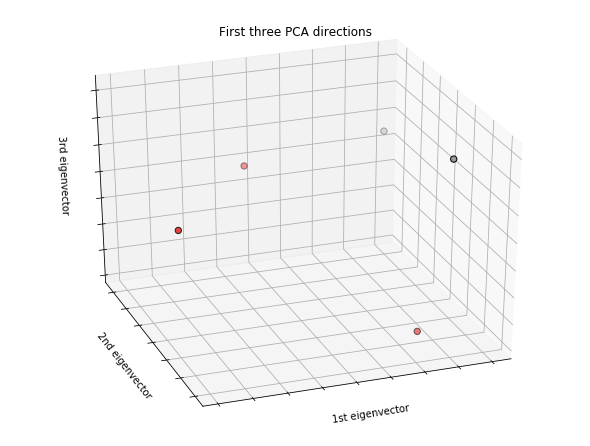

c:\users\iman\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
Epoch 00000000  avg train loss over 1  batches  4.4255 DKL loss 0.9190  avg train acc  0.6000
Epoch 00000000  test loss 288.9478 DKL loss 0.9190  test acc 0.4300
Epoch 00000001  avg train loss over 1  batches  4.4179 DKL loss 0.9171  avg train acc  0.6000
Epoch 00000001  test loss 286.5643 DKL loss 0.9171  test acc 0.4300
Epoch 00000002  avg train loss over 1  batches  4.3187 DKL loss 0.9125  avg train acc  0.6000
Epoch 00000002  test loss 283.8840 DKL loss 0.9125  test acc 0.4300
Epoch 00000003  avg train loss over 1  batches  4.3089 DKL loss 0.9080  avg train acc  0.6000
Epoch 00000003  test loss 280.9754 DKL loss 0.9080  test acc 0.4300
Epoch 00000004  avg train loss over 1  batches  4.2531 DKL loss 0.9016  avg train acc  0.6000
Epoch 00000004  test loss 277.7558 DKL loss 0.9016  test acc 0.4300
Epoch 00000005  avg train loss over 1  batches  4.2085 DKL loss 0.8922  avg train acc  0.6000
Epoch 00000005  test loss 274.3209 DKL loss 0.8922  test acc 0.4300
Epoch 00000006  avg trai

Epoch 00000062  test loss 75.6711 DKL loss 0.0346  test acc 0.5200
Epoch 00000063  avg train loss over 1  batches  3.3962 DKL loss 0.0501  avg train acc  0.8000
Epoch 00000063  test loss 76.0884 DKL loss 0.0501  test acc 0.6000
Epoch 00000064  avg train loss over 1  batches  3.4256 DKL loss 0.0242  avg train acc  0.8000
Epoch 00000064  test loss 73.0604 DKL loss 0.0242  test acc 0.5500
Epoch 00000065  avg train loss over 1  batches  3.3867 DKL loss 0.0315  avg train acc  1.0000
Epoch 00000065  test loss 80.1091 DKL loss 0.0315  test acc 0.5000
Epoch 00000066  avg train loss over 1  batches  3.3586 DKL loss 0.0995  avg train acc  0.8000
Epoch 00000066  test loss 84.5518 DKL loss 0.0995  test acc 0.6200
Epoch 00000067  avg train loss over 1  batches  3.4128 DKL loss 0.0014  avg train acc  0.8000
Epoch 00000067  test loss 69.3771 DKL loss 0.0014  test acc 0.5500
Epoch 00000068  avg train loss over 1  batches  3.4388 DKL loss 0.0005  avg train acc  0.6000
Epoch 00000068  test loss 71.4666 

Epoch 00000134  avg train loss over 1  batches  3.2194 DKL loss 0.1283  avg train acc  1.0000
Epoch 00000134  test loss 76.7244 DKL loss 0.1283  test acc 0.7400
Epoch 00000135  avg train loss over 1  batches  3.3722 DKL loss 0.0042  avg train acc  1.0000
Epoch 00000135  test loss 78.9615 DKL loss 0.0042  test acc 0.7000
Epoch 00000136  avg train loss over 1  batches  3.1100 DKL loss 0.0319  avg train acc  1.0000
Epoch 00000136  test loss 67.9569 DKL loss 0.0319  test acc 0.8600
Epoch 00000137  avg train loss over 1  batches  3.0487 DKL loss 0.2695  avg train acc  1.0000
Epoch 00000137  test loss 88.1981 DKL loss 0.2695  test acc 0.5700
Epoch 00000138  avg train loss over 1  batches  2.8846 DKL loss 0.3730  avg train acc  1.0000
Epoch 00000138  test loss 110.5662 DKL loss 0.3730  test acc 0.4700
Epoch 00000139  avg train loss over 1  batches  3.3906 DKL loss 0.0625  avg train acc  0.4000
Epoch 00000139  test loss 94.9509 DKL loss 0.0625  test acc 0.5200
Epoch 00000140  avg train loss ov

In [3]:
import tensorflow as tf
from sklearn.gaussian_process import GaussianProcessClassifier
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load the sklearn breast cancer dataset
bc = datasets.load_breast_cancer()
X = bc.data[:, :]
Y = bc.target

# min max scale and binarize the target labels
scaler = MinMaxScaler()
X = scaler.fit_transform(X,Y)
label = LabelBinarizer()
Y = label.fit_transform(Y)

# train fraction
frac = 0.01
np.random.seed(666)
# shuffle dataset
idx = np.random.randint(X.shape[0], size=len(X))
X = X[idx]
Y = Y[idx]

train_stop = int(len(X) * frac)
test_stop = 100
X_ = X[:train_stop]
Y_ = Y[:train_stop]

# have the same 10% holdout as the previous example
X_t = X[len(X) - test_stop:]
Y_t = Y[len(X) - test_stop:]


# plot the first 3 PCA dimensions of the sampled data
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y_.ravel(),
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
                                multi_class = 'one_vs_one',
                                random_state=0).fit(X_, Y_)

# lets see how good our fit on the train set is
print(gpc.score(X_, Y_))

# create the TF neural net
# some hyperparams
training_epochs = 200

n_neurons_in_h1 = 10
n_neurons_in_h2 = 10
learning_rate = 0.01
dkl_loss_rate = 0.1

n_features = len(X[0])
labels_dim = 1
#############################################


# these placeholders serve as our input tensors
x = tf.placeholder(tf.float32, [None, n_features], name='input')
y = tf.placeholder(tf.float32, [None, labels_dim], name='labels')
# input tensor for our reference model predictions
y_g = tf.placeholder(tf.float32, [None, labels_dim], name='labels')

# TF Variables are our neural net parameter tensors, we initialize them to random (gaussian) values in
# Layer1. Variables are allowed to be persistent across training epochs and updatable bt TF operations
W1 = tf.Variable(tf.truncated_normal([n_features, n_neurons_in_h1], mean=0, stddev=1 / np.sqrt(n_features)),
                 name='weights1')
b1 = tf.Variable(tf.truncated_normal([n_neurons_in_h1], mean=0, stddev=1 / np.sqrt(n_features)), name='biases1')

# note the output tensor of the 1st layer is the activation applied to a
# linear transform of the layer 1 parameter tensors
# the matmul operation calculates the dot product between the tensors
y1 = tf.sigmoid((tf.matmul(x, W1) + b1), name='activationLayer1')

# network parameters(weights and biases) are set and initialized (Layer2)
W2 = tf.Variable(tf.random_normal([n_neurons_in_h1, n_neurons_in_h2], mean=0, stddev=1),
                 name='weights2')
b2 = tf.Variable(tf.random_normal([n_neurons_in_h2], mean=0, stddev=1), name='biases2')
# activation function(sigmoid)
y2 = tf.sigmoid((tf.matmul(y1, W2) + b2), name='activationLayer2')

# output layer weights and biases
Wo = tf.Variable(tf.random_normal([n_neurons_in_h2, labels_dim], mean=0, stddev=1 ),
                 name='weightsOut')
bo = tf.Variable(tf.random_normal([labels_dim], mean=0, stddev=1), name='biasesOut')

# the sigmoid (binary softmax) activation is absorbed into TF's sigmoid_cross_entropy_with_logits loss
logits = (tf.matmul(y2, Wo) + bo)
loss_1 = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = logits)

# tap a separate output that applies softmax activation to the output layer
# for training accuracy readout
a = tf.nn.sigmoid(logits, name='activationOutputLayer')

# here's the KL-Div loss, note the inputs are softmax distributions, not raw logits
def kl_divergence(p, q):
    return tf.reduce_sum(p * tf.log(p/q))

loss_2 = kl_divergence(a, y_g)

# combined loss, since the DKL loss can be negative, reverse its sign when negative
# basically an abs() but the demonstration is on how to use tf.cond() to check tensor values
loss_2 = tf.cond(loss_2 < 0, lambda: -1 * loss_2, lambda: loss_2)

# can also normalize the losses for stability but not done in this case
norm = 1 #tf.reduce_sum(loss_1 + loss_2)
loss = loss_1 / norm + dkl_loss_rate*loss_2 / norm

# optimizer used to compute gradient of loss and apply the parameter updates.
# the train_step object returned is ran by a TF Session to train the net

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# prediction accuracy
# compare predicted value from network with the expected value/target

correct_prediction = tf.equal(tf.round(a), y)
# accuracy determination
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name="Accuracy")

#############################################
# ***NOTE global_variables_initializer() must be called before creating a tf.Session()!***
init_op = tf.global_variables_initializer()

# create a session for training and feedforward (prediction). Sessions are TF's way to run
# feed data to placeholders and variables, obtain outputs and update neural net parameters
with tf.Session() as sess:
    # ***initialization of all variables... NOTE this must be done before running any further sessions!***
    sess.run(init_op)

    # training loop over the number of epochs
    batch_size = 5
    batches = int(len(X_) / batch_size)

    for epoch in range(training_epochs):
        losses = 0
        dkl_losses = 0
        accs = 0
        for j in range(batches):
            idx = np.random.randint(X_.shape[0], size=batch_size)
            X_b = X_[idx]
            Y_b = Y_[idx]

            # get the GPC predictions... and slice only the positive class probabilities
            Y_g = gpc.predict_proba(X_b)[:,1].reshape((-1,1))

            # train the network, note the dictionary of inputs and labels
            sess.run(train_step, feed_dict={x: X_b, y: Y_b, y_g: Y_g})
            # feedforwad the same data and labels, but grab the accuracy and loss as outputs
            acc, l, soft_max_a, l_2 = sess.run([accuracy, loss, a, loss_2], feed_dict={x: X_b, y: Y_b, y_g: Y_g})

            losses = losses + np.sum(l)
            accs = accs + np.sum(acc)
            dkl_losses = dkl_losses + np.sum(l_2)
        print("Epoch %.8d " % epoch, "avg train loss over", batches, " batches ", "%.4f" % (losses/batches),
              "DKL loss %.4f " % (dkl_losses/batches), "avg train acc ", "%.4f" % (accs/batches))

        # test on the holdout set
        Y_g = gpc.predict_proba(X_t)[:, 1].reshape((-1,1))

        acc, l, soft_max_a = sess.run([accuracy, loss, a], feed_dict={x: X_t, y: Y_t, y_g: Y_g})
        print("Epoch %.8d " % epoch, "test loss %.4f" % np.sum(l),
               "DKL loss %.4f " % dkl_losses, "test acc %.4f" % acc)


print(soft_max_a)

In [38]:
# In[] data generator for MLP version 3 date 2/23
def dg_train(all_train_data_addr, train_label_addr, mini_batch_size, batch_size, train_data_len, window_size):
    global I
    h5f = {}
    for i in range(len(all_train_data_addr)):
        h5f[i] = h5py.File(all_train_data_addr[i],'r')
#         print(h5f[i]['train_data'].shape)
    h5f_label = h5py.File(train_label_addr,'r')
    
    indx = np.arange(0, int(train_data_len/len(all_train_data_addr))-(mini_batch_size+1), mini_batch_size)
    file_Nu = list(range(len(all_train_data_addr)))
    all_data_mini_batch_flag = np.asarray([[n, i] for n in file_Nu for i in indx])
    all_data_mini_batch_flag = shuffle(all_data_mini_batch_flag, random_state=0)
#     print(all_data_mini_batch_flag.shape)
    
    while True:             #this line is just because keras needs infinite generators
        first_mini_batch = 'True'
        for I in all_data_mini_batch_flag:
            if train_data_len-I[1]<=mini_batch_size or I[1]<=mini_batch_size:
                I[1] = copy.deepcopy(mini_batch_size)
            temp = h5f[I[0]]['train_data'][:,I[1]-window_size:I[1]+mini_batch_size+window_size]
            if first_mini_batch == 'True':
                y_int = h5f_label['train_label'][:,I[1]:I[1]+mini_batch_size]
                a = np.reshape(temp[:,:window_size*2+1], (96*(window_size*2+1),1))
                for i in range(1,mini_batch_size):
                    b = np.reshape(temp[:,i:i+window_size*2+1],(96*(window_size*2+1),1))
                    a = np.concatenate((a,b),axis = 1)
                first_mini_batch = 'False'
            else:                
                y_int = np.concatenate((y_int,h5f_label['train_label'][:,I[1]:I[1]+mini_batch_size]), axis = 1)
                for i in range(0,mini_batch_size):
                    a = np.concatenate((a,np.reshape(temp[:,i:i+window_size*2+1],(96*(window_size*2+1),1))),axis = 1)
#             print(a.shape[1])
            if a.shape[1] == batch_size:
                train_data_batch = a.T
                train_data_batch_scale = preprocessing.scale(train_data_batch)
                train_label_batch = y_int.T
                train_label_batch = to_categorical(train_label_batch)
#                 print(train_label_batch.shape)
#                 print(train_data_batch[:,1])
                first_mini_batch = 'True'
                if train_label_batch.shape[1]==2:
                    yield(train_data_batch_scale, train_label_batch)
#                 yield(train_data_scale, train_label_batch)

In [49]:
all_train_data_addr = [train_data_addr, train_data_addr2]
# train_data_len = 1417087*2
train_data_len = 1879087 * len(all_train_data_addr)
mini_batch_size = 64
batch_size = 128
window_size = 10
q,w = next(dg_train(all_train_data_addr, train_label_addr, mini_batch_size, batch_size, train_data_len, window_size))
print(q.shape)
print(w.shape)
plt.matshow(q.T[960-96:960+2*96,]);
plt.colorbar()
plt.show()

In [8]:
# In[] VAD model
all_train_data_addr = [train_data_addr, train_data_addr2]
train_data_len = 1879087 * len(all_train_data_addr)
# train_data_len = 1417087*2
mini_batch_size = 128
batch_size = 256
steps_per_epoch = int((train_data_len/batch_size))
window_size = 10
epochs_Nu = 50
h = [512, 512]


X_dim = 96*(window_size*2+1)
y_dim = 2
model = Sequential()
model.add(Dense(h[0], input_dim=X_dim, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(h[1], kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(y_dim, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


tic = time.clock()
model.fit_generator(generator=dg_train(all_train_data_addr, train_label_addr, mini_batch_size, batch_size, train_data_len, window_size),
                          steps_per_epoch=steps_per_epoch,
                          epochs=epochs_Nu,
                          verbose=1)
# model.fit(x=np.transpose(train_data), y=np.transpose(train_label), batch_size=128, epochs=50, verbose=1, shuffle=True)
toc = time.clock()
print('time = ', str(datetime.timedelta(seconds=toc-tic)))

model.save(vad_model_save_addr + '55_MRCG96_win10_batch512_mini8_e10_1024sigmoid_512sigmoid.h5')

print ('done!')

# 
# model = Sequential()
# model.add(LSTM(n_units, input_shape=(None, vec_size), return_sequences=True))
# model.add(Dropout(0.2))

In [7]:
# In[] data generator for auto encoder version 1 date 3/27
def dg_train_ae(all_noisy_train_data_addr, clean_train_data_addr, batch_size, train_data_len, window_size):
    global I
    h5f = {}
    for i in range(len(all_noisy_train_data_addr)):
        h5f[i] = h5py.File(all_noisy_train_data_addr[i],'r')
#         print(h5f[i]['train_data'].shape)
    h5f_clean_train_data = h5py.File(clean_train_data_addr,'r')
    
    indx = np.arange(0, int(train_data_len/len(all_noisy_train_data_addr))-(mini_batch_size+1), mini_batch_size)
    file_Nu = list(range(len(all_noisy_train_data_addr)))
    all_data_mini_batch_flag = np.asarray([[n, i] for n in file_Nu for i in indx])
    all_data_mini_batch_flag = shuffle(all_data_mini_batch_flag, random_state=0)
#     print(all_data_mini_batch_flag.shape)
    
    while True:             #this line is just because keras needs infinite generators
        first_mini_batch = 'True'
        for I in all_data_mini_batch_flag:
            if train_data_len-I[1]<=mini_batch_size or I[1]<=mini_batch_size:
                I[1] = copy.deepcopy(mini_batch_size)
            temp = h5f[I[0]]['train_data'][:,I[1]-window_size:I[1]+mini_batch_size+window_size]
            temp2 = h5f_clean_train_data['train_data'][:,I[1]-window_size:I[1]+mini_batch_size+window_size]
            if first_mini_batch == 'True':
                a = np.reshape(temp[:,:window_size*2+1], (96*(window_size*2+1),1))
                in_data = (a - np.min(a)) / (np.max(a) - np.min(a)+0.0001)
                b = np.reshape(temp2[:,:window_size*2+1], (96*(window_size*2+1),1))
                out_data = (b - np.min(b)) / (np.max(b) - np.min(b)+0.0001)
                for i in range(1,mini_batch_size):
                    a = np.reshape(temp[:,i:i+window_size*2+1],(96*(window_size*2+1),1))
                    in_data = np.concatenate((in_data,(a - np.min(a)) / (np.max(a) - np.min(a))+0.0001),axis = 1)
                    b = np.reshape(temp2[:,i:i+window_size*2+1],(96*(window_size*2+1),1))
                    out_data = np.concatenate((out_data,(b - np.min(b)) / (max(b) - np.min(b))+0.0001),axis = 1)
                    
                first_mini_batch = 'False'
            else:
                for i in range(0,mini_batch_size):
                    a = np.reshape(temp[:,i:i+window_size*2+1],(96*(window_size*2+1),1))
                    in_data = np.concatenate((in_data,(a - np.min(a)) / (np.max(a) - np.min(a))+0.0001),axis = 1)
                    b = np.reshape(temp[:,i:i+window_size*2+1],(96*(window_size*2+1),1))
                    out_data = np.concatenate((out_data,(b - np.min(b)) / (np.max(b) - np.min(b))+0.0001),axis = 1)
#                     print(np.min(in_data))
#                     print(np.min(out_data))
            if in_data.shape[1] == batch_size and out_data.shape[1] == batch_size:            
#                 preprocessing.normalize(train_data_batch,norm='l2',)
#                 in_data_scale = preprocessing.scale(in_data.T)
#                 out_data_scale = preprocessing.scale(out_data.T)
                in_data_scale =in_data.T
                out_data_scale = out_data.T
#                 print(train_label_batch.shape)
#                 print(train_data_batch[:,1])
                first_mini_batch = 'True'
#                 print(in_data_scale)
#                 print(out_data_scale)
#                 print(np.argwhere(np.isnan(in_data_scale)))
#                 print(np.argwhere(np.isnan(out_data_scale)))
                yield(in_data_scale, out_data_scale)

In [22]:
all_noisy_train_data_addr = [train_data_addr, train_data_addr2]
clean_train_data_addr = train_silence_add_clean_addr
train_data_len = 1879087 * len(all_noisy_train_data_addr)
# train_data_len = 1417087*2
mini_batch_size = 64
batch_size = 128
window_size = 10
q,w = next(dg_train_ae(all_noisy_train_data_addr, clean_train_data_addr, batch_size, train_data_len, window_size))
print(q)
print(w)

In [6]:
# ae
all_noisy_train_data_addr = [train_data_addr]
clean_train_data_addr = train_silence_add_clean_addr
train_data_len = 1879087 * len(all_noisy_train_data_addr)
# train_data_len = 1417087*2
mini_batch_size = 128
batch_size = 128
steps_per_epoch = int((train_data_len/batch_size))
window_size = 10
epochs_Nu = 50
ae_structure = [96*(window_size*2+1), 512, 512, 64, 512, 512, 96*(window_size*2+1)]


input_layer = Input(shape=(ae_structure[0],))
encoder_1 = Dense(ae_structure[1], activation='relu')(input_layer)
encoder_2 = Dense(ae_structure[2], activation='relu')(encoder_1)
code = Dense(ae_structure[3], activation='relu')(encoder_2)
decoder_1 = Dense(ae_structure[4], activation='relu')(code)
decoder_2 = Dense(ae_structure[5], activation='relu')(decoder_1)
output_layer = Dense(ae_structure[6], activation='sigmoid')(decoder_2)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mape')
# autoencoder.fit(train_data.T, train_silence_add_clean.T, epochs=5)
autoencoder.fit_generator(dg_train_ae(all_noisy_train_data_addr, clean_train_data_addr, batch_size, train_data_len, window_size),
                              steps_per_epoch=steps_per_epoch,
                              epochs=epochs_Nu,
                              verbose=1)
autoencoder.save(enhance_model_save_addr + '55_MRCG96_win10_batch512_mini8_e10_1024sigmoid_512sigmoid.h5')

In [8]:
#vae
all_noisy_train_data_addr = [train_data_addr]
clean_train_data_addr = train_silence_add_clean_addr
train_data_len = 1879087 * len(all_noisy_train_data_addr)
# train_data_len = 1417087*2
mini_batch_size = 128
batch_size = 128
steps_per_epoch = int((train_data_len/batch_size))
window_size = 10
epochs_Nu = 50
vae_structure = [96*(window_size*2+1), 512, 512, 64, 512, 512, 96*(window_size*2+1)]

# VAE model = encoder + decoder
# build encoder model
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon



input_layer = Input(shape=(vae_structure[0],))
encoder_1 = Dense(vae_structure[1], activation='relu')(input_layer)
encoder_2 = Dense(vae_structure[2], activation='relu')(encoder_1)
z_mean = Dense(vae_structure[3], name='z_mean')(encoder_2)
z_log_var = Dense(vae_structure[3], name='z_log_var')(encoder_2)
z = Lambda(sampling, output_shape=(vae_structure[3],), name='z')([z_mean, z_log_var])
encoder = Model(input_layer, [z_mean, z_log_var, z], name='encoder')

latent_inputs = Input(shape=(vae_structure[3],), name='z_sampling')
decoder_1 = Dense(vae_structure[4], activation='relu')(latent_inputs)
decoder_2 = Dense(vae_structure[5], activation='relu')(decoder_1)
x_mean = Dense(vae_structure[6], name='x_mean')(decoder_2)
x_log_var = Dense(vae_structure[6], name='x_log_var')(decoder_2)
x = Lambda(sampling, output_shape=(vae_structure[6],), name='x')([x_mean, x_log_var])
# output_layer = Dense(vae_structure[6], activation='sigmoid')(x)
decoder = Model(latent_inputs, [x_mean, x_log_var, x], name='decoder')

outputs = decoder(encoder(input_layer)[2])[2]
vae = Model(input_layer, outputs, name='vae_mlp')


# models = (encoder, decoder)
# [z_mean, z_log_var, z] = decoder.predict(data)
# [x_mean, x_log_var, x] = encoder.predict(z)
def custom_loss(args):
    z_mean = args
    def loss(y_true, y_pred):
#         [z_mean, z_log_var, z] = decoder.predict(data)
#         [x_mean, x_log_var, x] = encoder.predict(z)
# 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)       
        kl_loss = K.sum(z_mean, axis=-1) #- K.sum(0.5*x_log_var + K.square(x-x_mean)/(2*K.exp(x_log_var)), axis=-1)
        return kl_loss
    return loss

# vae.add_loss(vae_loss)
# vae.compile(optimizer='adam')
vae.compile(optimizer='adam', loss=custom_loss(z_mean))
# vae.summary()
vae.fit_generator(dg_train_ae(all_noisy_train_data_addr, clean_train_data_addr, batch_size, train_data_len, window_size),
                              steps_per_epoch=steps_per_epoch,
                              epochs=epochs_Nu,
                              verbose=1)

vae.save(enhance_model_save_addr + '55_MRCG96_win10_batch512_mini8_e10_1024sigmoid_512sigmoid.h5')

ValueError: An operation has `None` for gradient. Please make sure that all of your ops have a gradient defined (i.e. are differentiable). Common ops without gradient: K.argmax, K.round, K.eval.

In [ ]:
# vae.fit_generator(dg_train_ae(all_noisy_train_data_addr, clean_train_data_addr, batch_size, train_data_len, window_size),
#                               steps_per_epoch=steps_per_epoch,
#                               epochs=epochs_Nu,
#                               verbose=1)

# vae.save(enhance_model_save_addr + '55_MRCG96_win10_batch512_mini8_e10_1024sigmoid_512sigmoid.h5')

In [ ]:
# joint learning
# vec_size = 100
# n_units = 10

# x_train = np.random.rand(500, 10, vec_size)
# y_train = np.random.rand(500, vec_size)

# define the checkpoint
filepath = enhance_model_save_addr + '1_MRCG96_win10_batch512_mini8_e10_1024sigmoid_512sigmoid.h5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fit the model

vae.fit_generator(dg_train_ae(all_noisy_train_data_addr, clean_train_data_addr, batch_size, train_data_len, window_size),
                              callbacks=callbacks_list,
                              steps_per_epoch=steps_per_epoch,
                              epochs=epochs_Nu,
                              verbose=1)
model.fit(x_train, y_train, epochs=5, batch_size=50, callbacks=callbacks_list)

# load the model
new_model = load_model("model.h5")
assert_allclose(model.predict(x_train),
                new_model.predict(x_train),
                1e-5)

# fit the model
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
new_model.fit(x_train, y_train, epochs=5, batch_size=50, callbacks=callbacks_list)

In [ ]:
def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as function of 2-dim latent vector

    # Arguments
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()



In [319]:
# In[] data generator for prediction version 1 date 3/6
def dg_test(all_test_data_addr, batch_size, test_data_len, window_size):
    global I
    h5f = {}
    for i in range(len(all_test_data_addr)):
        h5f[i] = h5py.File(all_test_data_addr[i],'r')
#         print(h5f[i]['train_data'].shape)
#     h5f_label = h5py.File(test_label_addr,'r')
    
    indx = np.arange(0, int(test_data_len/len(all_test_data_addr)), batch_size)
    file_Nu = list(range(len(all_test_data_addr)))
    all_data_batch_flag = np.asarray([[n, i] for n in file_Nu for i in indx])
#     all_data_batch_flag = shuffle(all_data_batch_flag, random_state=0)
    print(all_data_batch_flag.shape)
    
    while True:             #this line is just because keras needs infinite generators
        for I in all_data_batch_flag:
            if test_data_len-I[1]<=batch_size+window_size or I[1]<=window_size:
                I[1] = copy.deepcopy(batch_size)
            else:
                print(I)
                # some file save data with the name 'train_data' and some of them save data with the name 'test_data'
                # some name are wrong
                temp = h5f[I[0]]['train_data'][:,I[1]-window_size:I[1]+batch_size+window_size]

    #             y_int = h5f_label['train_label'][:,I[1]:I[1]+batch_size]

                a = np.reshape(temp[:,:window_size*2+1], (96*(window_size*2+1),1))
                for i in range(1,batch_size):
                    b = np.reshape(temp[:,i:i+window_size*2+1],(96*(window_size*2+1),1))
                    a = np.concatenate((a,b),axis = 1)

                if a.shape[1] == batch_size:
                    test_data_batch = a.T
                    test_data_batch_scale = preprocessing.scale(test_data_batch)
    #                 test_label_batch = y_int.T
    #                 test_label_batch = to_categorical(test_label_batch)
    #                 print(train_label_batch.shape)
    #                 print(train_data_batch[:,1])
    #                 if test_label_batch.shape[1]==2:
                    yield(test_data_batch_scale)
    #                 yield(train_data_scale, train_label_batch)

In [128]:
all_test_data_addr = [test_data_addr]
test_data_len = 685845 * len(all_test_data_addr)
# test_data_len = ???
batch_size = 256
steps_per_epoch = int((train_data_len/batch_size))
window_size = 10
q = next(dg_test(all_test_data_addr, batch_size, test_data_len, window_size))
print(q.shape)


(2680, 2)
[  0 256]
(256, 2016)


In [117]:
test_data_len = 685845 * len(all_test_data_addr)
# test_data_len = ???
batch_size = 256
steps = int((test_data_len/batch_size))
print(steps)

2679


In [320]:
all_test_data_addr = [train_data_addr] # NEED TO REWRITE
# test_data_len = 685845 * len(all_test_data_addr)
test_data_len = 1879087 * len(all_test_data_addr)
# test_data_len = ???
batch_size = 256
steps = int((test_data_len/batch_size)-1)
window_size = 10

model = load_model(model_save_addr + '4_MRCG96_win10_batch256_mini128_e200_512sigmoid_512sigmoid.h5')

tic = time.clock()
ynew = model.predict_generator(dg_test(all_test_data_addr, batch_size, test_data_len, window_size),steps)
print(ynew.shape)

toc = time.clock()
print('time = ', str(datetime.timedelta(seconds=toc-tic)))

with h5py.File(predict_label_addr +'4_batch'+str(batch_size)+'_'+all_test_data_addr[0].split('\\')[-1].split('.')[0]+'.h5', 'w') as h5f:
    h5f.create_dataset('label', data=ynew)
    h5f.close()

print ('done!')

(7341, 2)
[  0 256]
[  0 512]
[  0 768]
[   0 1024]
[   0 1280]
[   0 1536]
[   0 1792]
[   0 2048]
[   0 2304]
[   0 2560]
[   0 2816]
[   0 3072]
[   0 3328]
[   0 3584]
[   0 3840]
[   0 4096]
[   0 4352]
[   0 4608]
[   0 4864]
[   0 5120]
[   0 5376]
[   0 5632]
[   0 5888]
[   0 6144]
[   0 6400]
[   0 6656]
[   0 6912]
[   0 7168]
[   0 7424]
[   0 7680]
[   0 7936]
[   0 8192]
[   0 8448]
[   0 8704]
[   0 8960]
[   0 9216]
[   0 9472]
[   0 9728]
[   0 9984]
[    0 10240]
[    0 10496]
[    0 10752]
[    0 11008]
[    0 11264]
[    0 11520]
[    0 11776]
[    0 12032]
[    0 12288]
[    0 12544]
[    0 12800]
[    0 13056]
[    0 13312]
[    0 13568]
[    0 13824]
[    0 14080]
[    0 14336]
[    0 14592]
[    0 14848]
[    0 15104]
[    0 15360]
[    0 15616]
[    0 15872]
[    0 16128]
[    0 16384]
[    0 16640]
[    0 16896]
[    0 17152]
[    0 17408]
[    0 17664]
[    0 17920]
[    0 18176]
[    0 18432]
[    0 18688]
[    0 18944]
[    0 19200]
[    0 19456]
[    0 197

[     0 145152]
[     0 145408]
[     0 145664]
[     0 145920]
[     0 146176]
[     0 146432]
[     0 146688]
[     0 146944]
[     0 147200]
[     0 147456]
[     0 147712]
[     0 147968]
[     0 148224]
[     0 148480]
[     0 148736]
[     0 148992]
[     0 149248]
[     0 149504]
[     0 149760]
[     0 150016]
[     0 150272]
[     0 150528]
[     0 150784]
[     0 151040]
[     0 151296]
[     0 151552]
[     0 151808]
[     0 152064]
[     0 152320]
[     0 152576]
[     0 152832]
[     0 153088]
[     0 153344]
[     0 153600]
[     0 153856]
[     0 154112]
[     0 154368]
[     0 154624]
[     0 154880]
[     0 155136]
[     0 155392]
[     0 155648]
[     0 155904]
[     0 156160]
[     0 156416]
[     0 156672]
[     0 156928]
[     0 157184]
[     0 157440]
[     0 157696]
[     0 157952]
[     0 158208]
[     0 158464]
[     0 158720]
[     0 158976]
[     0 159232]
[     0 159488]
[     0 159744]
[     0 160000]
[     0 160256]
[     0 160512]
[     0 160768]
[     0 

[     0 276480]
[     0 276736]
[     0 276992]
[     0 277248]
[     0 277504]
[     0 277760]
[     0 278016]
[     0 278272]
[     0 278528]
[     0 278784]
[     0 279040]
[     0 279296]
[     0 279552]
[     0 279808]
[     0 280064]
[     0 280320]
[     0 280576]
[     0 280832]
[     0 281088]
[     0 281344]
[     0 281600]
[     0 281856]
[     0 282112]
[     0 282368]
[     0 282624]
[     0 282880]
[     0 283136]
[     0 283392]
[     0 283648]
[     0 283904]
[     0 284160]
[     0 284416]
[     0 284672]
[     0 284928]
[     0 285184]
[     0 285440]
[     0 285696]
[     0 285952]
[     0 286208]
[     0 286464]
[     0 286720]
[     0 286976]
[     0 287232]
[     0 287488]
[     0 287744]
[     0 288000]
[     0 288256]
[     0 288512]
[     0 288768]
[     0 289024]
[     0 289280]
[     0 289536]
[     0 289792]
[     0 290048]
[     0 290304]
[     0 290560]
[     0 290816]
[     0 291072]
[     0 291328]
[     0 291584]
[     0 291840]
[     0 292096]
[     0 

[     0 407808]
[     0 408064]
[     0 408320]
[     0 408576]
[     0 408832]
[     0 409088]
[     0 409344]
[     0 409600]
[     0 409856]
[     0 410112]
[     0 410368]
[     0 410624]
[     0 410880]
[     0 411136]
[     0 411392]
[     0 411648]
[     0 411904]
[     0 412160]
[     0 412416]
[     0 412672]
[     0 412928]
[     0 413184]
[     0 413440]
[     0 413696]
[     0 413952]
[     0 414208]
[     0 414464]
[     0 414720]
[     0 414976]
[     0 415232]
[     0 415488]
[     0 415744]
[     0 416000]
[     0 416256]
[     0 416512]
[     0 416768]
[     0 417024]
[     0 417280]
[     0 417536]
[     0 417792]
[     0 418048]
[     0 418304]
[     0 418560]
[     0 418816]
[     0 419072]
[     0 419328]
[     0 419584]
[     0 419840]
[     0 420096]
[     0 420352]
[     0 420608]
[     0 420864]
[     0 421120]
[     0 421376]
[     0 421632]
[     0 421888]
[     0 422144]
[     0 422400]
[     0 422656]
[     0 422912]
[     0 423168]
[     0 423424]
[     0 

[     0 539136]
[     0 539392]
[     0 539648]
[     0 539904]
[     0 540160]
[     0 540416]
[     0 540672]
[     0 540928]
[     0 541184]
[     0 541440]
[     0 541696]
[     0 541952]
[     0 542208]
[     0 542464]
[     0 542720]
[     0 542976]
[     0 543232]
[     0 543488]
[     0 543744]
[     0 544000]
[     0 544256]
[     0 544512]
[     0 544768]
[     0 545024]
[     0 545280]
[     0 545536]
[     0 545792]
[     0 546048]
[     0 546304]
[     0 546560]
[     0 546816]
[     0 547072]
[     0 547328]
[     0 547584]
[     0 547840]
[     0 548096]
[     0 548352]
[     0 548608]
[     0 548864]
[     0 549120]
[     0 549376]
[     0 549632]
[     0 549888]
[     0 550144]
[     0 550400]
[     0 550656]
[     0 550912]
[     0 551168]
[     0 551424]
[     0 551680]
[     0 551936]
[     0 552192]
[     0 552448]
[     0 552704]
[     0 552960]
[     0 553216]
[     0 553472]
[     0 553728]
[     0 553984]
[     0 554240]
[     0 554496]
[     0 554752]
[     0 

[     0 670464]
[     0 670720]
[     0 670976]
[     0 671232]
[     0 671488]
[     0 671744]
[     0 672000]
[     0 672256]
[     0 672512]
[     0 672768]
[     0 673024]
[     0 673280]
[     0 673536]
[     0 673792]
[     0 674048]
[     0 674304]
[     0 674560]
[     0 674816]
[     0 675072]
[     0 675328]
[     0 675584]
[     0 675840]
[     0 676096]
[     0 676352]
[     0 676608]
[     0 676864]
[     0 677120]
[     0 677376]
[     0 677632]
[     0 677888]
[     0 678144]
[     0 678400]
[     0 678656]
[     0 678912]
[     0 679168]
[     0 679424]
[     0 679680]
[     0 679936]
[     0 680192]
[     0 680448]
[     0 680704]
[     0 680960]
[     0 681216]
[     0 681472]
[     0 681728]
[     0 681984]
[     0 682240]
[     0 682496]
[     0 682752]
[     0 683008]
[     0 683264]
[     0 683520]
[     0 683776]
[     0 684032]
[     0 684288]
[     0 684544]
[     0 684800]
[     0 685056]
[     0 685312]
[     0 685568]
[     0 685824]
[     0 686080]
[     0 

[     0 801792]
[     0 802048]
[     0 802304]
[     0 802560]
[     0 802816]
[     0 803072]
[     0 803328]
[     0 803584]
[     0 803840]
[     0 804096]
[     0 804352]
[     0 804608]
[     0 804864]
[     0 805120]
[     0 805376]
[     0 805632]
[     0 805888]
[     0 806144]
[     0 806400]
[     0 806656]
[     0 806912]
[     0 807168]
[     0 807424]
[     0 807680]
[     0 807936]
[     0 808192]
[     0 808448]
[     0 808704]
[     0 808960]
[     0 809216]
[     0 809472]
[     0 809728]
[     0 809984]
[     0 810240]
[     0 810496]
[     0 810752]
[     0 811008]
[     0 811264]
[     0 811520]
[     0 811776]
[     0 812032]
[     0 812288]
[     0 812544]
[     0 812800]
[     0 813056]
[     0 813312]
[     0 813568]
[     0 813824]
[     0 814080]
[     0 814336]
[     0 814592]
[     0 814848]
[     0 815104]
[     0 815360]
[     0 815616]
[     0 815872]
[     0 816128]
[     0 816384]
[     0 816640]
[     0 816896]
[     0 817152]
[     0 817408]
[     0 

[     0 933120]
[     0 933376]
[     0 933632]
[     0 933888]
[     0 934144]
[     0 934400]
[     0 934656]
[     0 934912]
[     0 935168]
[     0 935424]
[     0 935680]
[     0 935936]
[     0 936192]
[     0 936448]
[     0 936704]
[     0 936960]
[     0 937216]
[     0 937472]
[     0 937728]
[     0 937984]
[     0 938240]
[     0 938496]
[     0 938752]
[     0 939008]
[     0 939264]
[     0 939520]
[     0 939776]
[     0 940032]
[     0 940288]
[     0 940544]
[     0 940800]
[     0 941056]
[     0 941312]
[     0 941568]
[     0 941824]
[     0 942080]
[     0 942336]
[     0 942592]
[     0 942848]
[     0 943104]
[     0 943360]
[     0 943616]
[     0 943872]
[     0 944128]
[     0 944384]
[     0 944640]
[     0 944896]
[     0 945152]
[     0 945408]
[     0 945664]
[     0 945920]
[     0 946176]
[     0 946432]
[     0 946688]
[     0 946944]
[     0 947200]
[     0 947456]
[     0 947712]
[     0 947968]
[     0 948224]
[     0 948480]
[     0 948736]
[     0 

[      0 1057280]
[      0 1057536]
[      0 1057792]
[      0 1058048]
[      0 1058304]
[      0 1058560]
[      0 1058816]
[      0 1059072]
[      0 1059328]
[      0 1059584]
[      0 1059840]
[      0 1060096]
[      0 1060352]
[      0 1060608]
[      0 1060864]
[      0 1061120]
[      0 1061376]
[      0 1061632]
[      0 1061888]
[      0 1062144]
[      0 1062400]
[      0 1062656]
[      0 1062912]
[      0 1063168]
[      0 1063424]
[      0 1063680]
[      0 1063936]
[      0 1064192]
[      0 1064448]
[      0 1064704]
[      0 1064960]
[      0 1065216]
[      0 1065472]
[      0 1065728]
[      0 1065984]
[      0 1066240]
[      0 1066496]
[      0 1066752]
[      0 1067008]
[      0 1067264]
[      0 1067520]
[      0 1067776]
[      0 1068032]
[      0 1068288]
[      0 1068544]
[      0 1068800]
[      0 1069056]
[      0 1069312]
[      0 1069568]
[      0 1069824]
[      0 1070080]
[      0 1070336]
[      0 1070592]
[      0 1070848]
[      0 1071104]
[      0 1

[      0 1174016]
[      0 1174272]
[      0 1174528]
[      0 1174784]
[      0 1175040]
[      0 1175296]
[      0 1175552]
[      0 1175808]
[      0 1176064]
[      0 1176320]
[      0 1176576]
[      0 1176832]
[      0 1177088]
[      0 1177344]
[      0 1177600]
[      0 1177856]
[      0 1178112]
[      0 1178368]
[      0 1178624]
[      0 1178880]
[      0 1179136]
[      0 1179392]
[      0 1179648]
[      0 1179904]
[      0 1180160]
[      0 1180416]
[      0 1180672]
[      0 1180928]
[      0 1181184]
[      0 1181440]
[      0 1181696]
[      0 1181952]
[      0 1182208]
[      0 1182464]
[      0 1182720]
[      0 1182976]
[      0 1183232]
[      0 1183488]
[      0 1183744]
[      0 1184000]
[      0 1184256]
[      0 1184512]
[      0 1184768]
[      0 1185024]
[      0 1185280]
[      0 1185536]
[      0 1185792]
[      0 1186048]
[      0 1186304]
[      0 1186560]
[      0 1186816]
[      0 1187072]
[      0 1187328]
[      0 1187584]
[      0 1187840]
[      0 1

[      0 1290752]
[      0 1291008]
[      0 1291264]
[      0 1291520]
[      0 1291776]
[      0 1292032]
[      0 1292288]
[      0 1292544]
[      0 1292800]
[      0 1293056]
[      0 1293312]
[      0 1293568]
[      0 1293824]
[      0 1294080]
[      0 1294336]
[      0 1294592]
[      0 1294848]
[      0 1295104]
[      0 1295360]
[      0 1295616]
[      0 1295872]
[      0 1296128]
[      0 1296384]
[      0 1296640]
[      0 1296896]
[      0 1297152]
[      0 1297408]
[      0 1297664]
[      0 1297920]
[      0 1298176]
[      0 1298432]
[      0 1298688]
[      0 1298944]
[      0 1299200]
[      0 1299456]
[      0 1299712]
[      0 1299968]
[      0 1300224]
[      0 1300480]
[      0 1300736]
[      0 1300992]
[      0 1301248]
[      0 1301504]
[      0 1301760]
[      0 1302016]
[      0 1302272]
[      0 1302528]
[      0 1302784]
[      0 1303040]
[      0 1303296]
[      0 1303552]
[      0 1303808]
[      0 1304064]
[      0 1304320]
[      0 1304576]
[      0 1

[      0 1407488]
[      0 1407744]
[      0 1408000]
[      0 1408256]
[      0 1408512]
[      0 1408768]
[      0 1409024]
[      0 1409280]
[      0 1409536]
[      0 1409792]
[      0 1410048]
[      0 1410304]
[      0 1410560]
[      0 1410816]
[      0 1411072]
[      0 1411328]
[      0 1411584]
[      0 1411840]
[      0 1412096]
[      0 1412352]
[      0 1412608]
[      0 1412864]
[      0 1413120]
[      0 1413376]
[      0 1413632]
[      0 1413888]
[      0 1414144]
[      0 1414400]
[      0 1414656]
[      0 1414912]
[      0 1415168]
[      0 1415424]
[      0 1415680]
[      0 1415936]
[      0 1416192]
[      0 1416448]
[      0 1416704]
[      0 1416960]
[      0 1417216]
[      0 1417472]
[      0 1417728]
[      0 1417984]
[      0 1418240]
[      0 1418496]
[      0 1418752]
[      0 1419008]
[      0 1419264]
[      0 1419520]
[      0 1419776]
[      0 1420032]
[      0 1420288]
[      0 1420544]
[      0 1420800]
[      0 1421056]
[      0 1421312]
[      0 1

[      0 1524224]
[      0 1524480]
[      0 1524736]
[      0 1524992]
[      0 1525248]
[      0 1525504]
[      0 1525760]
[      0 1526016]
[      0 1526272]
[      0 1526528]
[      0 1526784]
[      0 1527040]
[      0 1527296]
[      0 1527552]
[      0 1527808]
[      0 1528064]
[      0 1528320]
[      0 1528576]
[      0 1528832]
[      0 1529088]
[      0 1529344]
[      0 1529600]
[      0 1529856]
[      0 1530112]
[      0 1530368]
[      0 1530624]
[      0 1530880]
[      0 1531136]
[      0 1531392]
[      0 1531648]
[      0 1531904]
[      0 1532160]
[      0 1532416]
[      0 1532672]
[      0 1532928]
[      0 1533184]
[      0 1533440]
[      0 1533696]
[      0 1533952]
[      0 1534208]
[      0 1534464]
[      0 1534720]
[      0 1534976]
[      0 1535232]
[      0 1535488]
[      0 1535744]
[      0 1536000]
[      0 1536256]
[      0 1536512]
[      0 1536768]
[      0 1537024]
[      0 1537280]
[      0 1537536]
[      0 1537792]
[      0 1538048]
[      0 1

[      0 1640960]
[      0 1641216]
[      0 1641472]
[      0 1641728]
[      0 1641984]
[      0 1642240]
[      0 1642496]
[      0 1642752]
[      0 1643008]
[      0 1643264]
[      0 1643520]
[      0 1643776]
[      0 1644032]
[      0 1644288]
[      0 1644544]
[      0 1644800]
[      0 1645056]
[      0 1645312]
[      0 1645568]
[      0 1645824]
[      0 1646080]
[      0 1646336]
[      0 1646592]
[      0 1646848]
[      0 1647104]
[      0 1647360]
[      0 1647616]
[      0 1647872]
[      0 1648128]
[      0 1648384]
[      0 1648640]
[      0 1648896]
[      0 1649152]
[      0 1649408]
[      0 1649664]
[      0 1649920]
[      0 1650176]
[      0 1650432]
[      0 1650688]
[      0 1650944]
[      0 1651200]
[      0 1651456]
[      0 1651712]
[      0 1651968]
[      0 1652224]
[      0 1652480]
[      0 1652736]
[      0 1652992]
[      0 1653248]
[      0 1653504]
[      0 1653760]
[      0 1654016]
[      0 1654272]
[      0 1654528]
[      0 1654784]
[      0 1

[      0 1757696]
[      0 1757952]
[      0 1758208]
[      0 1758464]
[      0 1758720]
[      0 1758976]
[      0 1759232]
[      0 1759488]
[      0 1759744]
[      0 1760000]
[      0 1760256]
[      0 1760512]
[      0 1760768]
[      0 1761024]
[      0 1761280]
[      0 1761536]
[      0 1761792]
[      0 1762048]
[      0 1762304]
[      0 1762560]
[      0 1762816]
[      0 1763072]
[      0 1763328]
[      0 1763584]
[      0 1763840]
[      0 1764096]
[      0 1764352]
[      0 1764608]
[      0 1764864]
[      0 1765120]
[      0 1765376]
[      0 1765632]
[      0 1765888]
[      0 1766144]
[      0 1766400]
[      0 1766656]
[      0 1766912]
[      0 1767168]
[      0 1767424]
[      0 1767680]
[      0 1767936]
[      0 1768192]
[      0 1768448]
[      0 1768704]
[      0 1768960]
[      0 1769216]
[      0 1769472]
[      0 1769728]
[      0 1769984]
[      0 1770240]
[      0 1770496]
[      0 1770752]
[      0 1771008]
[      0 1771264]
[      0 1771520]
[      0 1

[      0 1874432]
[      0 1874688]
[      0 1874944]
[      0 1875200]
[      0 1875456]
[      0 1875712]
[      0 1875968]
[      0 1876224]
[      0 1876480]
[      0 1876736]
[      0 1876992]
[      0 1877248]
[      0 1877504]
[      0 1877760]
[      0 1878016]
[      0 1878272]
[      0 1878528]
[      0 1878784]
[  0 256]
(1878784, 2)
time =  1:31:39.089432
done!
(7341, 2)
[  0 256]
[  0 512]
[  0 768]
[   0 1024]
[   0 1280]
[   0 1536]
[   0 1792]
[   0 2048]
[   0 2304]
[   0 2560]
[   0 2816]
[   0 3072]
[   0 3328]
[   0 3584]
[   0 3840]
[   0 4096]
[   0 4352]
[   0 4608]
[   0 4864]
[   0 5120]
[   0 5376]
[   0 5632]
[   0 5888]
[   0 6144]
[   0 6400]
[   0 6656]
[   0 6912]
[   0 7168]
[   0 7424]
[   0 7680]
[   0 7936]
[   0 8192]
[   0 8448]
[   0 8704]
[   0 8960]
[   0 9216]
[   0 9472]
[   0 9728]
[   0 9984]
[    0 10240]
[    0 10496]
[    0 10752]
[    0 11008]
[    0 11264]
[    0 11520]
[    0 11776]
[    0 12032]
[    0 12288]
[    0 12544]
[    0 12800

[     0 139008]
[     0 139264]
[     0 139520]
[     0 139776]
[     0 140032]
[     0 140288]
[     0 140544]
[     0 140800]
[     0 141056]
[     0 141312]
[     0 141568]
[     0 141824]
[     0 142080]
[     0 142336]
[     0 142592]
[     0 142848]
[     0 143104]
[     0 143360]
[     0 143616]
[     0 143872]
[     0 144128]
[     0 144384]
[     0 144640]
[     0 144896]
[     0 145152]
[     0 145408]
[     0 145664]
[     0 145920]
[     0 146176]
[     0 146432]
[     0 146688]
[     0 146944]
[     0 147200]
[     0 147456]
[     0 147712]
[     0 147968]
[     0 148224]
[     0 148480]
[     0 148736]
[     0 148992]
[     0 149248]
[     0 149504]
[     0 149760]
[     0 150016]
[     0 150272]
[     0 150528]
[     0 150784]
[     0 151040]
[     0 151296]
[     0 151552]
[     0 151808]
[     0 152064]
[     0 152320]
[     0 152576]
[     0 152832]
[     0 153088]
[     0 153344]
[     0 153600]
[     0 153856]
[     0 154112]
[     0 154368]
[     0 154624]
[     0 

[     0 270336]
[     0 270592]
[     0 270848]
[     0 271104]
[     0 271360]
[     0 271616]
[     0 271872]
[     0 272128]
[     0 272384]
[     0 272640]
[     0 272896]
[     0 273152]
[     0 273408]
[     0 273664]
[     0 273920]
[     0 274176]
[     0 274432]
[     0 274688]
[     0 274944]
[     0 275200]
[     0 275456]
[     0 275712]
[     0 275968]
[     0 276224]
[     0 276480]
[     0 276736]
[     0 276992]
[     0 277248]
[     0 277504]
[     0 277760]
[     0 278016]
[     0 278272]
[     0 278528]
[     0 278784]
[     0 279040]
[     0 279296]
[     0 279552]
[     0 279808]
[     0 280064]
[     0 280320]
[     0 280576]
[     0 280832]
[     0 281088]
[     0 281344]
[     0 281600]
[     0 281856]
[     0 282112]
[     0 282368]
[     0 282624]
[     0 282880]
[     0 283136]
[     0 283392]
[     0 283648]
[     0 283904]
[     0 284160]
[     0 284416]
[     0 284672]
[     0 284928]
[     0 285184]
[     0 285440]
[     0 285696]
[     0 285952]
[     0 

[     0 401664]
[     0 401920]
[     0 402176]
[     0 402432]
[     0 402688]
[     0 402944]
[     0 403200]
[     0 403456]
[     0 403712]
[     0 403968]
[     0 404224]
[     0 404480]
[     0 404736]
[     0 404992]
[     0 405248]
[     0 405504]
[     0 405760]
[     0 406016]
[     0 406272]
[     0 406528]
[     0 406784]
[     0 407040]
[     0 407296]
[     0 407552]
[     0 407808]
[     0 408064]
[     0 408320]
[     0 408576]
[     0 408832]
[     0 409088]
[     0 409344]
[     0 409600]
[     0 409856]
[     0 410112]
[     0 410368]
[     0 410624]
[     0 410880]
[     0 411136]
[     0 411392]
[     0 411648]
[     0 411904]
[     0 412160]
[     0 412416]
[     0 412672]
[     0 412928]
[     0 413184]
[     0 413440]
[     0 413696]
[     0 413952]
[     0 414208]
[     0 414464]
[     0 414720]
[     0 414976]
[     0 415232]
[     0 415488]
[     0 415744]
[     0 416000]
[     0 416256]
[     0 416512]
[     0 416768]
[     0 417024]
[     0 417280]
[     0 

[     0 532992]
[     0 533248]
[     0 533504]
[     0 533760]
[     0 534016]
[     0 534272]
[     0 534528]
[     0 534784]
[     0 535040]
[     0 535296]
[     0 535552]
[     0 535808]
[     0 536064]
[     0 536320]
[     0 536576]
[     0 536832]
[     0 537088]
[     0 537344]
[     0 537600]
[     0 537856]
[     0 538112]
[     0 538368]
[     0 538624]
[     0 538880]
[     0 539136]
[     0 539392]
[     0 539648]
[     0 539904]
[     0 540160]
[     0 540416]
[     0 540672]
[     0 540928]
[     0 541184]
[     0 541440]
[     0 541696]
[     0 541952]
[     0 542208]
[     0 542464]
[     0 542720]
[     0 542976]
[     0 543232]
[     0 543488]
[     0 543744]
[     0 544000]
[     0 544256]
[     0 544512]
[     0 544768]
[     0 545024]
[     0 545280]
[     0 545536]
[     0 545792]
[     0 546048]
[     0 546304]
[     0 546560]
[     0 546816]
[     0 547072]
[     0 547328]
[     0 547584]
[     0 547840]
[     0 548096]
[     0 548352]
[     0 548608]
[     0 

[     0 664320]
[     0 664576]
[     0 664832]
[     0 665088]
[     0 665344]
[     0 665600]
[     0 665856]
[     0 666112]
[     0 666368]
[     0 666624]
[     0 666880]
[     0 667136]
[     0 667392]
[     0 667648]
[     0 667904]
[     0 668160]
[     0 668416]
[     0 668672]
[     0 668928]
[     0 669184]
[     0 669440]
[     0 669696]
[     0 669952]
[     0 670208]
[     0 670464]
[     0 670720]
[     0 670976]
[     0 671232]
[     0 671488]
[     0 671744]
[     0 672000]
[     0 672256]
[     0 672512]
[     0 672768]
[     0 673024]
[     0 673280]
[     0 673536]
[     0 673792]
[     0 674048]
[     0 674304]
[     0 674560]
[     0 674816]
[     0 675072]
[     0 675328]
[     0 675584]
[     0 675840]
[     0 676096]
[     0 676352]
[     0 676608]
[     0 676864]
[     0 677120]
[     0 677376]
[     0 677632]
[     0 677888]
[     0 678144]
[     0 678400]
[     0 678656]
[     0 678912]
[     0 679168]
[     0 679424]
[     0 679680]
[     0 679936]
[     0 

[     0 795648]
[     0 795904]
[     0 796160]
[     0 796416]
[     0 796672]
[     0 796928]
[     0 797184]
[     0 797440]
[     0 797696]
[     0 797952]
[     0 798208]
[     0 798464]
[     0 798720]
[     0 798976]
[     0 799232]
[     0 799488]
[     0 799744]
[     0 800000]
[     0 800256]
[     0 800512]
[     0 800768]
[     0 801024]
[     0 801280]
[     0 801536]
[     0 801792]
[     0 802048]
[     0 802304]
[     0 802560]
[     0 802816]
[     0 803072]
[     0 803328]
[     0 803584]
[     0 803840]
[     0 804096]
[     0 804352]
[     0 804608]
[     0 804864]
[     0 805120]
[     0 805376]
[     0 805632]
[     0 805888]
[     0 806144]
[     0 806400]
[     0 806656]
[     0 806912]
[     0 807168]
[     0 807424]
[     0 807680]
[     0 807936]
[     0 808192]
[     0 808448]
[     0 808704]
[     0 808960]
[     0 809216]
[     0 809472]
[     0 809728]
[     0 809984]
[     0 810240]
[     0 810496]
[     0 810752]
[     0 811008]
[     0 811264]
[     0 

[     0 926976]
[     0 927232]
[     0 927488]
[     0 927744]
[     0 928000]
[     0 928256]
[     0 928512]
[     0 928768]
[     0 929024]
[     0 929280]
[     0 929536]
[     0 929792]
[     0 930048]
[     0 930304]
[     0 930560]
[     0 930816]
[     0 931072]
[     0 931328]
[     0 931584]
[     0 931840]
[     0 932096]
[     0 932352]
[     0 932608]
[     0 932864]
[     0 933120]
[     0 933376]
[     0 933632]
[     0 933888]
[     0 934144]
[     0 934400]
[     0 934656]
[     0 934912]
[     0 935168]
[     0 935424]
[     0 935680]
[     0 935936]
[     0 936192]
[     0 936448]
[     0 936704]
[     0 936960]
[     0 937216]
[     0 937472]
[     0 937728]
[     0 937984]
[     0 938240]
[     0 938496]
[     0 938752]
[     0 939008]
[     0 939264]
[     0 939520]
[     0 939776]
[     0 940032]
[     0 940288]
[     0 940544]
[     0 940800]
[     0 941056]
[     0 941312]
[     0 941568]
[     0 941824]
[     0 942080]
[     0 942336]
[     0 942592]
[     0 

[      0 1051648]
[      0 1051904]
[      0 1052160]
[      0 1052416]
[      0 1052672]
[      0 1052928]
[      0 1053184]
[      0 1053440]
[      0 1053696]
[      0 1053952]
[      0 1054208]
[      0 1054464]
[      0 1054720]
[      0 1054976]
[      0 1055232]
[      0 1055488]
[      0 1055744]
[      0 1056000]
[      0 1056256]
[      0 1056512]
[      0 1056768]
[      0 1057024]
[      0 1057280]
[      0 1057536]
[      0 1057792]
[      0 1058048]
[      0 1058304]
[      0 1058560]
[      0 1058816]
[      0 1059072]
[      0 1059328]
[      0 1059584]
[      0 1059840]
[      0 1060096]
[      0 1060352]
[      0 1060608]
[      0 1060864]
[      0 1061120]
[      0 1061376]
[      0 1061632]
[      0 1061888]
[      0 1062144]
[      0 1062400]
[      0 1062656]
[      0 1062912]
[      0 1063168]
[      0 1063424]
[      0 1063680]
[      0 1063936]
[      0 1064192]
[      0 1064448]
[      0 1064704]
[      0 1064960]
[      0 1065216]
[      0 1065472]
[      0 1

[      0 1168384]
[      0 1168640]
[      0 1168896]
[      0 1169152]
[      0 1169408]
[      0 1169664]
[      0 1169920]
[      0 1170176]
[      0 1170432]
[      0 1170688]
[      0 1170944]
[      0 1171200]
[      0 1171456]
[      0 1171712]
[      0 1171968]
[      0 1172224]
[      0 1172480]
[      0 1172736]
[      0 1172992]
[      0 1173248]
[      0 1173504]
[      0 1173760]
[      0 1174016]
[      0 1174272]
[      0 1174528]
[      0 1174784]
[      0 1175040]
[      0 1175296]
[      0 1175552]
[      0 1175808]
[      0 1176064]
[      0 1176320]
[      0 1176576]
[      0 1176832]
[      0 1177088]
[      0 1177344]
[      0 1177600]
[      0 1177856]
[      0 1178112]
[      0 1178368]
[      0 1178624]
[      0 1178880]
[      0 1179136]
[      0 1179392]
[      0 1179648]
[      0 1179904]
[      0 1180160]
[      0 1180416]
[      0 1180672]
[      0 1180928]
[      0 1181184]
[      0 1181440]
[      0 1181696]
[      0 1181952]
[      0 1182208]
[      0 1

[      0 1285120]
[      0 1285376]
[      0 1285632]
[      0 1285888]
[      0 1286144]
[      0 1286400]
[      0 1286656]
[      0 1286912]
[      0 1287168]
[      0 1287424]
[      0 1287680]
[      0 1287936]
[      0 1288192]
[      0 1288448]
[      0 1288704]
[      0 1288960]
[      0 1289216]
[      0 1289472]
[      0 1289728]
[      0 1289984]
[      0 1290240]
[      0 1290496]
[      0 1290752]
[      0 1291008]
[      0 1291264]
[      0 1291520]
[      0 1291776]
[      0 1292032]
[      0 1292288]
[      0 1292544]
[      0 1292800]
[      0 1293056]
[      0 1293312]
[      0 1293568]
[      0 1293824]
[      0 1294080]
[      0 1294336]
[      0 1294592]
[      0 1294848]
[      0 1295104]
[      0 1295360]
[      0 1295616]
[      0 1295872]
[      0 1296128]
[      0 1296384]
[      0 1296640]
[      0 1296896]
[      0 1297152]
[      0 1297408]
[      0 1297664]
[      0 1297920]
[      0 1298176]
[      0 1298432]
[      0 1298688]
[      0 1298944]
[      0 1

[      0 1401856]
[      0 1402112]
[      0 1402368]
[      0 1402624]
[      0 1402880]
[      0 1403136]
[      0 1403392]
[      0 1403648]
[      0 1403904]
[      0 1404160]
[      0 1404416]
[      0 1404672]
[      0 1404928]
[      0 1405184]
[      0 1405440]
[      0 1405696]
[      0 1405952]
[      0 1406208]
[      0 1406464]
[      0 1406720]
[      0 1406976]
[      0 1407232]
[      0 1407488]
[      0 1407744]
[      0 1408000]
[      0 1408256]
[      0 1408512]
[      0 1408768]
[      0 1409024]
[      0 1409280]
[      0 1409536]
[      0 1409792]
[      0 1410048]
[      0 1410304]
[      0 1410560]
[      0 1410816]
[      0 1411072]
[      0 1411328]
[      0 1411584]
[      0 1411840]
[      0 1412096]
[      0 1412352]
[      0 1412608]
[      0 1412864]
[      0 1413120]
[      0 1413376]
[      0 1413632]
[      0 1413888]
[      0 1414144]
[      0 1414400]
[      0 1414656]
[      0 1414912]
[      0 1415168]
[      0 1415424]
[      0 1415680]
[      0 1

[      0 1518592]
[      0 1518848]
[      0 1519104]
[      0 1519360]
[      0 1519616]
[      0 1519872]
[      0 1520128]
[      0 1520384]
[      0 1520640]
[      0 1520896]
[      0 1521152]
[      0 1521408]
[      0 1521664]
[      0 1521920]
[      0 1522176]
[      0 1522432]
[      0 1522688]
[      0 1522944]
[      0 1523200]
[      0 1523456]
[      0 1523712]
[      0 1523968]
[      0 1524224]
[      0 1524480]
[      0 1524736]
[      0 1524992]
[      0 1525248]
[      0 1525504]
[      0 1525760]
[      0 1526016]
[      0 1526272]
[      0 1526528]
[      0 1526784]
[      0 1527040]
[      0 1527296]
[      0 1527552]
[      0 1527808]
[      0 1528064]
[      0 1528320]
[      0 1528576]
[      0 1528832]
[      0 1529088]
[      0 1529344]
[      0 1529600]
[      0 1529856]
[      0 1530112]
[      0 1530368]
[      0 1530624]
[      0 1530880]
[      0 1531136]
[      0 1531392]
[      0 1531648]
[      0 1531904]
[      0 1532160]
[      0 1532416]
[      0 1

[      0 1635328]
[      0 1635584]
[      0 1635840]
[      0 1636096]
[      0 1636352]
[      0 1636608]
[      0 1636864]
[      0 1637120]
[      0 1637376]
[      0 1637632]
[      0 1637888]
[      0 1638144]
[      0 1638400]
[      0 1638656]
[      0 1638912]
[      0 1639168]
[      0 1639424]
[      0 1639680]
[      0 1639936]
[      0 1640192]
[      0 1640448]
[      0 1640704]
[      0 1640960]
[      0 1641216]
[      0 1641472]
[      0 1641728]
[      0 1641984]
[      0 1642240]
[      0 1642496]
[      0 1642752]
[      0 1643008]
[      0 1643264]
[      0 1643520]
[      0 1643776]
[      0 1644032]
[      0 1644288]
[      0 1644544]
[      0 1644800]
[      0 1645056]
[      0 1645312]
[      0 1645568]
[      0 1645824]
[      0 1646080]
[      0 1646336]
[      0 1646592]
[      0 1646848]
[      0 1647104]
[      0 1647360]
[      0 1647616]
[      0 1647872]
[      0 1648128]
[      0 1648384]
[      0 1648640]
[      0 1648896]
[      0 1649152]
[      0 1

[      0 1752064]
[      0 1752320]
[      0 1752576]
[      0 1752832]
[      0 1753088]
[      0 1753344]
[      0 1753600]
[      0 1753856]
[      0 1754112]
[      0 1754368]
[      0 1754624]
[      0 1754880]
[      0 1755136]
[      0 1755392]
[      0 1755648]
[      0 1755904]
[      0 1756160]
[      0 1756416]
[      0 1756672]
[      0 1756928]
[      0 1757184]
[      0 1757440]
[      0 1757696]
[      0 1757952]
[      0 1758208]
[      0 1758464]
[      0 1758720]
[      0 1758976]
[      0 1759232]
[      0 1759488]
[      0 1759744]
[      0 1760000]
[      0 1760256]
[      0 1760512]
[      0 1760768]
[      0 1761024]
[      0 1761280]
[      0 1761536]
[      0 1761792]
[      0 1762048]
[      0 1762304]
[      0 1762560]
[      0 1762816]
[      0 1763072]
[      0 1763328]
[      0 1763584]
[      0 1763840]
[      0 1764096]
[      0 1764352]
[      0 1764608]
[      0 1764864]
[      0 1765120]
[      0 1765376]
[      0 1765632]
[      0 1765888]
[      0 1

[      0 1868800]
[      0 1869056]
[      0 1869312]
[      0 1869568]
[      0 1869824]
[      0 1870080]
[      0 1870336]
[      0 1870592]
[      0 1870848]
[      0 1871104]
[      0 1871360]
[      0 1871616]
[      0 1871872]
[      0 1872128]
[      0 1872384]
[      0 1872640]
[      0 1872896]
[      0 1873152]
[      0 1873408]
[      0 1873664]
[      0 1873920]
[      0 1874176]
[      0 1874432]
[      0 1874688]
[      0 1874944]
[      0 1875200]
[      0 1875456]
[      0 1875712]
[      0 1875968]
[      0 1876224]
[      0 1876480]
[      0 1876736]
[      0 1876992]
[      0 1877248]
[      0 1877504]
[      0 1877760]
[      0 1878016]
[      0 1878272]
[      0 1878528]
[      0 1878784]
[  0 256]
(1878784, 2)
time =  1:32:00.616677
done!


[0.03115811 0.9688419 ]


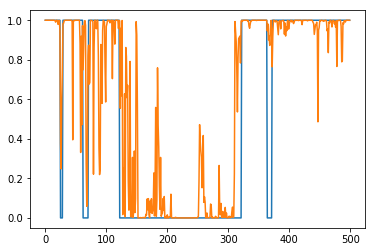

In [81]:
# plot labels
test_label_file = h5py.File(test_label_addr,'r')
true_label = test_label_file['test_label']
# print(true_label[0][100])
test_predict_label_file = h5py.File(test_predict_label_addr,'r')
pred_label = test_predict_label_file['label']
print(pred_label[100])
flag = 0
rangee = 500
plt.plot(true_label[0][0+256+flag:rangee+flag+256])
plt.plot(np.transpose(pred_label)[1][0+flag:rangee+flag])
# for i in range(len(pred_label)):
#     print("X=%s, Predicted=%s" % (real_label[0][i+256], pred_label[i]))


In [334]:
class result:
    def __init__(self, pred_label_addr, true_label_addr, threshold_step):
        # read True and predicted label by the model________________________________________________________part one
        h5f = h5py.File(pred_label_addr, 'r')
        variables = h5f.items()
        for var in variables:
            name = var[0]
            data = var[1]
#             print ("Name ", name)  # Name
            if type(data) is h5py.Dataset:
                 self.pred_label = data.value
        h5f.close()
        if self.pred_label.shape[0]<self.pred_label.shape[1]:
            self.pred_label = np.transpose(self.pred_label)
        
        h5f = h5py.File(true_label_addr, 'r')
        variables = h5f.items()
        for var in variables:
            name = var[0]
            data = var[1]
#             print ("Name ", name)  # Name
            if type(data) is h5py.Dataset:
                 self.true_label = data.value
        h5f.close()
        if self.true_label.shape[0]<self.true_label.shape[1]:
            self.true_label = np.transpose(self.true_label)
            
        # make thresholds for AUC part_______________________________________________________________________part two       
        self.threshold_step = np.arange(0, 1.00000000001, threshold_step)
        
        # extract batch_size for the number of first frame ignore in windowing in prediction_________________part three
        self.batch_size = int(pred_label_addr.split('\\')[-1].split('.')[0].split('batch')[1].split('_')[0])
        
        # count number true and false label in prediction and all of the label that contain speech or not____part four
        self.tp = 0
        self.tn = 0
        self.fp = 0
        self.fn = 0
        self.ap = 0
        self.an = 0
        pred_label_mask = np.ma.masked_greater_equal(np.transpose(self.pred_label)[1], 0.1).mask
        for i in range(len(pred_label_mask)):
            if pred_label_mask[i] == True and self.true_label[i+self.batch_size] == 1:
                self.tp += 1 
            elif pred_label_mask[i] == False and self.true_label[i+self.batch_size] == 0:
                self.tn += 1
            elif pred_label_mask[i] == True and self.true_label[i+self.batch_size] == 0:
                self.fp += 1
            elif pred_label_mask[i] == False and self.true_label[i+self.batch_size] == 1:
                self.fn += 1
        self.ap = int(np.sum(self.true_label[self.batch_size:self.batch_size+len(pred_label_mask)]))
        self.an = int(len(pred_label_mask) - self.ap)
    
    def confusion_matrix(self):
        fig, axs =plt.subplots(1,1)
        clust_data = [[self.tp,             self.fp,           self.tp+self.fp        ],
                      [self.fn,             self.tn,           self.fn+self.tn        ],
                      [self.tp+self.fn,     self.fp+self.tn,   self.tp+self.fp+self.fn+self.tn]]
        colLabel = ("ture_Speech", "true_Non-speech", "Total")
        rowLabel = ("pred_Speech", "pred_Non-speech", "Total")
        axs.axis('tight')
        axs.axis('off')
        the_table = axs.table(cellText=clust_data,colLabels=colLabel,rowLabels=rowLabel,loc='center')

#         axs[1].plot(clust_data[:,0],clust_data[:,1])
        plt.title('confusion_matrix')
        plt.show()
        
        fig, axs =plt.subplots(1,1)
        clust_data = [[self.tp/(self.tp+self.fp),  self.fp/(self.tp+self.fp),   (self.tp+self.fp)/(self.ap+self.an)],
                      [self.fn/(self.fn+self.tn),  self.tn/(self.fn+self.tn),   (self.fn+self.tn)/(self.ap+self.an)],
                      [(self.tp+self.fn)/(self.ap+self.an),     (self.fp+self.tn)/(self.ap+self.an),   self.ap+self.an]]
        colLabel = ("ture_Speech", "true_Non-speech", "Total")
        rowLabel = ("pred_Speech", "pred_Non-speech", "Total")
        axs.axis('tight')
        axs.axis('off')
        the_table = axs.table(cellText=clust_data,colLabels=colLabel,rowLabels=rowLabel,loc='center')

#         axs[1].plot(clust_data[:,0],clust_data[:,1])
        plt.title('confusion_matrix_percent')
        plt.show()


    def Classification_Accuracy_Metrics(self):
        # precision = true positive accuracy
        # recall = true positive rate
        # fallout = false positive rate
        # missRate = false negative rate
        # inversePrecision = true negative accuracy
        # inverseRecall = true negative rate
        precision = self.tp/(self.tp+self.fp)
        recall = self.tp/(self.tp+self.fn)
        fallout = self.fp/(self.fp+self.tn)
        missRate = self.fn/(self.fn+self.tp)
        inversePrecision = self.tn/(self.tn+self.fn)
        inverseRecall = self.tn/(self.tn+self.fp)
        fig, axs =plt.subplots(1,1)
        clust_data = [[precision],
                      [recall],
                      [fallout],
                      [missRate],
                      [inversePrecision],
                      [inverseRecall]]
        colLabel = ("Metrics", "Accuracy")
        rowLabel = ("precision", "recall", "fallout","missRate", "inversePrecision", "inverseRecall")
        axs.axis('tight')
        axs.axis('off')
        the_table = axs.table(cellText=clust_data,colLabels=colLabel,rowLabels=rowLabel,loc='center')
        plt.title('Classification_Accuracy_Metrics')
        plt.show()
        
    def AUC(self):
        all_tp = []
        all_tn = []
        all_fp = []
        all_fn = [] 
        all_recall = [1]
        all_fallout = [1]
        for i in range(1,len(self.threshold_step)-1):
            threshold = self.threshold_step[i]
            print(threshold)
            temp_tp = 0
            temp_tn = 0
            temp_fp = 0
            temp_fn = 0
            pred_label_mask = np.ma.masked_greater_equal(np.transpose(self.pred_label)[1], threshold).mask
            for i in range(len(pred_label_mask)):
                if pred_label_mask[i] == True and self.true_label[i+self.batch_size] == 1:
                    temp_tp += 1 
                elif pred_label_mask[i] == False and self.true_label[i+self.batch_size] == 0:
                    temp_tn += 1
                elif pred_label_mask[i] == True and self.true_label[i+self.batch_size] == 0:
                    temp_fp += 1
                elif pred_label_mask[i] == False and self.true_label[i+self.batch_size] == 1:
                    temp_fn += 1
            temp_recall = temp_tp/(temp_tp+temp_fn)
            temp_fallout = temp_fp/(temp_fp+temp_tn)
            all_tp.append(temp_tp)
            all_tn.append(temp_tn)
            all_fp.append(temp_fp)
            all_fn.append(temp_fn)
            all_recall.append(temp_recall)
            all_fallout.append(temp_fallout)
        all_recall.append(0)
        all_fallout.append(0)
#         print('all_recall = ',all_recall)
#         print('all_fallout = ', all_fallout)
        
                
        points = [(1,0)]
        for i in range(len(all_recall)):
            points.append((all_fallout[i],all_recall[i]))
        polygon = Polygon(points)
        print('AUC = ',polygon.area)
        self.AUC = polygon.area
        
        
        plt.plot(all_fallout,all_recall,'--r',linewidth=2)
        plt.show()
        
        fig, ax =plt.subplots(1,1)
        ax.add_patch(descartes.PolygonPatch(Polygon(points), linewidth=0, fc='blue', alpha=0.7))
        plt.grid(color='grey', linestyle='--', linewidth=0.3)
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        plt.title('AUC = ' + str(polygon.area))
        plt.savefig('AUC.png', dpi=1200)
        plt.show()
        
def main():
    # Set name of Shark object
    sammy = Shark("Sammy")
    sammy.swim()
    sammy.be_awesome()
    
# if __name__ == "__main__":
#     main()


(685568, 2)
(685845, 1)


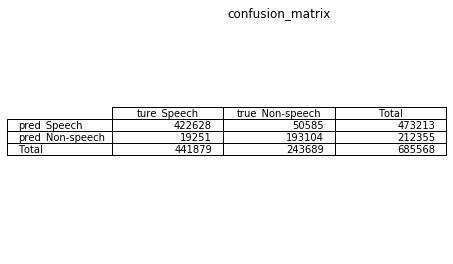

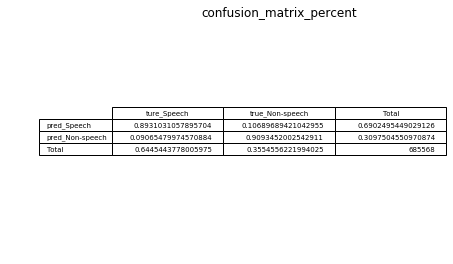

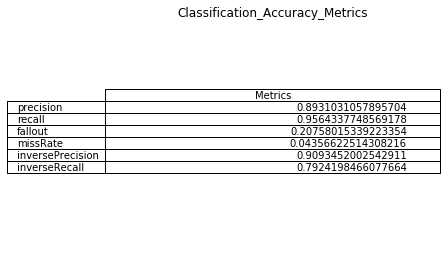

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
AUC =  0.9560470869729373


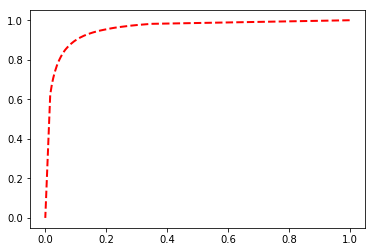

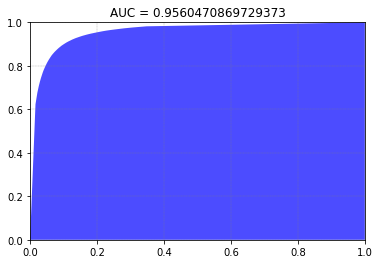

In [335]:
result1 = result(test_predict_label_addr, test_label_addr, 0.01)
print(result1.pred_label.shape)
print(result1.true_label.shape)
result1.confusion_matrix()
# print(result1.tp)
# print(result1.tn)
# print(result1.fp)
# print(result1.fn)
# print(result1.ap)
# print(result1.an)
result1.Classification_Accuracy_Metrics()
result1.AUC()

(685568, 2)
(685845, 1)


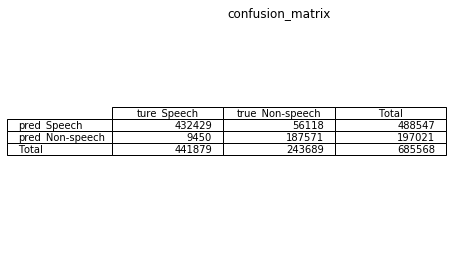

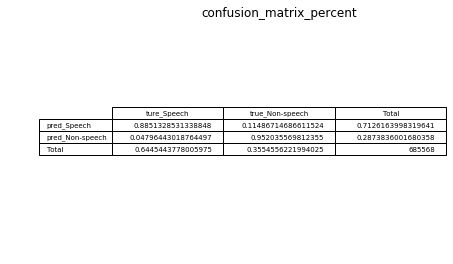

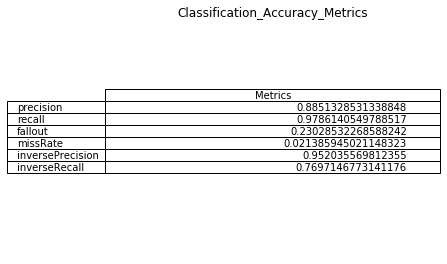

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
AUC =  0.9630586655056885


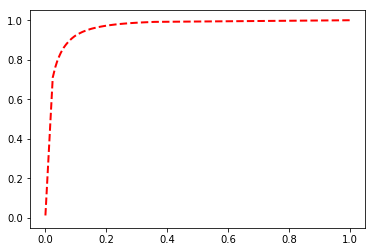

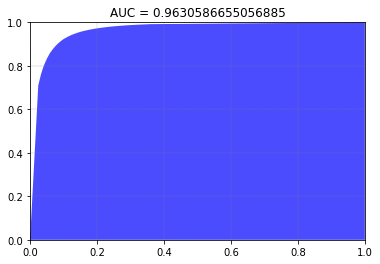

In [336]:
result2 = result(test_predict_label_addr2, test_label_addr, 0.01)
print(result2.pred_label.shape)
print(result2.true_label.shape)
result2.confusion_matrix()
result2.Classification_Accuracy_Metrics()
result2.AUC()

(1878784, 2)
(1879087, 1)


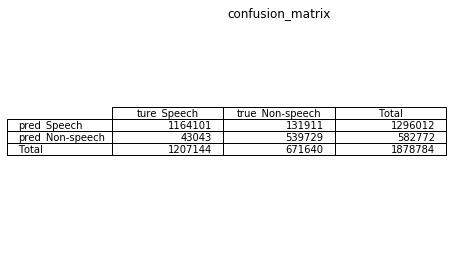

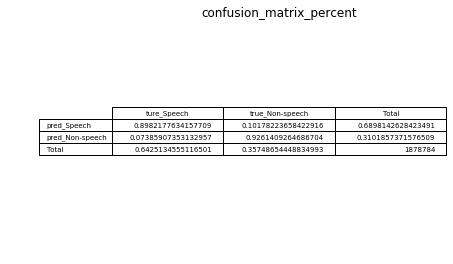

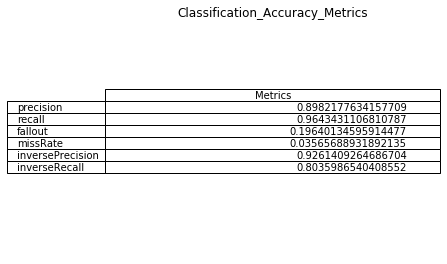

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
AUC =  0.9662581305651756


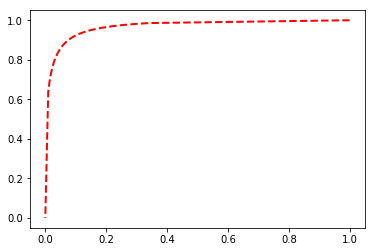

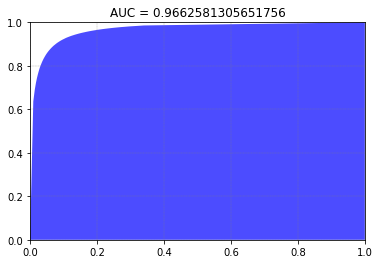

In [337]:
result3 = result(train_predict_label_addr, train_label_addr, 0.01)
print(result3.pred_label.shape)
print(result3.true_label.shape)
result3.confusion_matrix()
result3.Classification_Accuracy_Metrics()
result3.AUC()

(1878784, 2)
(1879087, 1)


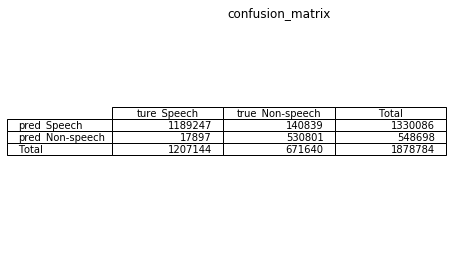

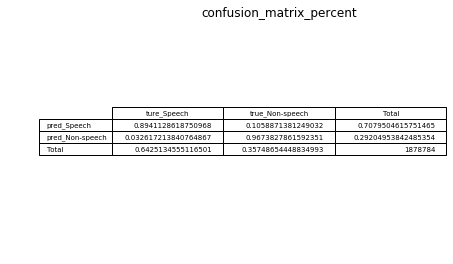

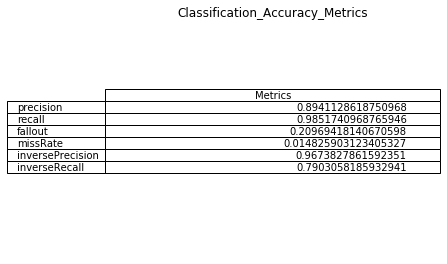

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
AUC =  0.9754716392547088


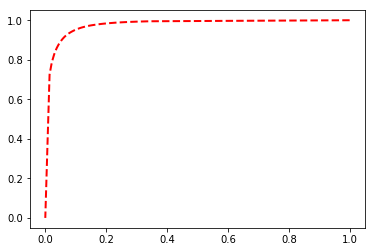

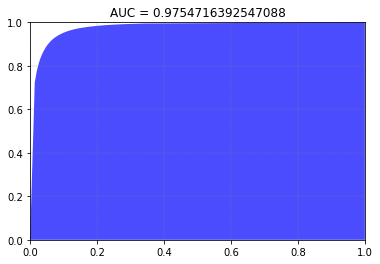

In [338]:
result4 = result(train_predict_label_addr2, train_label_addr, 0.01)
print(result4.pred_label.shape)
print(result4.true_label.shape)
result4.confusion_matrix()
result4.Classification_Accuracy_Metrics()
result4.AUC()

In [16]:
h5f = h5py.File(test_predict_label_addr, 'r')
variables = h5f.items()
for var in variables:
    name = var[0]
    data = var[1]
    print ("Name ", name)  # Name
    if type(data) is h5py.Dataset:
        test = data.value
h5f.close()
print(test.shape)


Name  label
(685568, 2)


In [39]:
# opening data
h5f = h5py.File(train_data_addr, 'r')
variables = h5f.items()
for var in variables:
    name = var[0]
    data = var[1]
    print ("Name ", name)  # Name
    if type(data) is h5py.Dataset:
        train_data = data.value
h5f.close()

h5f = h5py.File(train_silence_add_clean_addr, 'r')
variables = h5f.items()
for var in variables:
    name = var[0]
    data = var[1]
    print ("Name ", name)  # Name
    if type(data) is h5py.Dataset:
        train_silence_add_clean = data.value
h5f.close()

In [12]:
# In[] run place
# opening data
h5f = h5py.File(train_data_addr, 'r')
variables = h5f.items()
for var in variables:
    name = var[0]
    data = var[1]
    print ("Name ", name)  # Name
    if type(data) is h5py.Dataset:
        train_data = data.value
h5f.close()

h5f = h5py.File(train_label_addr, 'r')
variables = h5f.items()
for var in variables:
    name = var[0]
    data = var[1]
    print ("Name ", name)  # Name
    if type(data) is h5py.Dataset:
        train_label = data.value
h5f.close()


In [44]:
print(train_label)
print(np.sum(train_label)/2)

[[0. 0. 0. ... 0. 0. 0.]]
1207379.0


In [58]:
# length silence add data train = 1879087
# length silence add data test = 685845

In [14]:
# label_and_name_extraction(timit_addr, label_directory, name_directory)

In [14]:
print(train_data.shape)
print(train_label.shape)

NameError: name 'train_data' is not defined

In [36]:
w = np.empty((0,0))
print(w.shape)

(0, 0)


In [11]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [333]:
import numpy as np
import matplotlib.pyplot as plt


data = [[  66386,  174296,   75131,  577908,   32015],
        [  58230,  381139,   78045,   99308,  160454],
        [  89135,   80552,  152558,  497981,  603535],
        [  78415,   81858,  150656,  193263,   69638],
        [ 139361,  331509,  343164,  781380,   52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.array([0.0] * len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x/1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()